| **방법**                   | **계산 요소**             | **특징**                                         | **표본 크기**       | **극단값 민감도** | **주요 사용 사례**                       |
|----------------------------|---------------------------|-------------------------------------------------|---------------------|-------------------|-------------------------------------------|
| **Shapiro-Wilk Test**      | 데이터 순위               | 소표본에 적합, 가장 정밀한 방법 중 하나         | 5~5,000             | 중간              | 소표본 데이터에서 정규성 확인             |
| **Kolmogorov-Smirnov Test**| 누적 분포 함수(CDF) 비교 | 특정 분포와의 차이를 평가, 단순하지만 덜 정밀   | 제한 없음           | 낮음              | 특정 분포(정규 분포 등)와 비교            |
| **Anderson-Darling Test**  | CDF 및 극단값             | 극단값에 민감, 특정 유의 수준에서 임계값 제공  | 제한 없음           | 높음              | 극단값이 중요한 데이터에서 정규성 확인    |
| **Jarque-Bera Test**       | 왜도와 첨도 직접 계산     | 왜도와 첨도를 단순 결합, 대규모 데이터에 적합  | 대표본 이상 추천    | 낮음              | 대규모 데이터의 왜도와 첨도 평가          |
| **D'Agostino-Pearson Test**| 왜도와 첨도 Z-점수로 변환 | 왜도와 첨도를 독립적으로 표준화, 정밀도 높음   | 50 이상 추천        | 높음              | 중간 크기 데이터의 정규성 확인            |

* 소표본: Shapiro-Wilk이 가장 적합.
* 특정 분포와 비교: Kolmogorov-Smirnov 사용.
* 극단값 민감도: Anderson-Darling이 강점.
* 대규모 데이터: Jarque-Bera 적합.
* 중간 크기 데이터: D'Agostino-Pearson 추천.

In [10]:
import numpy as np
from scipy.stats import shapiro, normaltest, anderson, kstest, norm, jarque_bera
import json
import glob
# result = anderson(data)
# print("\nAnderson-Darling Test:")
# print(f"Statistic: {result.statistic:.4f}")
# for i in range(len(result.critical_values)):
#     sl, cv = result.significance_level[i], result.critical_values[i]
#     if result.statistic < cv:
#         print(f"Significance Level {sl}%: Critical Value={cv:.4f} (정규성을 따름)")
#     else:
#         print(f"Significance Level {sl}%: Critical Value={cv:.4f} (정규성을 따르지 않음)")


In [11]:
# wdata = np.load('/home/jgryu/Weight_compression/Wparam_dataset/npy/meta-llama-3-8b_mlp_size-128-1024_train.npy')


dataset_path = '/home/jgryu/Weight_compression/Wparam_dataset/model_param_tensor/meta-llama/Meta-Llama-3-8B'
tenosr_path_list = glob.glob(f'{dataset_path}/**/*.npy', recursive=True)

w_list = []
for path in tenosr_path_list:
    w = np.load(path)
    w_list.append(w)



KeyboardInterrupt: 

In [ ]:
len(w_list)

291

In [ ]:
# with open('/home/jgryu/Weight_compression/Wparam_dataset/path_json/meta-llama-3-8b_attn_train.json', 'r', encoding='utf-8') as file:
#     data = json.load(file)  # JSON 파일을 Python 객체로 변환

# print(data)  # 읽어온 데이터 출력
# wdata = np.load(data[0])

In [ ]:
# wdata = wdata.T
data = wdata.reshape((-1, 1024))
print(data.shape)

print(f"Shapiro-Wilk Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p = shapiro(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print(f"Kolmogorov-Smirnov Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p_value = kstest(col_data, 'norm', args=(norm.fit(col_data)))
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("Anderson-Darling Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    result = anderson(col_data)
    if result.statistic > result.critical_values[2]:  # 유의 수준 5% 기준
        # print("정규성이 없다 (H0 기각)")
        pass
    else:
        # print("정규성을 따른다 (H0 채택)")
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("Jarque-Bera Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p_value = jarque_bera(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("D'Agostino and Pearson’s Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    tat, p_value = normaltest(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')



NameError: name 'wdata' is not defined

라마3 8b Mlp train set 전체
(4358144, 1024)
Shapiro-Wilk Test
/home/jgryu/miniconda3/envs/Wcomp/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
normal ch: 280/1024
Kolmogorov-Smirnov Test
normal ch: 1024/1024
Anderson-Darling Test
normal ch: 0/1024
Jarque-Bera Test
normal ch: 1024/1024
D'Agostino and Pearson’s Test
normal ch: 1024/1024

In [ ]:
from scipy.stats import skew, kurtosis

# 예제 데이터
data = wdata.flatten()
print(data.shape)
# 왜도 계산
skewness = skew(data)

# 첨도 계산
kurt = kurtosis(data, fisher=True)  # Fisher=True로 설정하면 정규 분포 기준 (첨도=0)

print("왜도 (Skewness):", skewness)
print("첨도 (Kurtosis):", kurt)

# 왜도와 첨도 해석
if abs(skewness) < 0.5:
    print("데이터는 대칭에 가깝다.")
elif skewness > 0.5:
    print("데이터는 오른쪽으로 치우쳐 있다. (positive skewness)")
else:
    print("데이터는 왼쪽으로 치우쳐 있다. (negative skewness)")

if kurt > 0:
    print("데이터는 뾰족한 분포이다. (leptokurtic)")
elif kurt < 0:
    print("데이터는 평평한 분포이다. (platykurtic)")
else:
    print("데이터는 정규 분포와 유사한 첨도를 가진다. (mesokurtic)")


NameError: name 'wdata' is not defined

라마3 8b Mlp train set 전체
(4462739456,)
왜도 (Skewness): -0.0010288283212816656
첨도 (Kurtosis): 1.1470814277876675
데이터는 대칭에 가깝다.
데이터는 뾰족한 분포이다. (leptokurtic)

In [ ]:
import numpy as np
import os
dtype = np.float32

import torch
import torchvision
# import tqdm
import os

from transformers import CLIPVisionModelWithProjection, ViTForImageClassification, AutoModelForCausalLM
from transformers import AutoModel, AutoTokenizer
import numpy

from huggingface_hub import try_to_load_from_cache, _CACHED_NO_EXIST
from huggingface_hub import scan_cache_dir
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

def get_ckpt_path(path, branch = 'main'):
    if not os.path.isdir(os.path.join(path, 'snapshots')):
        return None
    branch_file =  os.path.join(path, 'refs', branch)
    with open(branch_file, 'r', encoding='utf-8') as file:
        revision = file.read()
    return os.path.join(path, 'snapshots', revision)



Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


Loading checkpoint shards: 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.10.self_attn.q_proj.weight  ###
###  model.layers.11.self_attn.q_proj.weight  ###
###  model.layers.12.self_attn.q_proj.weight  ###
###  model.layers.13.self_attn.q_proj.weight  ###
###  model.layers.14.self_attn.q_proj.weight  ###
###  model.layers.15.self_attn.q_proj.weight  ###
###  model.layers.16.self_attn.q_proj.weight  ###
###  model.layers.17.self_attn.q_proj.weight  ###
###  model.layers.18.self_attn.q_proj.weight  ###
###  model.layers.19.self_attn.q_proj.weight  ###
###  model

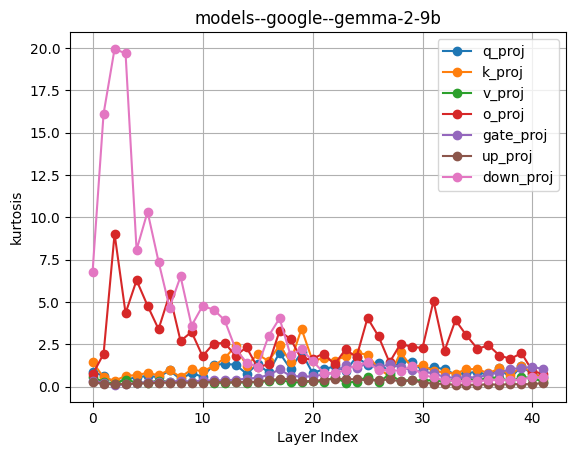

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.10.self_attn.q_proj.weight  ###
###  model.layers.11.self_attn.q_proj.weight  ###
###  model.layers.12.self_attn.q_proj.weight  ###
###  model.layers.13.self_attn.q_proj.weight  ###
###  model.layers.14.self_attn.q_proj.weight  ###
###  model.layers.15.self_attn.q_proj.weight  ###
###  model.layers.16.self_attn.q_proj.weight  ###
###  model.layers.17.self_attn.q_proj.weight  ###
###  model.layers.18.self_attn.q_proj.weight  ###
###  model.layers.19.self_attn.q_proj.weight  ###
###  model

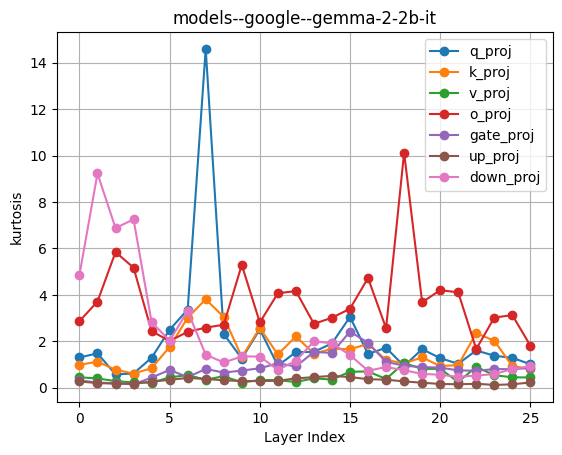

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.0.self_attn.q_proj.bias  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.bias  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.bias  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.bias  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.bias  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.bias  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.bias  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.bias  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.bias  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.bias  ###
###  model.layers.10.self_attn.q_proj.we

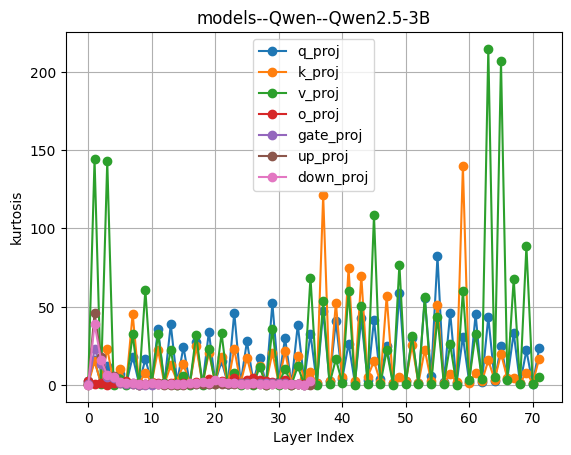

Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.0.self_attn.q_proj.bias  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.bias  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.bias  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.bias  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.bias  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.bias  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.bias  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.bias  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.bias  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.bias  ###
###  model.layers.10.self_attn.q_proj.we

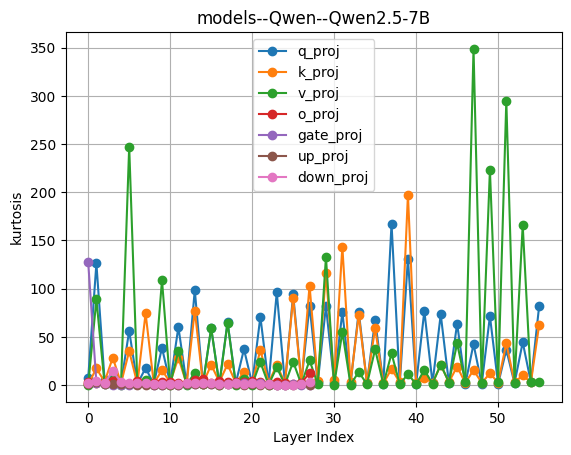

In [ ]:
model_list = [
            #   '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--meta-llama--Meta-Llama-3-8B',
            #   '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--meta-llama--Llama-2-7b-hf',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--google--gemma-2-9b',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--google--gemma-2-2b-it',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--Qwen--Qwen2.5-3B',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--Qwen--Qwen2.5-7B'
              ]
for model_path in model_list:
    ckpt_path = get_ckpt_path(model_path)
    model = AutoModelForCausalLM.from_pretrained(ckpt_path, local_files_only=True, trust_remote_code=True)

    state_dict = model.state_dict()
    plot = {}
    idx = 0
    for wtype in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']:
        plot[wtype] = []
        for k, v in state_dict.items():
            if wtype in k:
                data = v.flatten()
                mean = data.mean().item()
                median = data.median().item()
                min = data.min().item()
                max = data.max().item()
                kurt = kurtosis(data, fisher=True)  
                plot[wtype].append((kurt, mean, median, min, max))
                print('### ', k, ' ###')
                # print(data.shape)
                # skewness = skew(data)
                # # print("Skewness:", skewness)
                # print("Kurtosis:", kurt)
                # print("mean:", mean, "median:", median, "min:", min, "max:", max)
                

    plt.figure()
    for wtype, stats_list in plot.items():
        if not stats_list:
            continue  # 데이터가 없는 경우 건너뜀

        # 각각의 값을 분리
        kurtosis_vals = [stats[0] for stats in stats_list]
        mean_vals = [stats[1] for stats in stats_list]
        median_vals = [stats[2] for stats in stats_list]
        min_vals = [stats[3] for stats in stats_list]
        max_vals = [stats[4] for stats in stats_list]
        
        x_labels = range(len(kurtosis_vals))
        plt.plot(x_labels, kurtosis_vals, label=wtype, marker='o')
        # plt.plot(x_labels, mean_vals, label='Mean', marker='o')
        # plt.plot(x_labels, median_vals, label='Median', marker='o')
        # plt.plot(x_labels, min_vals, label='Min', marker='o')
        # plt.plot(x_labels, max_vals, label='Max', marker='o')

    plt.title(model_path.split('/')[-1])
    plt.xlabel("Layer Index")
    plt.ylabel("kurtosis")
    plt.legend()
    plt.grid(True)

    # 그래프 표시
    plt.show()

    save_path = '/home/jgryu/Weight_compression/kurtosis_per_layer'
    save_path = os.path.join(save_path, model_path.split('/')[-1] + '.json')
    with open(save_path, 'w', encoding='utf-8') as file:
        json.dump(plot, file, indent=4, ensure_ascii=False)

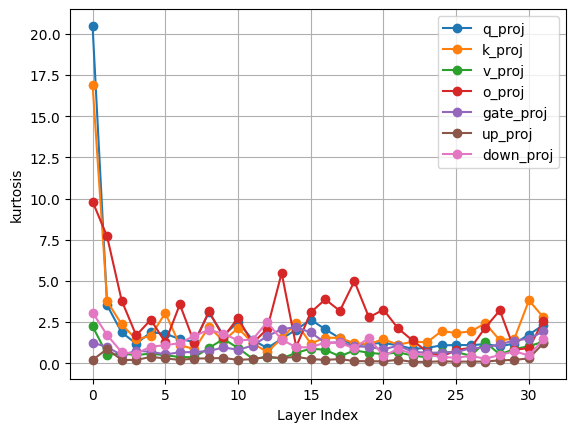

# 독립성

In [12]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

import torch
from transformers import CLIPVisionModelWithProjection, ViTForImageClassification, AutoModelForCausalLM
from transformers import AutoModel, AutoTokenizer

ckpt_path = '/home/jgryu/Weight_compression/llm-awq/model_cache/models--meta-llama--Meta-Llama-3-8B/snapshots/8cde5ca8380496c9a6cc7ef3a8b46a0372a1d920'
net = AutoModelForCausalLM.from_pretrained(ckpt_path, local_files_only=True)

mean = np.load(f'/home/jgryu/Weight_compression/Wparam_dataset/TFRecord/meta-llama--Meta-Llama-3-8B/mlp/d16/mlp_d16_train_mean.npy')
std = np.load(f'/home/jgryu/Weight_compression/Wparam_dataset/TFRecord/meta-llama--Meta-Llama-3-8B/mlp/d16/mlp_d16_train_std.npy')
mean = torch.from_numpy(mean)
std = torch.from_numpy(std)

state_dict = net.state_dict()

for k, v in state_dict.items():
    print(k, v.shape)


Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


model.embed_tokens.weight torch.Size([128256, 4096])
model.layers.0.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.0.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.0.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.0.input_layernorm.weight torch.Size([4096])
model.layers.0.post_attention_layernorm.weight torch.Size([4096])
model.layers.1.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.1.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.1.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.1.mlp.up_proj.weight torch.Size([14336, 4096])
model.

1. Distance Correlation

In [ ]:
import dcor
import numpy as np

# 샘플 데이터 생성
plot_data = {}
dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]

for k, v in state_dict.items():
    if 'embed' in k and 'layernorm' in k: continue
    for transpose in [False, True]:
        np.random.seed(1)
        print(f'Transpose : {transpose}')
        plot_data[f'{transpose}'] = []
        for dim in dims:
            # print(f'#### chunk size : {dim} ####')
            if transpose:
                v = v.T
            num_samples = 4096
            indices = torch.randperm(v.shape[0])[:num_samples]  # 무작위로 인덱스 선택
            W = v.reshape(-1, dim)[indices]
            # print(W.shape)

            d = W.shape[-1] // 2
            tensor_split = torch.split(W, d, dim=1)  # dim=1에서 64씩 나눔
            
            X = tensor_split[0]  # 첫 번째 (-1, 64)
            Y = tensor_split[1]  # 두 번째 (-1, 64)
            
            indices = torch.randperm(X.shape[0])
            X = X[indices]
            Y = Y[indices]
            # print(X.shape, Y.shape)

            dc = dcor.distance_correlation(X, Y)
            # print(f"Distance Correlation: {dc}")
            plot_data[f'{transpose}'].append(dc)
            # 독립 여부 판단
            # if dc < 1e-3:  # Threshold는 상황에 따라 조정 가능
            #     print("Variables are likely independent.")
            # else:
            #     print("Variables are dependent.")
                
    import matplotlib.pyplot as plt
    dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]
    plt.figure(figsize=(6.5, 5))
    for l, v in plot_data.items():
        print(v)
        plt.plot(dims, v, marker='o', markersize = 3, linestyle='-', label=l)
        
        
    plt.title(f'{k}, Distance Correlation')
    plt.xlabel('size')
    plt.ylabel('dc')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')

    plt.tight_layout()
    plt.show()

Transpose : False


KeyboardInterrupt: 

2. HSIC (Hilbert-Schmidt Independence Criterion)

model.layers.0.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.002759308664047221, 0.0006806812200291152, 0.00016653068669120658, 2.5191838055025458e-05, 4.2940930804090114e-06, 8.783660135716336e-07, 1.4569111281203586e-07, 3.5350694895457475e-08, 5.657518415545264e-09, 9.347399986309747e-10, 1.746667061157143e-11, 1.394243557634006e-12]
[0.0004068638827371939, 0.000724208019930461, 0.0001523988774730184, 1.4795185877709237e-05, 9.198756150630463e-07, 7.470056752934459e-07, 1.465535682779941e-07, 1.575205421383441e-07, 4.525376836089258e-09, 5.625282662381605e-09, 3.934529486747544e-10, 4.9278249975728583e-11]


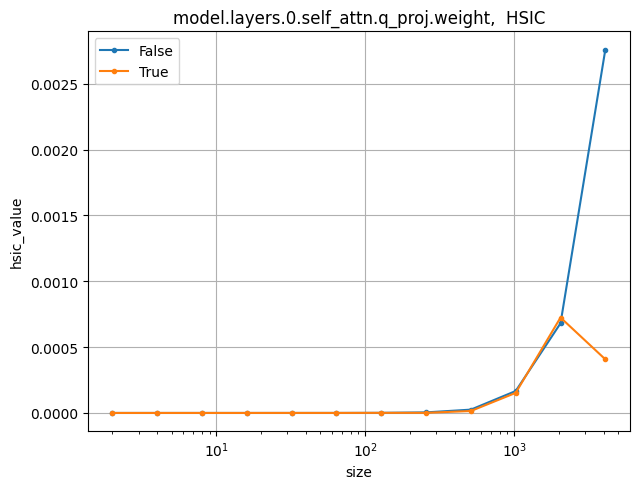

model.layers.0.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.004643298426397497, 0.0016068748580710338, 0.00037297876466235144, 6.679978593709731e-05, 1.2306162240642576e-05, 2.5410384737786427e-06, 4.2589211521322006e-07, 9.49027941917984e-08, 2.784331098167392e-08, 7.775799156430166e-09, 3.947872440836403e-10, 1.9223691609504287e-10]
[0.00099352572671194, 9.918330160394575e-05, 0.0003751972317573956, 0.00016058681552594996, 6.901640564779654e-06, 1.2336836438852235e-06, 7.780598789407057e-07, 6.361116825856966e-08, 2.990366437689216e-08, 1.1908954392028384e-08, 1.8706727707648292e-09, 4.3387229138295555e-10]


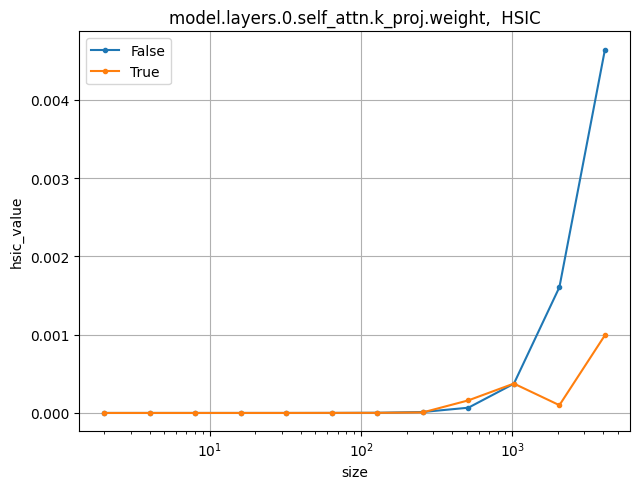

model.layers.0.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[9.790268753971593e-06, 1.3146006520758746e-06, 2.986452426996771e-07, 6.739333101407588e-08, 1.6568975535164386e-08, 3.95977855552193e-09, 9.966150847566773e-10, 2.5065002026522925e-10, 6.920233924447882e-11, 7.576286362465101e-12, 2.512805950959579e-12, 9.902558894691684e-13]
[7.135939900387861e-06, 8.9433350177894e-07, 2.902829648031879e-07, 9.728807301200307e-08, 1.514576588037321e-08, 3.828565662646295e-09, 1.317399056438441e-09, 2.1675262744714892e-10, 5.4129848203357734e-11, 1.8301828813041152e-11, 3.0748152067912365e-12, 4.639582843208035e-13]


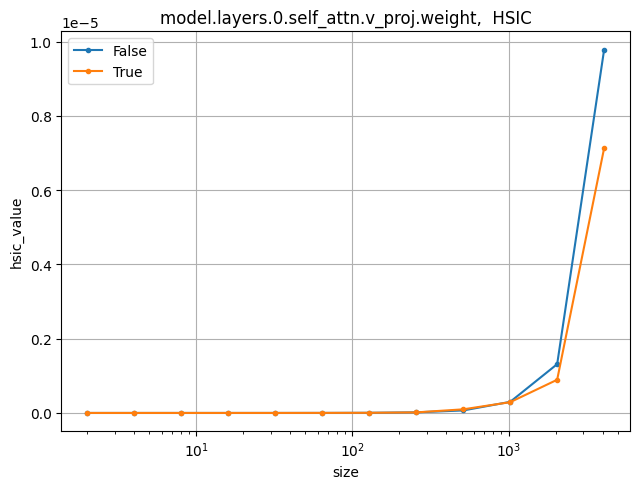

model.layers.0.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.147794897333358e-05, 2.573299520527958e-06, 5.882593876335068e-07, 2.841765460380973e-07, 5.4979381929847806e-08, 8.204033116693763e-09, 2.2273319547228557e-09, 1.2405247926558592e-09, 2.186766221758884e-10, 5.2752113315201784e-11, 3.1226196346266343e-12, 2.52068349711509e-12]
[5.541174398574697e-06, 3.040197155918893e-06, 6.013592530509866e-07, 1.0557669321030562e-07, 2.855868335817593e-08, 6.280593136927706e-09, 1.614334716989372e-09, 4.678897377489851e-10, 9.081284182584782e-11, 4.4169269894982325e-11, 5.131937103040146e-12, 2.7666876955718936e-13]


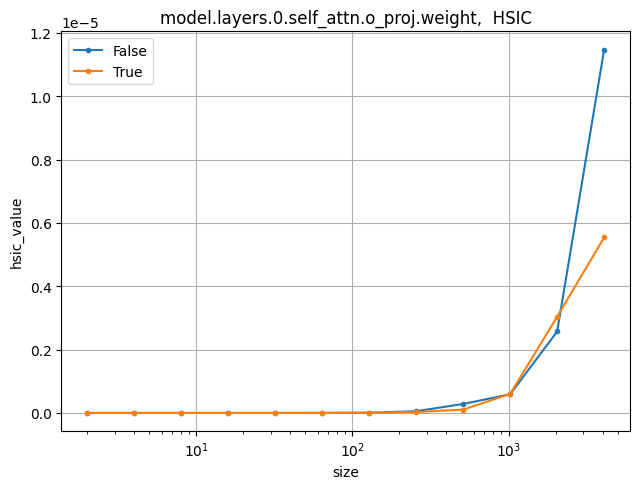

model.layers.0.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[4.413586216672764e-05, 1.1299750433484625e-05, 2.6375319427170936e-06, 6.900725277102573e-07, 1.5831906172665216e-07, 4.057143354149701e-08, 1.0823445391966723e-08, 2.095935069290651e-09, 9.071422331471196e-10, 3.12938477608141e-10, 2.4402654301073117e-11, 8.144245828610957e-12]
[2.8383579526544577e-05, 8.809512250486688e-06, 2.2623233384154456e-06, 5.764283060972404e-07, 1.4530317783599274e-07, 3.7566176580680794e-08, 9.389111147309389e-09, 2.4781150588622507e-09, 5.230900052912502e-10, 7.329958164592653e-11, 1.7170414452445145e-11, 1.6070354435779274e-15]


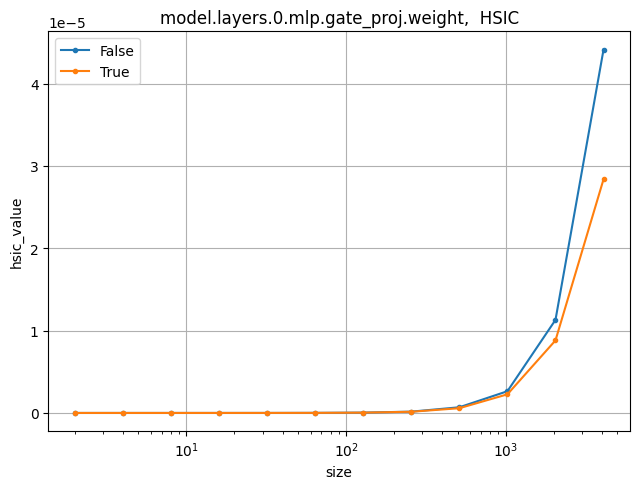

model.layers.0.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.314119345230202e-05, 6.22720005614405e-06, 1.5732245868512182e-06, 3.970676712224414e-07, 1.0139346044773863e-07, 2.480550590040352e-08, 5.923945012241694e-09, 1.4659101585733978e-09, 3.6770887943211537e-10, 9.432770023125649e-11, 3.5920339242835233e-12, 6.4791929647018e-13]
[2.0443459176626928e-05, 5.769162156124916e-06, 1.5144138565542117e-06, 3.9241371879318356e-07, 1.009489086633952e-07, 2.4015249570288967e-08, 6.24199311958951e-09, 1.201452897655701e-09, 3.9900849429223626e-10, 5.59715550158031e-11, 1.0721598408931799e-11, 4.933352973098866e-12]


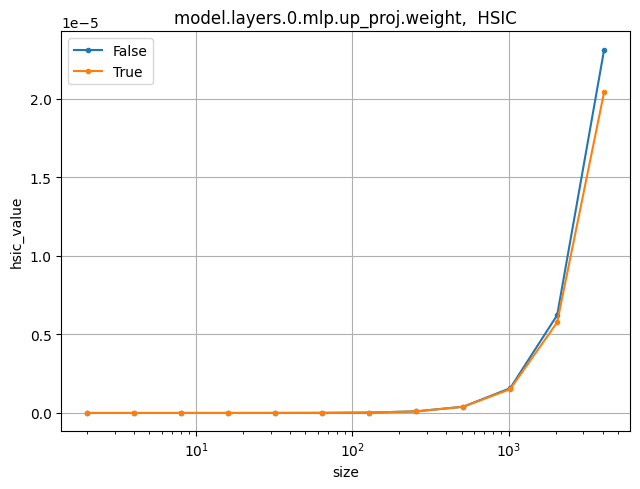

model.layers.0.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.1335418579349792e-05, 6.026512373226915e-06, 1.5364863059940012e-06, 4.191726186960314e-07, 1.0010332974739193e-07, 2.9464066212533784e-08, 6.316157609504156e-09, 1.188848652680834e-09, 3.2126608845219445e-10, 7.10025635540844e-11, 5.467039504502914e-11, 8.994819185152484e-12]
[2.1249891829020148e-05, 5.660411678285221e-06, 1.503089297290887e-06, 3.8324129603532077e-07, 9.768254361740282e-08, 2.3129850618261347e-08, 6.402753498414149e-09, 1.7015569408210213e-09, 3.687223822218753e-10, 7.057903521086815e-11, 2.341466989130703e-11, 1.1047274681295372e-12]


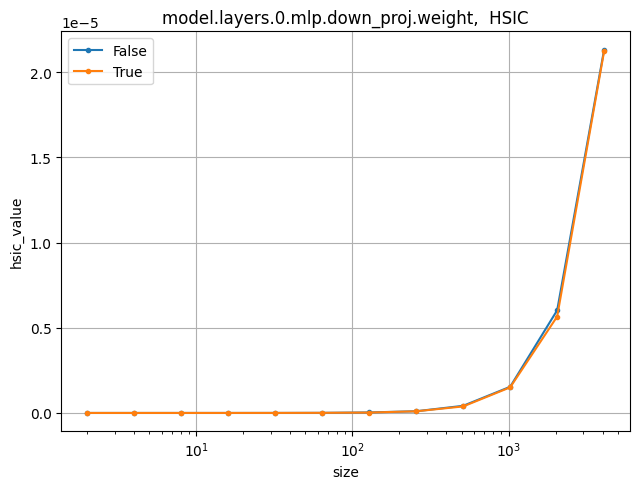

model.layers.1.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0013855785208170147, 0.0002736353764179093, 4.403266233448285e-05, 8.501694639580921e-06, 1.7464281039306123e-06, 4.069591233162617e-07, 9.853430765100664e-08, 2.2310656882758557e-08, 5.947388710229699e-09, 1.7115787422895313e-09, 4.977195047335158e-10, 7.203219180631082e-13]
[0.0002381458670473871, 7.820825211744978e-05, 4.1073995417887845e-05, 5.489643271422036e-06, 1.0280360662097918e-06, 4.122628249617144e-07, 7.706151506646337e-08, 3.3106578146275004e-08, 4.147246327309776e-09, 1.7237895714788832e-09, 1.3266555650582054e-10, 1.447445518246012e-10]


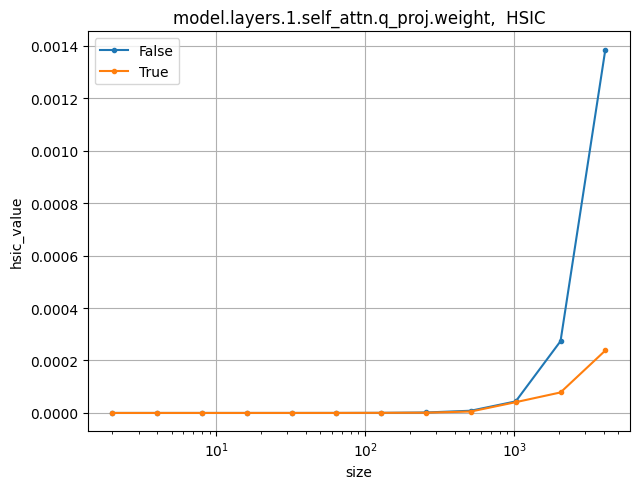

model.layers.1.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.005650840850868258, 0.0014526330894152188, 0.00025226250078545467, 3.9536038192015653e-05, 7.404550155019446e-06, 1.69260408879767e-06, 4.1954505338422973e-07, 9.073442668142786e-08, 2.1008592062117276e-08, 6.120703480671554e-09, 5.773244125145004e-09, 1.2459864637123515e-09]
[0.0006979505334189795, 0.00012538414278543615, 0.00024695494356746285, 3.215056330297217e-05, 5.673480731818638e-06, 1.0400814029204066e-06, 3.7212468122233266e-07, 8.044079811433128e-08, 2.532048890754933e-08, 8.326063226361318e-09, 3.4099889691602585e-10, 5.0683856842138626e-12]


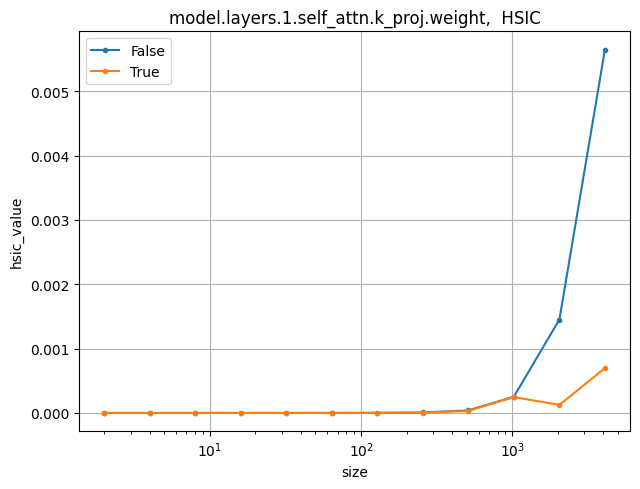

model.layers.1.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[1.5638494309670546e-05, 2.1503727697925594e-06, 5.31714383412563e-07, 1.292460975459943e-07, 3.2383259736903285e-08, 8.185648358354831e-09, 2.024959433991743e-09, 4.96795435027887e-10, 1.363903353451093e-10, 4.042714551698327e-11, 5.6727344086787216e-12, 7.429897043483933e-13]
[1.3901577417756749e-05, 1.7856801828238232e-06, 5.229973390000453e-07, 1.2936822087778572e-07, 3.0732841999405466e-08, 8.43429429268816e-09, 1.86573123972744e-09, 5.438947832541133e-10, 1.4497560115265087e-10, 2.2081850749023365e-11, 9.993485029175505e-12, 3.265519524549259e-12]


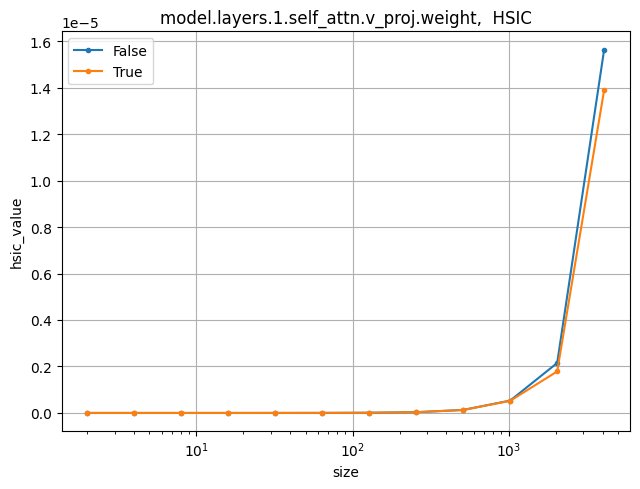

model.layers.1.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.4394043441947196e-05, 2.712663501703081e-06, 7.268722883226953e-07, 3.2565266885199587e-07, 8.895497019353345e-08, 1.816442621071823e-08, 4.071930017970909e-09, 1.0548567660205833e-09, 4.3430074129353845e-10, 5.430324905625167e-11, 2.1513364617637167e-11, 2.40181909967893e-11]
[9.155081152143034e-06, 4.133538414325714e-06, 9.181736245439105e-07, 1.6942652791188595e-07, 4.9270531183477465e-08, 1.4356753152802616e-08, 2.6299726120213275e-09, 6.342412409620513e-10, 1.6293344451807299e-10, 9.148618806304299e-10, 1.0441735841832616e-11, 4.1746979215057057e-13]


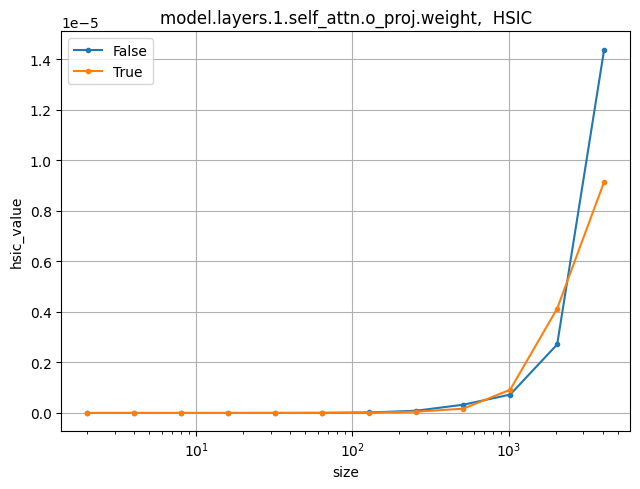

model.layers.1.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[3.924716819921804e-05, 1.0279315969827357e-05, 2.6257673245067425e-06, 6.434958215633829e-07, 1.600267902191069e-07, 3.963437148230933e-08, 9.840846036065436e-09, 2.8148786223374277e-09, 5.832584869956644e-10, 1.842951718527243e-10, 5.206484382694984e-11, 3.964823891590902e-11]
[2.9829128158628395e-05, 8.917250678809195e-06, 2.3461024867693966e-06, 5.964360218969617e-07, 1.5021469060610706e-07, 3.812628988840607e-08, 9.686706603501652e-09, 2.622583097889529e-09, 4.675830426196929e-10, 1.1174356721619179e-10, 3.098648370377656e-11, 3.613487820667137e-12]


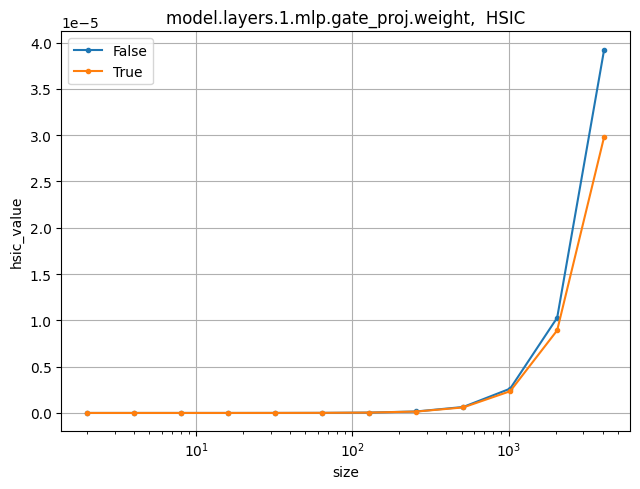

model.layers.1.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.32994003066019e-05, 6.285346971435285e-06, 1.61594971196929e-06, 4.1370528714696595e-07, 1.0871108327725831e-07, 2.5879610643115498e-08, 6.708625727508409e-09, 1.6510052169167638e-09, 4.546520687990907e-10, 7.757031279106373e-11, 2.941659082874989e-11, 1.3517571683918023e-13]
[2.157131916416998e-05, 6.1151025553249966e-06, 1.5965075524633731e-06, 4.0716354796972716e-07, 1.0458152217547425e-07, 2.6245637215826886e-08, 6.37421407384172e-09, 1.7675469227017364e-09, 4.680030200843415e-10, 5.158380114603274e-11, 1.3291814499355407e-11, 2.8541239876948865e-11]


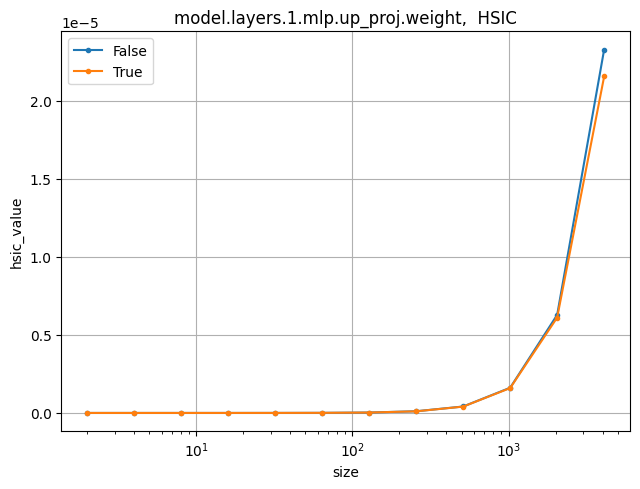

model.layers.1.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.139843279529425e-05, 5.993750882172102e-06, 1.580211451944967e-06, 4.0906197479103523e-07, 1.037490869862786e-07, 2.6102620555518482e-08, 6.485709182766185e-09, 1.793555703994213e-09, 5.670307128123456e-10, 1.0713186522250019e-10, 3.1690580860852144e-11, 6.182827941067137e-15]
[2.1210852113291323e-05, 5.983593594435856e-06, 1.5727683527314997e-06, 4.111534658447865e-07, 1.0077250852331728e-07, 2.5384575051363938e-08, 7.08618167827544e-09, 1.7022021440128165e-09, 4.040088734594756e-10, 5.411459253671415e-11, 2.8171530823132728e-12, 3.841872491943842e-13]


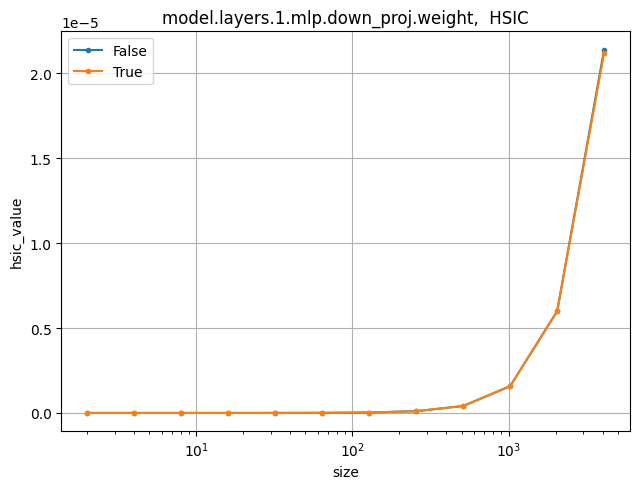

model.layers.10.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0006252532665456611, 0.00012453110610750485, 2.282291439802557e-05, 4.881441939876801e-06, 1.115889744382623e-06, 2.700511954896564e-07, 6.516407725725209e-08, 1.6361994469955802e-08, 5.123166946115188e-09, 9.200239422081075e-10, 2.1536529962517776e-10, 9.354259893694072e-11]
[0.00047821932647929927, 4.4639343459158044e-05, 2.242532633406181e-05, 3.322172025472489e-06, 7.895000095997699e-07, 2.6079306839580294e-07, 6.477328532595314e-08, 2.130769256212229e-07, 3.2491902437212067e-09, 1.2293787008806096e-09, 4.332421778028424e-10, 2.0283923443831619e-10]


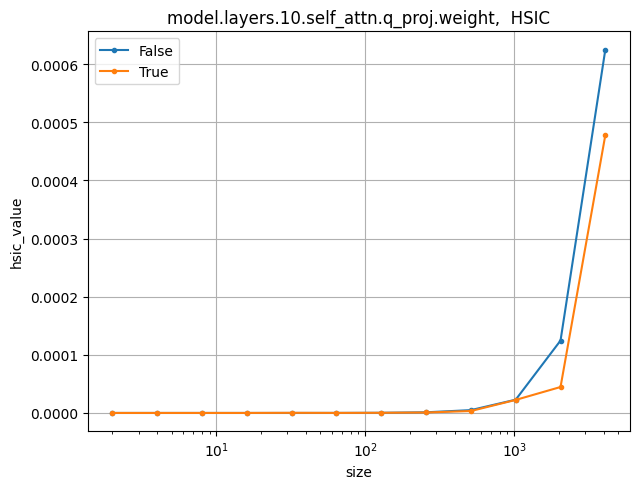

model.layers.10.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.002286019601800068, 0.0005812934741666222, 0.00011601037643014043, 2.4567022735798335e-05, 5.717599585504143e-06, 1.4623301678864628e-06, 3.25856207362993e-07, 7.987754092891649e-08, 2.0356462992821084e-08, 4.7134068168858404e-09, 1.0495676588854075e-09, 2.684114016785191e-10]
[0.0016770326240545723, 0.00013397611766191846, 0.00011964541470119958, 3.0855985817065806e-05, 5.1098638972590225e-06, 1.2309026941578723e-06, 2.5894245667799077e-07, 6.868028522266979e-08, 1.9254599414303624e-08, 4.3425000558859855e-09, 1.7085847725448903e-09, 3.7101541938079637e-10]


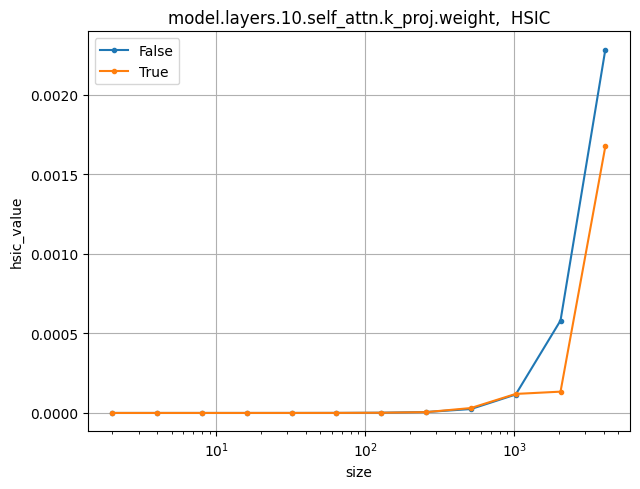

model.layers.10.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[1.931034258537579e-05, 2.655393655334066e-06, 6.216368232971473e-07, 1.536966548494673e-07, 3.703286585585424e-08, 9.097438703013625e-09, 2.2647314853087623e-09, 5.427333147448839e-10, 1.165683469023265e-10, 2.6821353440956268e-11, 9.86612755178997e-13, 1.4430350457903093e-12]
[1.59799705821969e-05, 1.7760419719460002e-06, 6.233386462070296e-07, 2.055556911203561e-07, 3.4907328580855744e-08, 9.246819867546808e-09, 1.7703880143812235e-09, 4.670561756000324e-10, 1.538461848474357e-10, 3.59913104051048e-11, 8.801263529333838e-12, 9.227234443355576e-12]


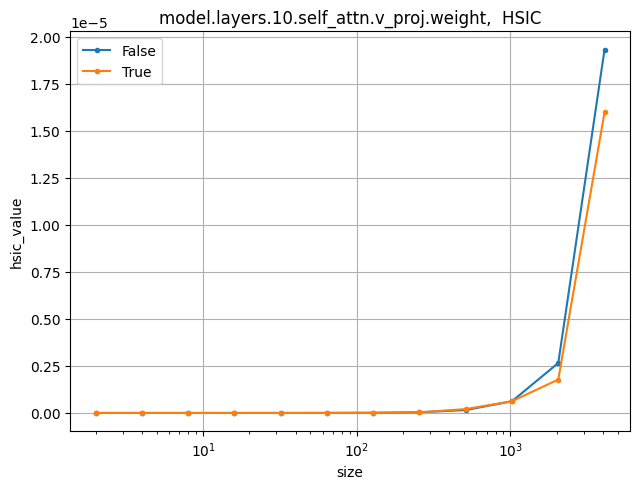

model.layers.10.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.3583025861048226e-05, 3.7109186174704696e-06, 9.79052603044717e-07, 3.243911170068911e-07, 1.2507890133085262e-07, 1.789327290518603e-08, 5.4097374917128745e-09, 1.022085951887814e-09, 2.1603438821829966e-10, 1.0039738055999836e-10, 1.0203600626399639e-11, 7.2705727956185905e-12]
[1.1597027171114238e-05, 4.536126424725967e-06, 9.691854374210471e-07, 2.1377798081388921e-07, 5.880854204838963e-08, 1.4113588978443803e-08, 3.3609060044642132e-09, 9.900271278119474e-10, 2.2424030002062868e-10, 5.14562501394512e-11, 2.5376804382779015e-11, 4.254077895123168e-12]


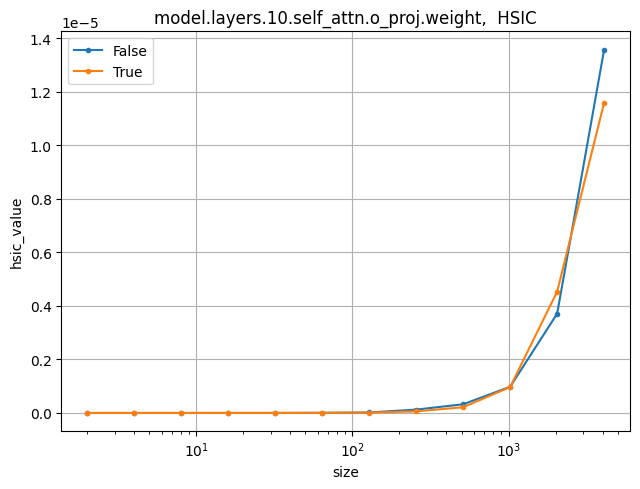

model.layers.10.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[7.265884048827991e-05, 1.9390787538467872e-05, 4.706979613487135e-06, 1.1825505564720615e-06, 3.0057869081715743e-07, 7.436543371220676e-08, 1.9596214224367164e-08, 4.186424610974181e-09, 1.1413983174600348e-09, 2.7762116247660545e-10, 5.13001473989491e-11, 2.207713947736372e-11]
[4.532981385798289e-05, 1.4948117914096903e-05, 3.8244091743883136e-06, 9.60528623410843e-07, 2.492979647089542e-07, 6.267213540747279e-08, 1.6760477781250472e-08, 3.5154085346774125e-09, 8.382464121013474e-10, 4.864911064350479e-10, 2.6278618484060096e-11, 4.8526469662125765e-11]


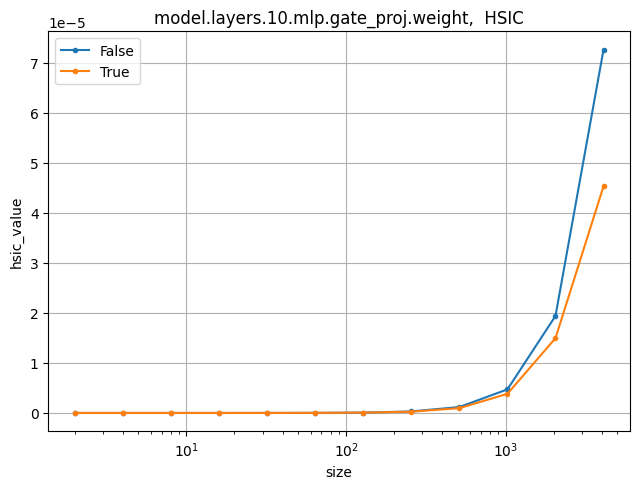

model.layers.10.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.2938046691531375e-05, 6.18171561905759e-06, 1.6042583681537437e-06, 4.131623021307431e-07, 1.0176311179491878e-07, 2.6381653841969794e-08, 6.8874064674440434e-09, 1.7294352456203046e-09, 3.772271597039942e-10, 1.2600483499777218e-10, 6.4489128704676766e-12, 1.9142960216493443e-12]
[2.0736462295645686e-05, 5.857561070599904e-06, 1.529369277221058e-06, 3.956637690097804e-07, 1.014913677439064e-07, 2.5044361106380716e-08, 6.5849800057770246e-09, 1.5128998169164591e-09, 4.234251731737283e-10, 8.969763682472675e-11, 6.852852283622638e-12, 1.489674624679988e-11]


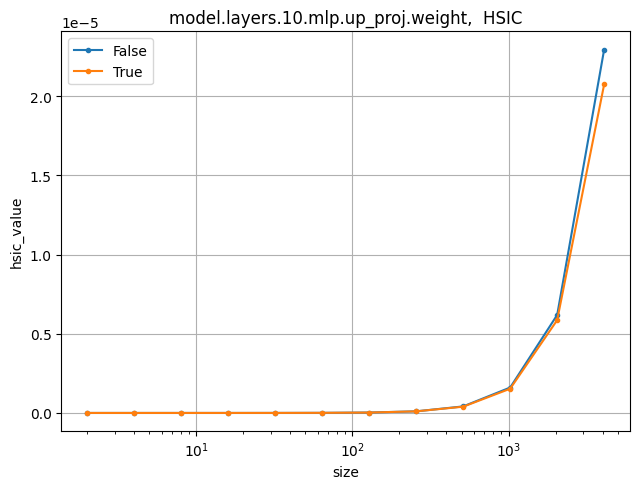

model.layers.10.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.184306389120771e-05, 5.9056918436113335e-06, 1.8019708231567024e-06, 4.7091690554412415e-07, 1.1392423699122406e-07, 2.551613964529201e-08, 6.304849630688494e-09, 1.920259055955535e-09, 4.1492578319172174e-10, 4.893430643119247e-11, 1.547880825766913e-11, 2.0189242493044124e-11]
[2.0996972721469717e-05, 5.643562024960033e-06, 1.4951040427016429e-06, 3.786880824583183e-07, 9.557412183322358e-08, 2.371304413120087e-08, 5.93324748093133e-09, 1.3862710523274153e-09, 2.9770973993659777e-10, 6.665034834779227e-11, 1.763890132415906e-11, 7.869252934583274e-13]


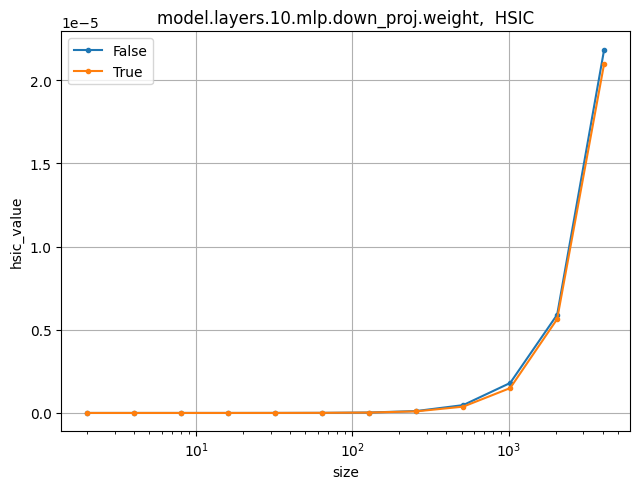

model.layers.11.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.00039038647445916233, 7.864378545283473e-05, 1.6292509364505397e-05, 3.6860978233233603e-06, 8.97258086556954e-07, 2.110481152149203e-07, 5.12514539767636e-08, 1.2144674072652864e-08, 3.922630225062856e-09, 6.744001995395682e-10, 5.820085493032424e-11, 7.873818235756796e-12]
[0.0002831843335138437, 4.204311001516472e-05, 1.607242598811276e-05, 2.6216944464559733e-06, 6.228015173801405e-07, 2.1776234553744026e-07, 5.2134243393396945e-08, 1.827848569224581e-07, 2.1245133173374066e-09, 6.56583596152863e-10, 6.189520460616496e-10, 1.3476714614451174e-12]


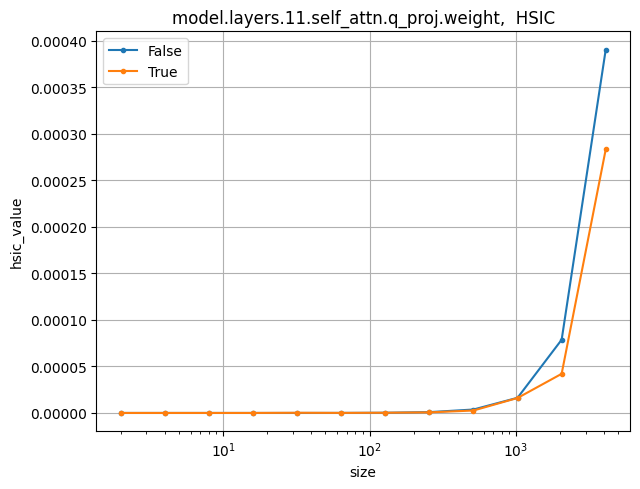

model.layers.11.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0019713515988971017, 0.0004956720892322703, 0.00010195828395085945, 2.2052981283212003e-05, 5.1232009106103385e-06, 1.2787535235402569e-06, 3.288786375257776e-07, 8.210678144792366e-08, 1.6341830875789918e-08, 4.4447930408102216e-09, 1.140094231850423e-09, 2.434181970740208e-11]
[0.0014464925078455332, 0.00012967465943723193, 0.00010654787208317361, 2.0573846377099978e-05, 4.540222150290389e-06, 1.117766556143549e-06, 3.0745076816400675e-07, 7.303056578254969e-08, 2.2951329117015045e-08, 4.961842134109326e-09, 4.0872781241960153e-10, 5.3797042934712345e-12]


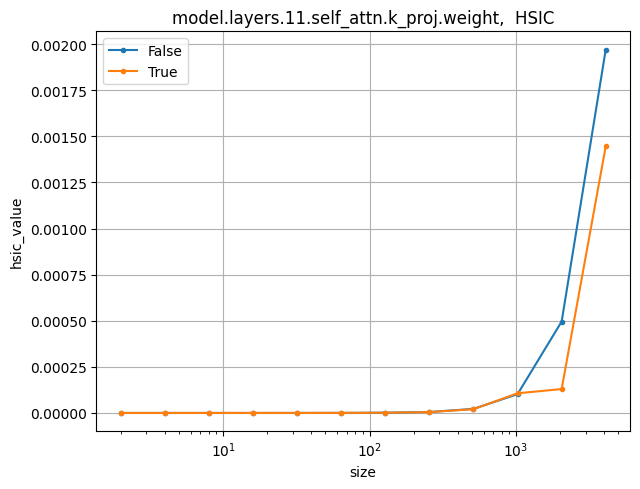

model.layers.11.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[1.8906098426722944e-05, 2.6147027844785644e-06, 5.63812873013085e-07, 1.301717417370055e-07, 3.1001997188148515e-08, 7.476139666206698e-09, 1.867393481888854e-09, 4.6007169882523703e-10, 1.4338410158586262e-10, 2.2059496249044278e-11, 1.8483761719130707e-11, 1.5007702192043947e-14]
[1.2882466950602853e-05, 1.6969797840077639e-06, 5.650333183218655e-07, 1.5930293267254437e-07, 2.9123020820464487e-08, 7.361455072197542e-09, 1.8003874263972222e-09, 4.4734969258251916e-10, 8.239747532849842e-11, 1.8935924835359917e-11, 2.1665706866209176e-11, 1.6858038139242355e-12]


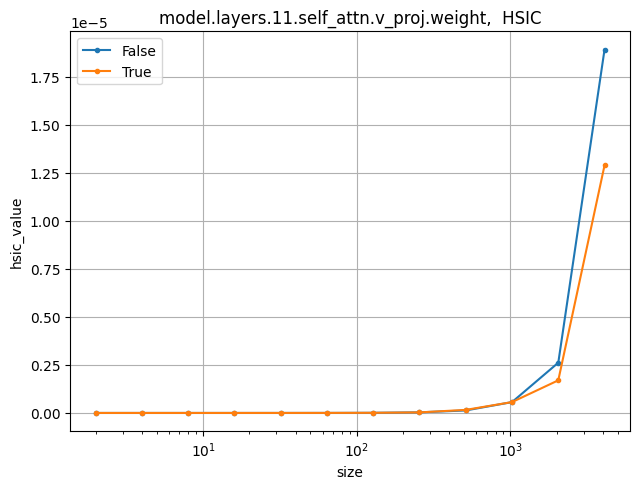

model.layers.11.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[2.093055176351479e-05, 4.633521662949982e-06, 1.072626969020324e-06, 5.36800437160123e-07, 7.857567638158684e-08, 1.9374108885063327e-08, 4.704002123037319e-09, 1.2754801079205865e-09, 2.3135594645105473e-10, 1.2808515800038663e-10, 7.1057560278419385e-12, 5.205262843168191e-13]
[1.2531661369245378e-05, 5.175648644654423e-06, 1.0203107718272185e-06, 2.394285952494745e-07, 6.353584429256015e-08, 1.5137723156254342e-08, 3.878575093314094e-09, 8.754771761520083e-10, 2.253091515652068e-10, 3.816990679894125e-11, 8.652492994006783e-12, 1.3782628807154255e-12]


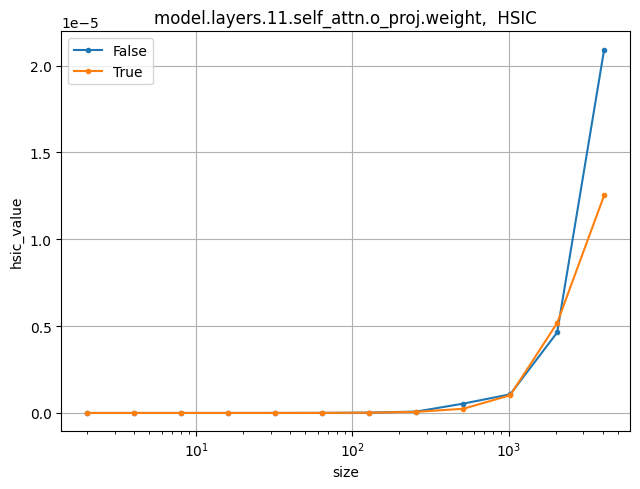

model.layers.11.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[7.155487511069367e-05, 1.8166884115801984e-05, 4.558050977925809e-06, 1.1425074062628975e-06, 2.8928448376924686e-07, 7.210583675758939e-08, 1.6003431528481812e-08, 4.280490717203492e-09, 1.0928523010913706e-09, 2.4416131473072027e-10, 1.680698323669195e-11, 8.087156899677731e-11]
[4.1838484253359825e-05, 1.4309315203300179e-05, 3.564436215064397e-06, 9.164412198538167e-07, 2.3748999234154085e-07, 6.033416781573323e-08, 1.4936822492455138e-08, 3.396685733982886e-09, 7.852375989675821e-10, 1.6910882444227452e-10, 5.974065090470158e-11, 4.485364521541489e-13]


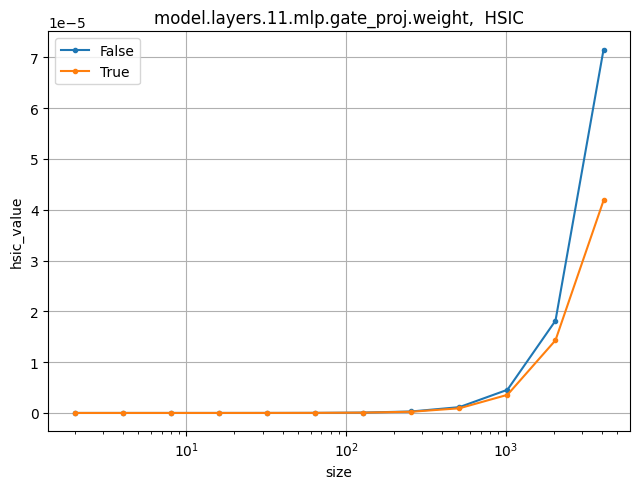

model.layers.11.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.3228754736143308e-05, 6.317614251587511e-06, 1.6443832553487692e-06, 4.1247120641802767e-07, 1.0376545989418848e-07, 2.5708951860249996e-08, 7.044603656091105e-09, 1.5809278315020372e-09, 3.0688000604465064e-10, 9.042574869749604e-11, 1.6809618966319927e-11, 1.2412813734900385e-12]
[2.1221230769443294e-05, 6.0439207500797345e-06, 1.5876692484426644e-06, 4.058309487048579e-07, 1.043409265299965e-07, 2.4946144073277426e-08, 6.414417917414321e-09, 1.355897337094139e-09, 5.548736082347011e-10, 7.045674667842257e-11, 4.458342577938013e-11, 5.760833689583012e-13]


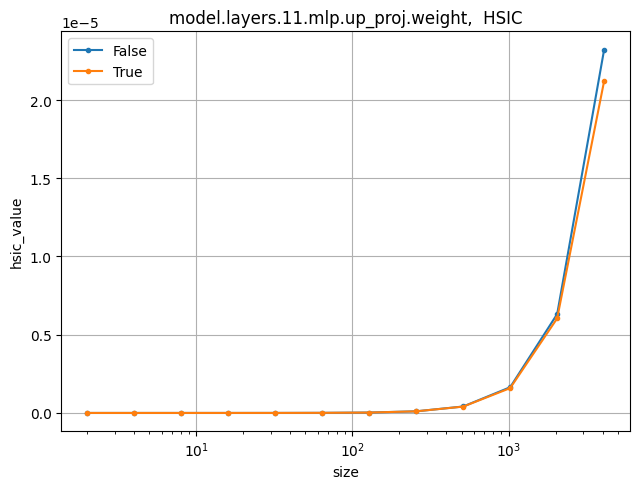

model.layers.11.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.251821967876133e-05, 7.967295572678178e-06, 1.8183407381687529e-06, 4.810457576723641e-07, 1.0325629140078995e-07, 2.5342504608331083e-08, 6.495581996832608e-09, 1.4999343951124962e-09, 6.299180382547127e-10, 1.1989591917612102e-10, 2.380881422170885e-12, 5.141808715300048e-12]
[2.2095927811294578e-05, 5.82889235394202e-06, 1.5461279608747937e-06, 3.907433484556373e-07, 9.82072305882767e-08, 2.4731206984660195e-08, 6.205248615661002e-09, 1.4437571767610546e-09, 4.660414526387218e-10, 4.5203791321317986e-11, 1.1371242124395673e-11, 4.197322201317612e-11]


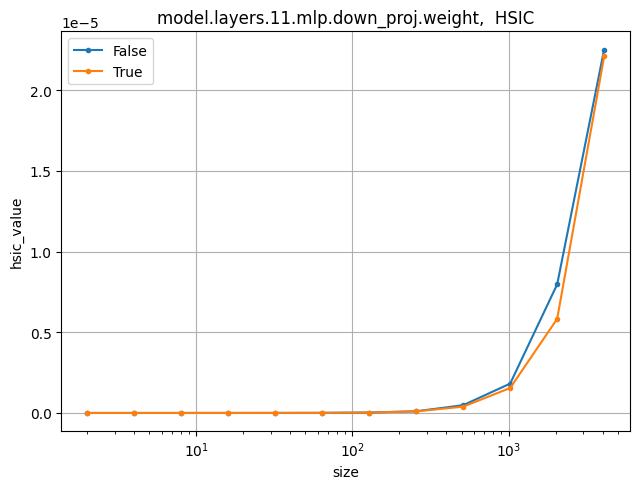

model.layers.12.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0002806321868295462, 6.928159434475363e-05, 1.4471489827158844e-05, 3.4561078670193883e-06, 8.080290000892797e-07, 1.9289258054661063e-07, 4.792809810894457e-08, 1.1532005022529067e-08, 3.7312420690105765e-09, 8.169480386692588e-10, 3.7660476816371004e-10, 6.701194551612552e-11]
[0.00014740236127306077, 5.149772665829807e-05, 1.465151887719999e-05, 2.655774415460927e-06, 6.254128643067742e-07, 2.077500599512862e-07, 4.4391385800501745e-08, 1.3850093411788872e-07, 1.834297413433252e-09, 6.46059804883023e-10, 1.552166037156905e-10, 7.531630529364698e-11]


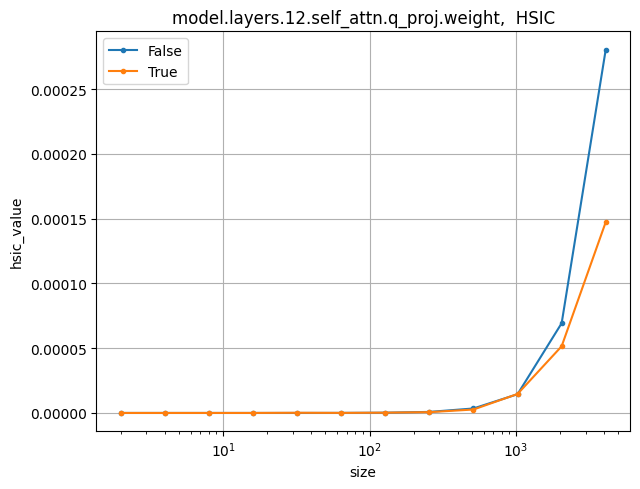

model.layers.12.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0011998007418512562, 0.0003099478986786395, 7.65319195308488e-05, 1.8047762021796827e-05, 4.35421902075682e-06, 1.0514976490056068e-06, 2.4422273258977523e-07, 5.850606420320026e-08, 1.5473346606177455e-08, 3.6307604881425638e-09, 5.217162770593934e-10, 1.493930607073288e-10]
[0.0007161834954073961, 0.00012113052477711669, 7.968004972961348e-05, 2.577573804204138e-05, 3.846935117045131e-06, 9.434252397601464e-07, 2.2158297582737704e-07, 5.463992240292045e-08, 1.607465656127053e-08, 3.2778896574187977e-09, 1.186910481089297e-09, 1.222778669160205e-10]


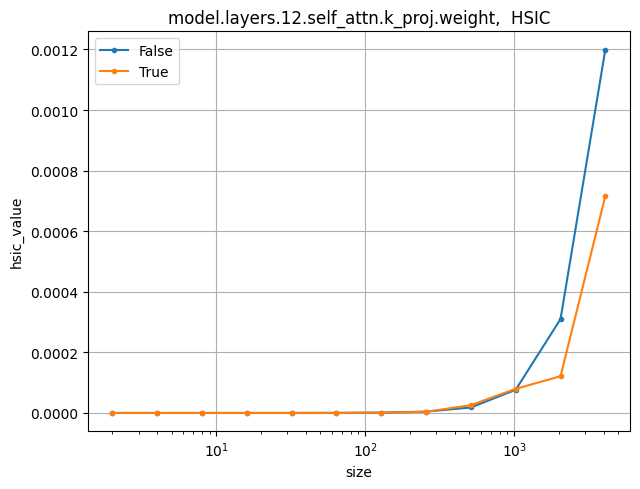

model.layers.12.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[3.0442207916690874e-05, 4.3009148745431465e-06, 1.0210536640863367e-06, 2.436356292210372e-07, 5.8275817912872504e-08, 1.503750473415899e-08, 3.822564383487448e-09, 9.703765385325744e-10, 2.2962667598201627e-10, 5.6409860347866133e-11, 9.00382602409438e-12, 3.370261166443675e-13]
[2.455717826599924e-05, 3.237446566690617e-06, 1.0276803932949753e-06, 2.9049028177052577e-07, 6.117248446761756e-08, 1.4077236668021135e-08, 3.714048299656086e-09, 7.099882491278496e-10, 3.1780519228264066e-10, 3.692515244528042e-11, 2.496482888410345e-11, 9.446315790938131e-12]


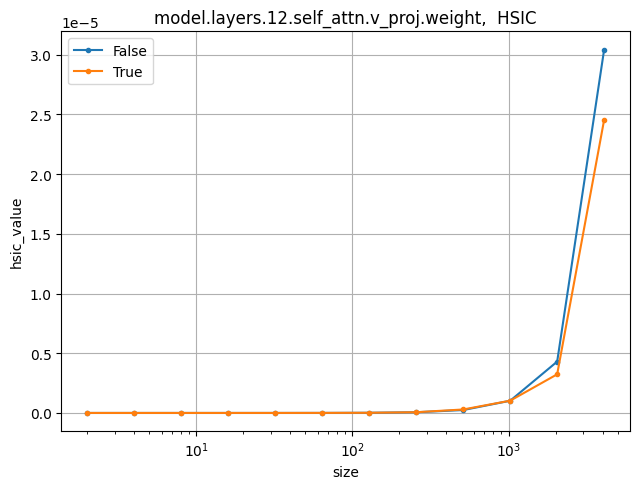

model.layers.12.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.8471619668485276e-05, 5.4142825166665434e-06, 1.2784372776750195e-06, 5.898431081450172e-07, 1.2623123670769684e-07, 2.2624430564072624e-08, 4.9298216183656566e-09, 1.3191331357652293e-09, 2.557874109889325e-10, 5.7525544227543286e-11, 6.670189489929595e-12, 3.706630909216184e-11]
[1.5475589041070247e-05, 5.508121207674671e-06, 1.2730381232359917e-06, 2.91243899223881e-07, 7.581280357366416e-08, 2.2409481274362505e-08, 4.6007984997121705e-09, 1.141499645708023e-09, 2.5516462130011537e-10, 9.529048968049227e-11, 2.6054367359977765e-11, 7.604806631897266e-12]


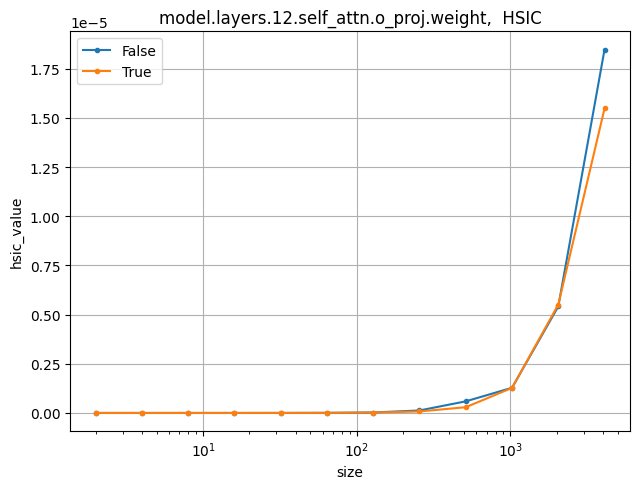

model.layers.12.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[8.042411558283217e-05, 1.9065922825951673e-05, 4.619774070510459e-06, 1.122761102527987e-06, 2.672742034448046e-07, 7.1412493915584e-08, 1.837042893065768e-08, 4.136547462704365e-09, 1.1815376494138699e-09, 1.251898027126582e-10, 5.4960024121252526e-11, 5.182233399176946e-12]
[4.0095763623087006e-05, 1.4026121283921797e-05, 3.481847252746437e-06, 8.76963174845989e-07, 2.2280655640090408e-07, 5.4685607377980354e-08, 1.3237226395691998e-08, 4.0251349005766976e-09, 1.1106580158227257e-09, 1.5685910702016216e-10, 2.181133531446203e-10, 3.942075604958425e-13]


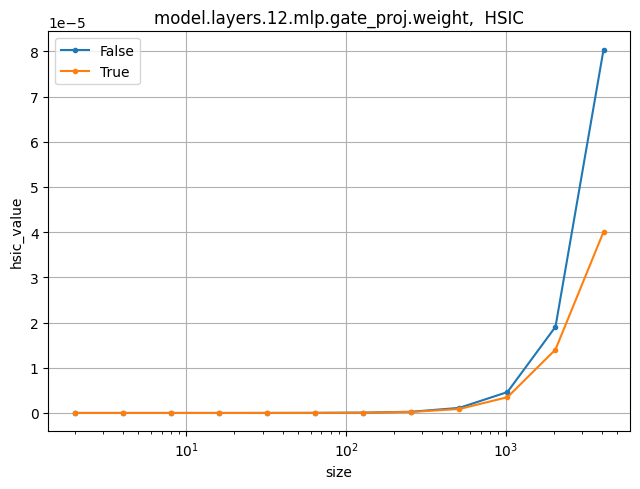

model.layers.12.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.515758951376773e-05, 6.841408902604272e-06, 1.7709408923363868e-06, 4.50560207071051e-07, 1.1080590859087515e-07, 2.7765817503421767e-08, 7.07453917649756e-09, 1.8429487683021293e-09, 2.9567984869201503e-10, 1.5651095440497075e-10, 2.7842600681159326e-11, 1.3553335842815686e-12]
[2.280892447963798e-05, 6.4415766630133925e-06, 1.7060764711404696e-06, 4.3975874106682534e-07, 1.110200579651597e-07, 2.6733069112447393e-08, 6.821971974468133e-09, 1.649673351739313e-09, 3.8566212214832673e-10, 5.7630973247719525e-11, 6.900643262321551e-11, 2.443163952285532e-11]


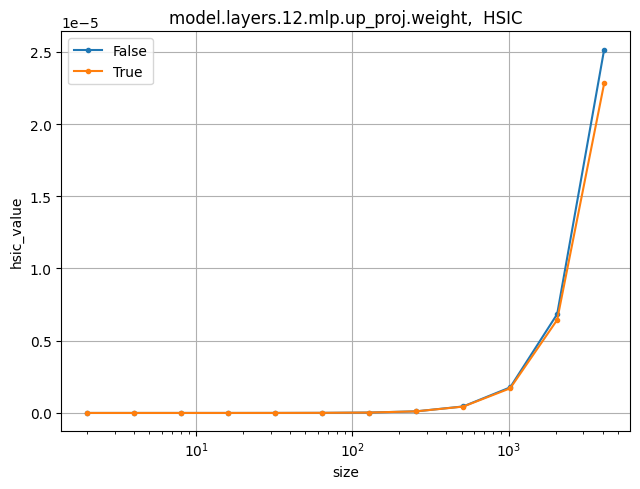

model.layers.12.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.2326235426263312e-05, 6.3306240646130994e-06, 1.839437581727585e-06, 4.2625278702904205e-07, 1.3476960846444274e-07, 2.5664437492142657e-08, 8.759419698829064e-09, 2.4489033186833836e-09, 3.909002396870095e-10, 1.335197683578707e-10, 3.272310373168212e-11, 7.006914905042399e-12]
[2.317858446688175e-05, 6.166328659070697e-06, 1.6474332558391432e-06, 4.2472568796763116e-07, 1.0536340324558388e-07, 2.6797247654607057e-08, 6.487938750186284e-09, 1.4100238394666546e-09, 4.621130344686232e-10, 1.6484004576977326e-10, 3.142364979467152e-11, 1.3067844171304396e-11]


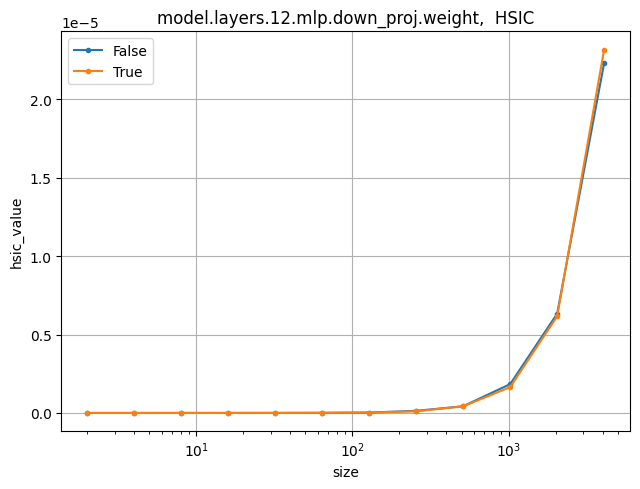

model.layers.13.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0005086117932389534, 0.00010280574349614889, 1.936419804852899e-05, 4.132667227753396e-06, 9.433999026633692e-07, 2.2734629988412526e-07, 5.592653569253684e-08, 1.2759751510947249e-08, 4.823385384718888e-09, 1.4269779617924017e-09, 2.7882005522300413e-10, 1.7751855573554968e-10]
[0.00035326400792040803, 5.2403904504161294e-05, 1.8336411175985613e-05, 2.8316829411613663e-06, 7.313319810158754e-07, 2.42568356161253e-07, 5.344179100371497e-08, 2.3432776095121192e-07, 3.9381557608522335e-09, 5.060979650186052e-10, 1.3563609523944602e-10, 4.0651265058894914e-11]


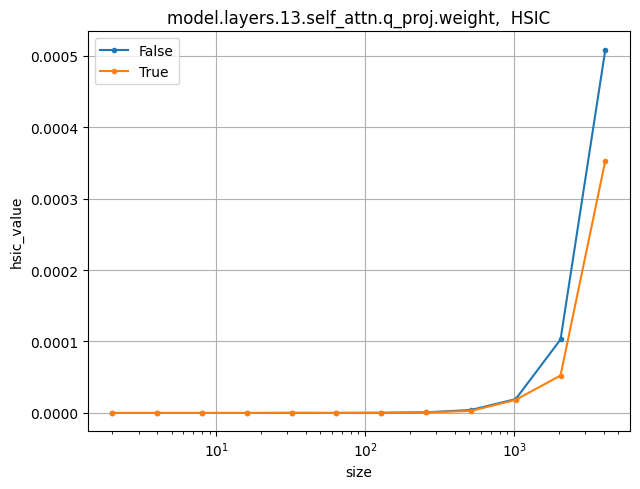

model.layers.13.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.002481993992559882, 0.0006339562787333438, 0.00012976405796527547, 2.569687655650871e-05, 5.785408844385117e-06, 1.316993547968349e-06, 3.491866875802597e-07, 9.090825716370528e-08, 2.210789522052974e-08, 2.088839750249694e-09, 6.838084769278058e-10, 1.2760931376395935e-10]
[0.0018851337994847692, 0.00013348225916727416, 0.00013249368724818864, 2.8770860824781778e-05, 4.9063018010963254e-06, 1.362191294509513e-06, 3.208494949456628e-07, 6.927176175042199e-08, 1.9251948796513847e-08, 4.325777606637449e-09, 1.2041494246235036e-09, 4.866999373183838e-12]


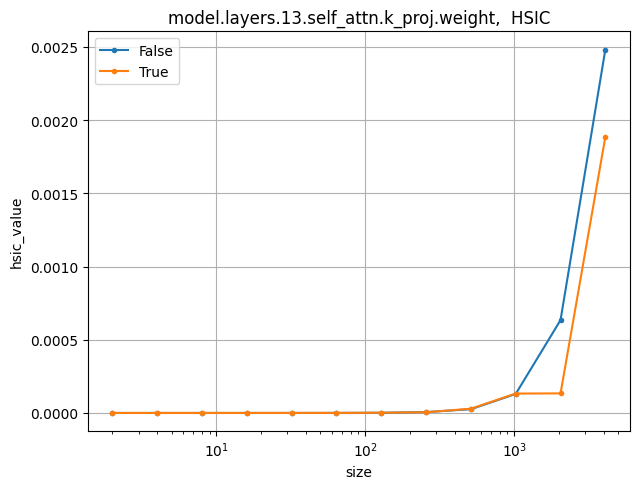

model.layers.13.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.1533198062735817e-05, 2.9662219288657896e-06, 7.124241339357484e-07, 1.7228320060216654e-07, 4.381808672167182e-08, 1.0814724930841652e-08, 2.779101941548569e-09, 6.673339752057691e-10, 1.5338595211158875e-10, 4.1085449916316083e-11, 9.677602252720094e-12, 1.5932313763607332e-12]
[1.8021546032277077e-05, 2.385898647404536e-06, 7.068191583084349e-07, 1.9577909110998747e-07, 4.119452984657466e-08, 1.0516129163082264e-08, 2.554367913039207e-09, 5.467748235954376e-10, 1.593153276401915e-10, 6.469658864006211e-11, 1.8593438602553637e-11, 3.68060773073251e-12]


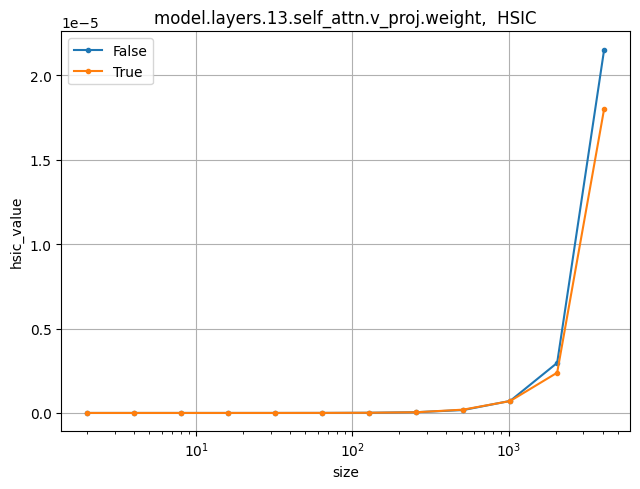

model.layers.13.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[2.183495167875498e-05, 5.068386205539829e-06, 1.195396266139438e-06, 4.503653894313634e-07, 1.1739829828047708e-07, 2.0217261766277642e-08, 5.027156768872424e-09, 1.080560734500861e-09, 2.5984971537610776e-10, 6.890094539837676e-11, 1.438192750834816e-11, 5.744845040468138e-12]
[1.3976652405275561e-05, 5.6295383062378315e-06, 1.3137251722530647e-06, 2.667145031485591e-07, 7.10334019890637e-08, 1.6980946285180864e-08, 3.983993501565087e-09, 1.147518462362662e-09, 2.782691895715163e-10, 8.269335370609345e-11, 2.6208837817646177e-11, 2.5659448289834395e-13]


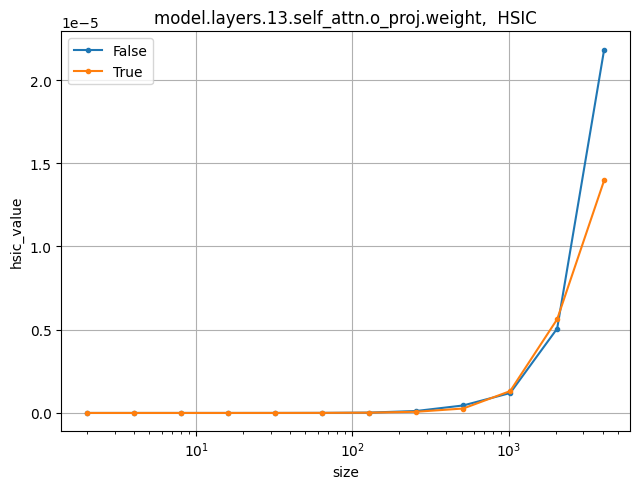

model.layers.13.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[7.435906337616712e-05, 1.8187807274516712e-05, 4.421376764707284e-06, 1.1345968759825871e-06, 3.151994066334714e-07, 7.218799566594083e-08, 1.6001453666142835e-08, 5.047037958013601e-09, 1.280492871899114e-09, 1.879184463865646e-10, 1.3467396547298107e-10, 9.789585673942145e-13]
[4.1448320874008516e-05, 1.42884823258323e-05, 3.5057280569055992e-06, 8.883094297518459e-07, 2.287698485280882e-07, 5.722605615283956e-08, 1.4325568880788995e-08, 4.045504849737948e-09, 6.224703968461915e-10, 1.5446492292355205e-10, 1.5663745045400885e-11, 4.820682687675998e-11]


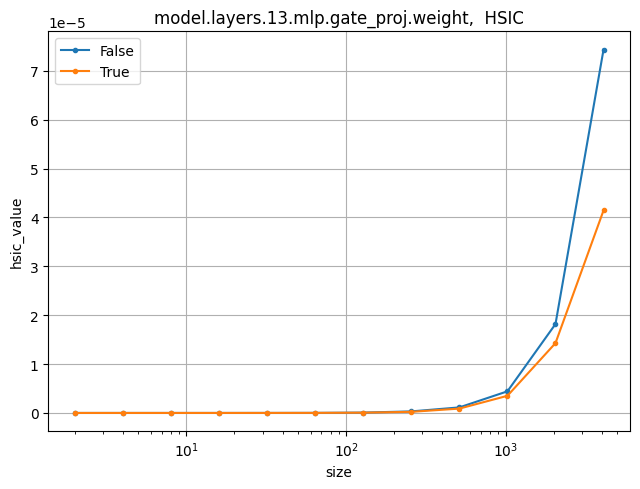

model.layers.13.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.557411144926164e-05, 6.9151948498390655e-06, 1.7835732237479901e-06, 4.549798529467787e-07, 1.1456005202503435e-07, 2.9588019878281567e-08, 7.539833808373407e-09, 1.6510124964149083e-09, 4.5890710139628514e-10, 1.9113914258179116e-10, 5.578457006755492e-11, 3.621092704162609e-12]
[2.3083941690233376e-05, 6.546823559452423e-06, 1.7292025075805771e-06, 4.4317136134479665e-07, 1.1336023202071076e-07, 2.7523507679066344e-08, 7.1990861050032696e-09, 1.8290365020487628e-09, 3.5415708100371715e-10, 1.1331669508582952e-10, 2.2577017213545307e-11, 6.2039283173104204e-12]


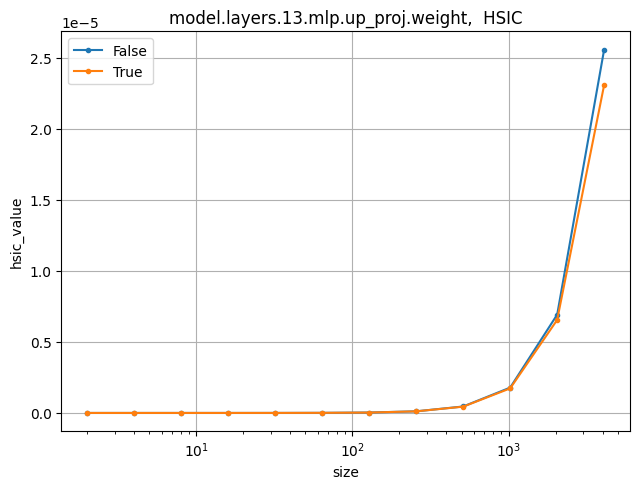

model.layers.13.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.2595556452198484e-05, 6.616324282240214e-06, 1.6657177423561742e-06, 4.2453916852235533e-07, 1.1644876564220852e-07, 2.9320858092025044e-08, 6.8583917905552055e-09, 1.787974964377313e-09, 3.9756210988635677e-10, 9.151936243614596e-11, 9.039359488506167e-13, 1.5890967976276896e-13]
[2.219313671434071e-05, 6.147428802260371e-06, 1.6259230653083857e-06, 4.1840830115179564e-07, 1.0516820101866737e-07, 2.629070297868231e-08, 6.807651057626742e-09, 1.4869908666083411e-09, 4.4477136838644076e-10, 9.557570713108507e-11, 4.7714397223269925e-12, 9.840238509869962e-12]


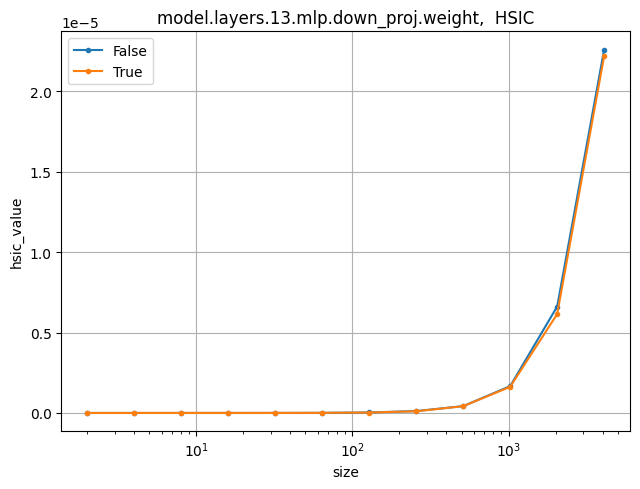

model.layers.14.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0003800338940130858, 7.60020410741777e-05, 1.5325117712257903e-05, 3.272488865514478e-06, 8.11249101530656e-07, 1.9301827453495835e-07, 4.977379285972272e-08, 1.2025375985121272e-08, 3.075153269766327e-09, 8.53764186746608e-10, 2.3798512360837e-10, 1.8338014321441138e-11]
[0.00023883900960384866, 4.6405316782061886e-05, 1.550144233026591e-05, 2.668721229293734e-06, 6.37753553439301e-07, 1.8999928788421392e-07, 5.022811181435566e-08, 2.2896358381907965e-07, 2.6489083744867617e-09, 6.690967627902228e-10, 1.32707883690743e-10, 1.140355205190611e-12]


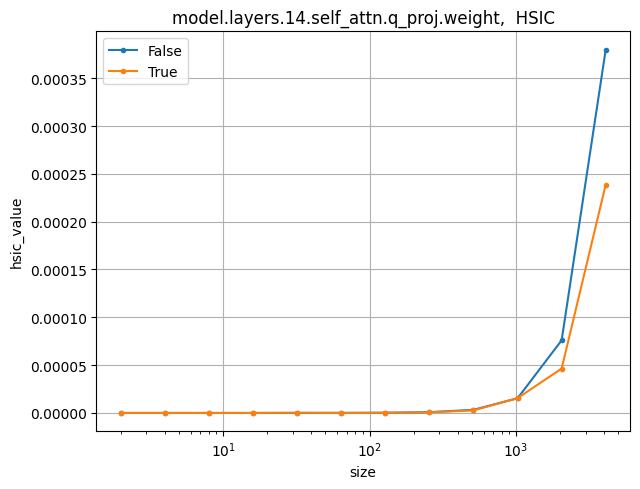

model.layers.14.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.002177665531540869, 0.0005979302951786371, 0.00012826424370157038, 2.5129586038514753e-05, 5.548412529658237e-06, 1.3421742445540027e-06, 3.332083418786346e-07, 8.601297501349123e-08, 2.0225205186628516e-08, 3.78546287799189e-09, 2.6910107877675725e-09, 8.734805632953457e-11]
[0.0015855987803388002, 0.00013035684421405084, 0.00012549437608615753, 2.496831712122415e-05, 5.059462960407943e-06, 1.2181400808279162e-06, 2.9655897926510025e-07, 8.713040049518856e-08, 2.5673052572208182e-08, 3.990488618652831e-09, 2.3923544403098104e-09, 9.806957907912237e-11]


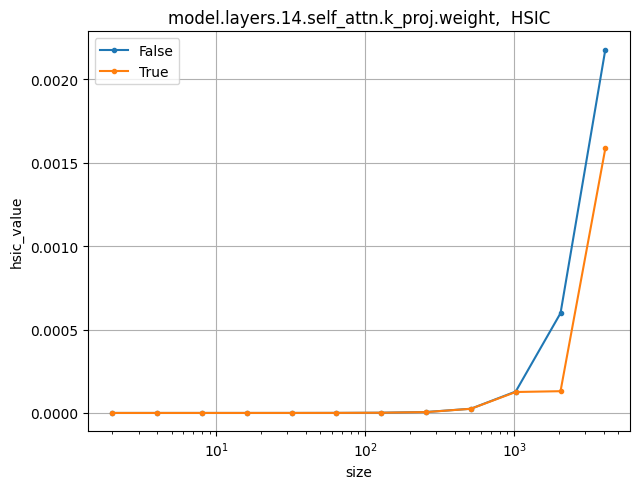

model.layers.14.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.0806276868890906e-05, 2.8871241015408673e-06, 7.044981269055364e-07, 1.7356637899294975e-07, 4.3833612945602703e-08, 1.0664963262092132e-08, 2.644271013735723e-09, 7.457334065075116e-10, 1.7117634112011086e-10, 3.9921140920358975e-11, 9.564512034049697e-12, 8.671870020870325e-12]
[1.8007144204692843e-05, 2.3016540369938746e-06, 7.042826289245614e-07, 1.7861766772653627e-07, 3.902026614145647e-08, 1.0328232225572439e-08, 2.4089287396208184e-09, 6.054840200779652e-10, 1.3308326387493186e-10, 4.831661867763956e-11, 1.2972979305613193e-11, 4.592058505294383e-13]


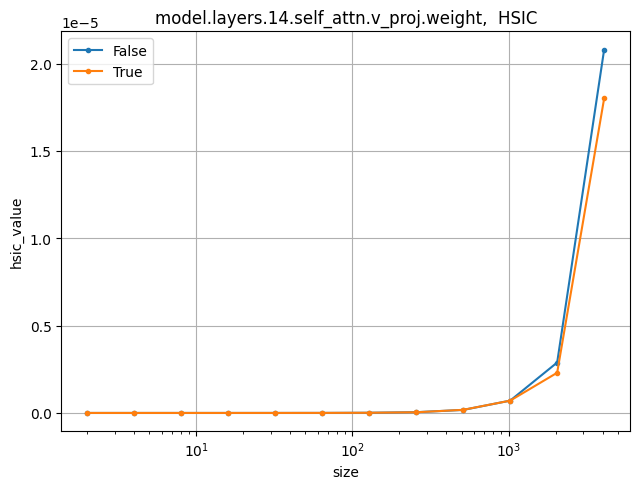

model.layers.14.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.7175528373250372e-05, 4.471461746287022e-06, 9.933324309795392e-07, 5.393053372027885e-07, 1.6073720062791082e-07, 2.2346771808804588e-08, 5.697538879064851e-09, 1.264058236103067e-09, 2.833096726108683e-10, 6.969659675218669e-11, 1.214288117687092e-11, 7.046248109551684e-13]
[1.3811586470457108e-05, 5.445905797717113e-06, 9.974141982486086e-07, 2.6279283554976583e-07, 7.036834369866332e-08, 1.558611657760473e-08, 3.95269673836339e-09, 1.0906335567657215e-09, 2.378818291347621e-10, 6.391977681533538e-11, 6.40318645316066e-12, 4.789181296627211e-13]


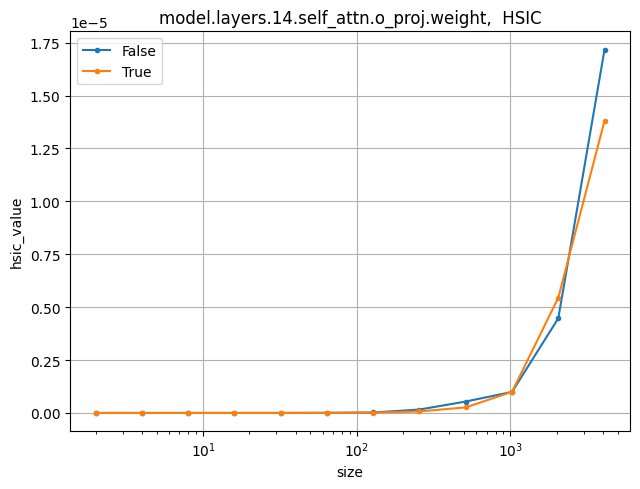

model.layers.14.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[7.835694094759146e-05, 2.3666807927611325e-05, 5.716106614549879e-06, 1.3675076468771763e-06, 3.371421839732901e-07, 9.537442275678814e-08, 2.122254453569253e-08, 4.416252322117081e-09, 9.42704714170334e-10, 3.301819428495573e-10, 4.586642350583073e-11, 9.838737219291567e-12]
[4.547340651341357e-05, 1.529517073414236e-05, 3.865664260097364e-06, 9.80230707984977e-07, 2.422438284896858e-07, 6.271431462935046e-08, 1.541137771249049e-08, 4.307040804479756e-09, 1.1972246742325296e-09, 1.8186392292846987e-10, 4.932074496269929e-11, 6.7366400427362975e-12]


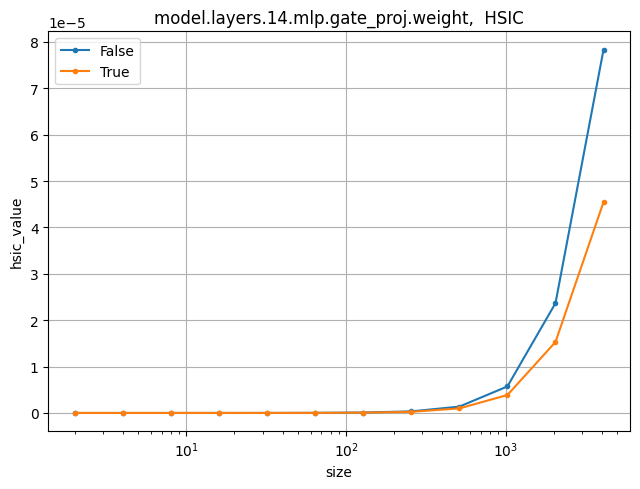

model.layers.14.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.4761125690546403e-05, 6.702073338537679e-06, 1.741517333806738e-06, 4.511777257553126e-07, 1.1425252758577609e-07, 3.008550408093701e-08, 7.1714938828643725e-09, 1.948843642449214e-09, 5.843328918241554e-10, 1.1562952145705911e-10, 5.2904668735984466e-11, 2.8271683434347685e-11]
[2.2802488951090387e-05, 6.437905024073151e-06, 1.7058023885422e-06, 4.336654554538169e-07, 1.1224253498431389e-07, 2.8396654872203145e-08, 7.107149905573944e-09, 1.6024110810294127e-09, 5.262575695522322e-10, 1.0095992814022666e-10, 1.1720598576147585e-10, 5.113225376575699e-12]


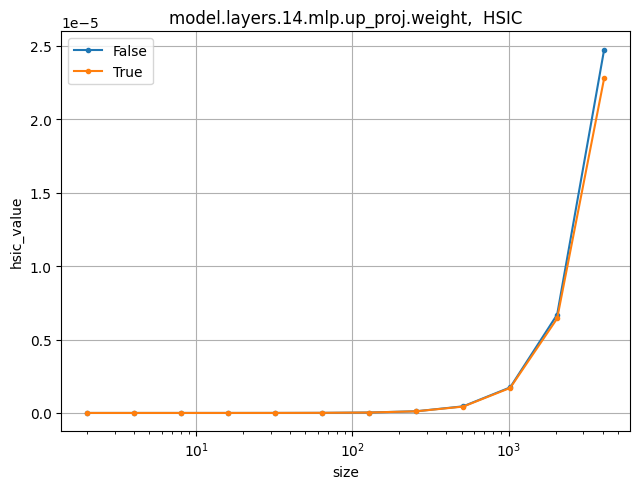

model.layers.14.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.228721061950805e-05, 6.458988135015093e-06, 1.6889365694589238e-06, 4.2751517098857507e-07, 1.0909696272572476e-07, 2.7442343205160084e-08, 7.021518280978989e-09, 1.5226288671096974e-09, 4.6269681331239536e-10, 1.0605044241252832e-10, 2.3842516446509177e-11, 4.5306310011266735e-12]
[2.2128406090194944e-05, 6.109082314814045e-06, 1.606021931109008e-06, 4.1483448886138803e-07, 1.0428523768311337e-07, 2.616309314419438e-08, 6.6765271127979836e-09, 1.6706571165889715e-09, 3.634746494786024e-10, 1.1231699218113394e-10, 3.4447974364114535e-11, 5.965771085822107e-12]


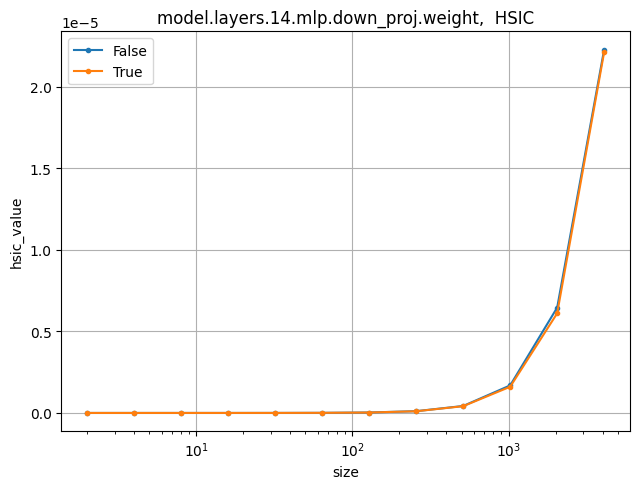

model.layers.15.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0009296909611607229, 0.00019627960492857497, 3.278158041083884e-05, 6.782109927921096e-06, 1.6413981760218668e-06, 3.8501501268151646e-07, 8.685776355880377e-08, 2.314185605283727e-08, 5.826683944766677e-09, 9.415511534286873e-10, 5.284921536327122e-10, 4.48934326194348e-12]
[0.0006978792989203444, 6.649686879580888e-05, 3.36269302113174e-05, 4.087151276406217e-06, 9.603660144775005e-07, 3.611874867949331e-07, 7.517662739092148e-08, 2.6184762886682493e-07, 5.4052343924500005e-09, 1.7216995059363558e-09, 4.005241635559357e-10, 6.477020533300371e-12]


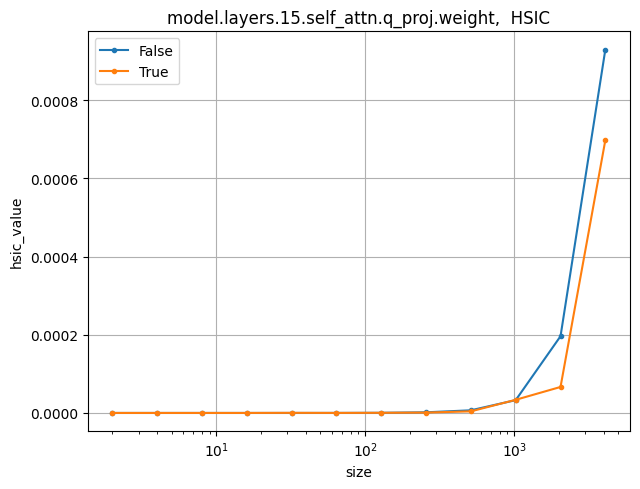

model.layers.15.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0014228450978671216, 0.0003707188443236241, 8.919670141445829e-05, 2.0701073819498945e-05, 4.733642148155515e-06, 1.1418703896403115e-06, 2.995959793718849e-07, 6.226668619557671e-08, 2.068359087634177e-08, 8.532612574469884e-09, 6.827826869269679e-10, 5.551900556470806e-10]
[0.0009208675760964994, 0.00012498794394589417, 8.54977721757064e-05, 2.336329748281178e-05, 4.128679988348733e-06, 1.117371711397986e-06, 2.549564851737974e-07, 6.732374354545654e-08, 2.642446405301979e-08, 4.754150415994563e-09, 1.122330812003514e-09, 1.5213372567505887e-09]


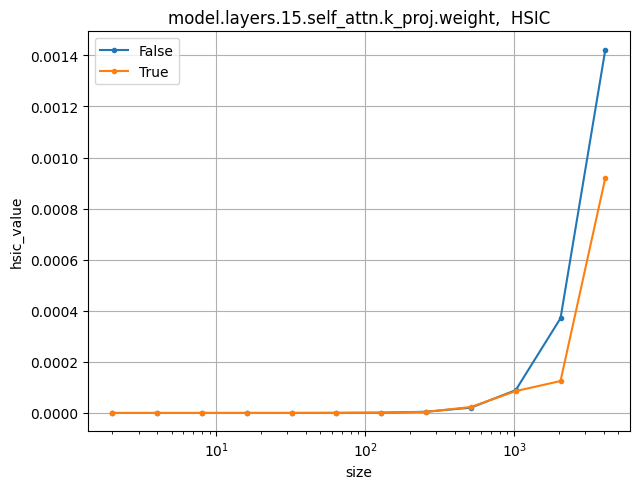

model.layers.15.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.655162579046901e-05, 3.7068038362984344e-06, 9.453409951523236e-07, 2.4307229690243577e-07, 6.091150692817693e-08, 1.608186111871543e-08, 3.866707720620501e-09, 1.1680636190294276e-09, 2.2816927880208463e-10, 3.8131883934385375e-11, 2.9010083131798433e-11, 5.028582708606853e-12]
[2.6298269204835278e-05, 3.19249659465234e-06, 9.406970779417556e-07, 2.0978838986996777e-07, 5.624782232873033e-08, 1.6345534178916735e-08, 3.3227689967012006e-09, 7.955680347432186e-10, 2.6313213392339806e-10, 5.626330811133715e-11, 7.609558859098916e-12, 4.478631657172243e-12]


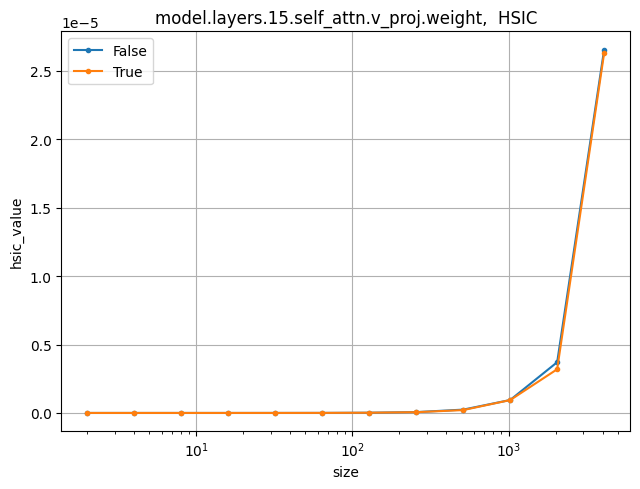

model.layers.15.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.7653510350323296e-05, 4.4693691043587605e-06, 1.1215295156641319e-06, 5.871114189068685e-07, 1.395860872932622e-07, 2.6727018643140272e-08, 6.641329745897371e-09, 1.5379914782403343e-09, 3.631248998980731e-10, 4.778069242172815e-11, 4.317048691161553e-11, 5.651382077901755e-13]
[1.5752916475471916e-05, 5.899081914129734e-06, 1.159915280239235e-06, 3.0516003371858837e-07, 8.207508830500639e-08, 1.8387554983444443e-08, 4.720887771531789e-09, 1.4306596141919022e-09, 3.4764914252597465e-10, 1.1313198697864224e-10, 1.3148455041930937e-11, 3.058932220278399e-14]


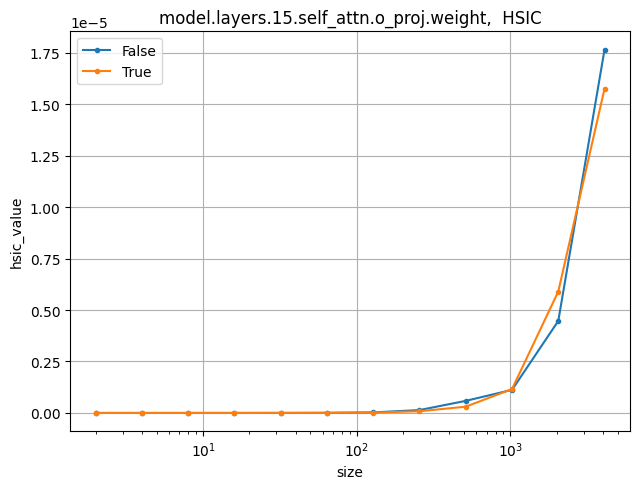

model.layers.15.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[8.791990494749561e-05, 2.1871648086138325e-05, 5.816445233626763e-06, 1.3855990426561929e-06, 3.5359561428052007e-07, 9.470581317808883e-08, 2.489396966828839e-08, 6.095716092894073e-09, 9.692868848440723e-10, 2.8939889827644017e-10, 6.799709668124821e-11, 2.3566438557934045e-11]
[4.9085978532093165e-05, 1.7206575800579252e-05, 4.339131785849301e-06, 1.0744182729740619e-06, 2.770936101149564e-07, 7.035839872710296e-08, 1.8100671606771945e-08, 4.6987215807741415e-09, 8.50309572868845e-10, 2.8927685384066647e-10, 2.835323467150962e-11, 1.309082858750591e-12]


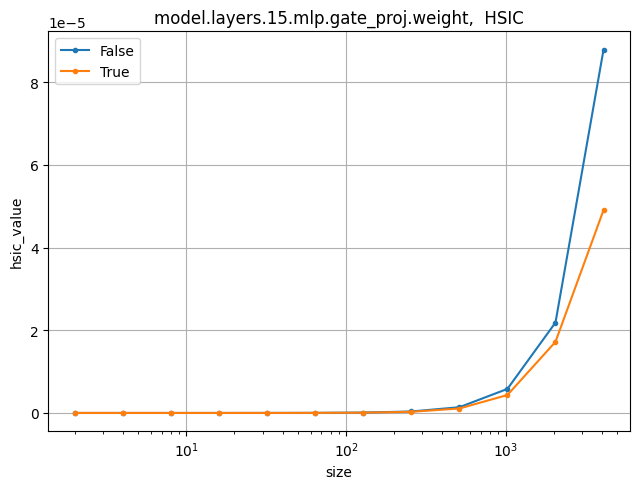

model.layers.15.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.385158603941314e-05, 6.5098007394101445e-06, 1.6842349022523054e-06, 4.398075520809178e-07, 1.0742121164280735e-07, 2.8525199212914992e-08, 6.658913116032573e-09, 1.356097290056006e-09, 3.794490472459533e-10, 9.943010603409692e-11, 1.377187486886927e-11, 3.5276509152777874e-13]
[2.2101398003483165e-05, 6.252980075439916e-06, 1.6472602241307156e-06, 4.242990558178928e-07, 1.0872777141236794e-07, 2.731349468817441e-08, 7.126407252160805e-09, 1.8174024803666514e-09, 3.5062633198034953e-10, 1.0732990170730155e-10, 4.5258377083448346e-11, 7.670177284617802e-14]


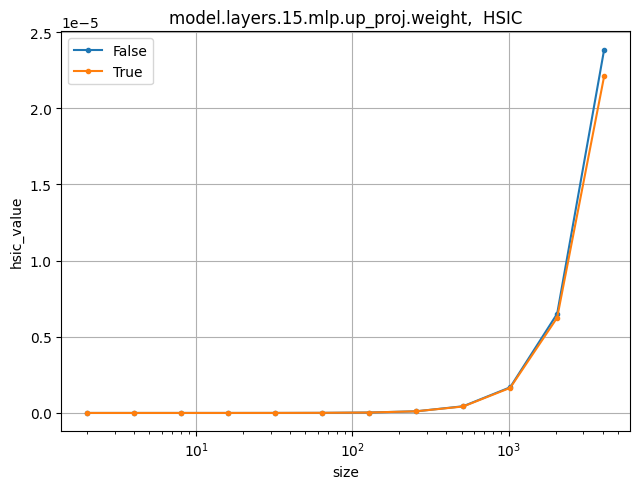

model.layers.15.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.218697064125809e-05, 6.268363813618443e-06, 1.5933222027808974e-06, 4.1952003659641227e-07, 1.0229011654328992e-07, 2.6486545618761513e-08, 6.69273399083084e-09, 1.6976147052058742e-09, 4.012520640089912e-10, 8.682765226244624e-11, 1.6867445168889363e-11, -2.7090379724151027e-15]
[2.1646266563815382e-05, 5.949721340348338e-06, 1.5715220881924448e-06, 4.0604695575307955e-07, 1.0291034131926611e-07, 2.5196254634846857e-08, 6.589622261972298e-09, 1.4782357325313702e-09, 3.561817652546324e-10, 1.5057134115582436e-10, 2.8959572226115492e-11, 3.780480949284143e-13]


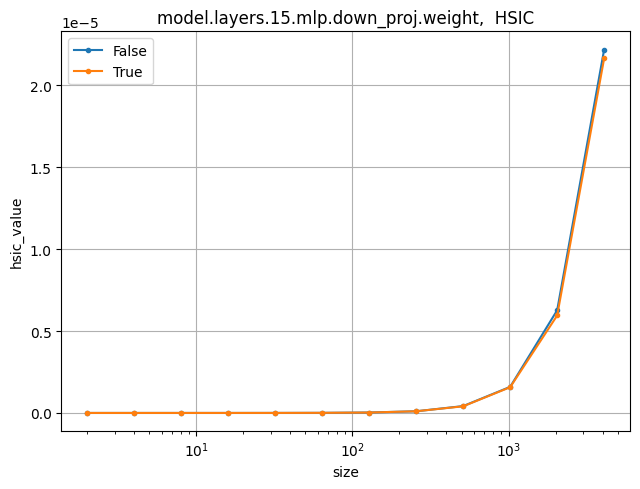

model.layers.16.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.0004947976043725411, 0.00010315069922998018, 2.0518225604580782e-05, 4.501932789874029e-06, 1.1375628658511074e-06, 2.603770679793837e-07, 6.831518061619712e-08, 1.8536174389039947e-08, 4.815967877405638e-09, 7.967554771826421e-10, 9.65106365367154e-11, 1.5824431699217858e-11]
[0.0003186420321901026, 5.42199934026793e-05, 2.2376809299324574e-05, 3.562784758256839e-06, 8.060365615305156e-07, 2.794158194557447e-07, 6.155422471473462e-08, 1.9911622601923037e-07, 3.737613328915705e-09, 1.159612437959457e-09, 7.565136303835298e-11, 2.5012059550679704e-11]


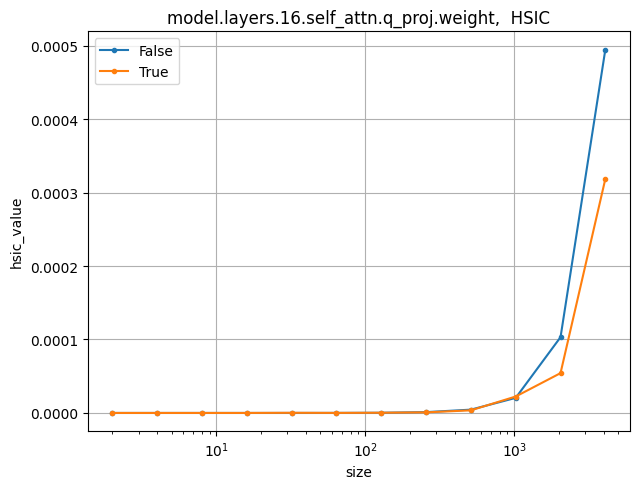

model.layers.16.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.001705877889621872, 0.00048796282302619064, 0.00010491297449493778, 2.3664307346054374e-05, 5.476723936776112e-06, 1.265109111580434e-06, 3.1152846430785526e-07, 8.241156403477278e-08, 2.4102452939849482e-08, 6.2436339371499836e-09, 1.1502341518242078e-09, 5.684786155247924e-11]
[0.0010377004821246658, 0.00012744904893314944, 0.00010614878545060137, 2.299068241564634e-05, 4.938499219941969e-06, 1.2192442706002482e-06, 2.7415720006330515e-07, 7.527914958471212e-08, 2.0656047397783055e-08, 3.535456149019511e-09, 1.5231766299584577e-09, 4.4879362655149616e-11]


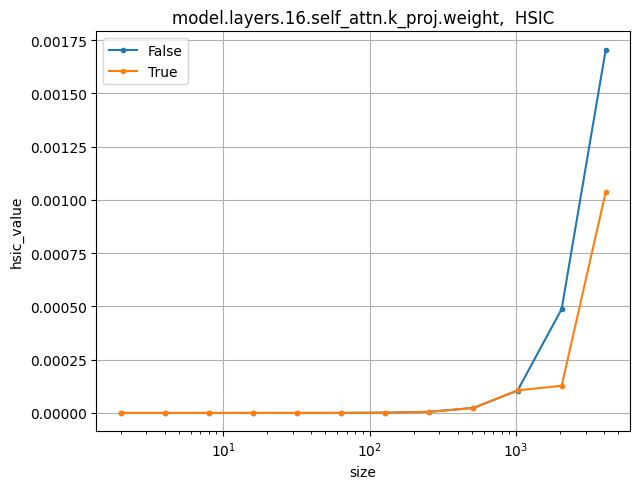

model.layers.16.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.056060566960149e-05, 2.848048108168048e-06, 7.130298861331002e-07, 1.7724963240618935e-07, 4.605386845937585e-08, 1.106675641614352e-08, 2.8818938500949585e-09, 7.094703678326695e-10, 1.93981928951102e-10, 3.4819416413450346e-11, 3.096819689233604e-12, 8.554016204816266e-14]
[1.9251029041509333e-05, 2.48698586990898e-06, 7.156219062563204e-07, 1.7021454839059584e-07, 4.178997065670465e-08, 1.1229525151015186e-08, 2.530931513276569e-09, 6.586981291822452e-10, 1.3658538046071886e-10, 3.6088297914431056e-11, 1.5323489150110953e-11, 6.576584861160874e-13]


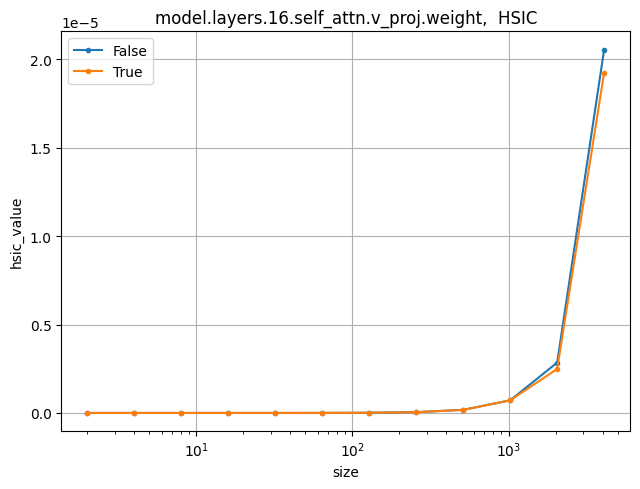

model.layers.16.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.7684446853510566e-05, 4.052491149255353e-06, 9.558776470741289e-07, 4.2273990876304367e-07, 1.2873622815433398e-07, 2.0761333848344045e-08, 5.072012457843913e-09, 1.3341455737447187e-09, 2.721061948314339e-10, 1.0894724518188592e-10, 1.2213766466523823e-11, 1.886528458466466e-12]
[1.4387928784428766e-05, 5.2226706054355714e-06, 1.0946360080886376e-06, 2.736611714838541e-07, 9.260539444407689e-08, 1.6128283312748875e-08, 4.417519527372504e-09, 1.1738036705330009e-09, 3.1844448458673644e-10, 6.54214514907263e-11, 5.125210584698883e-12, 1.0282535219955166e-12]


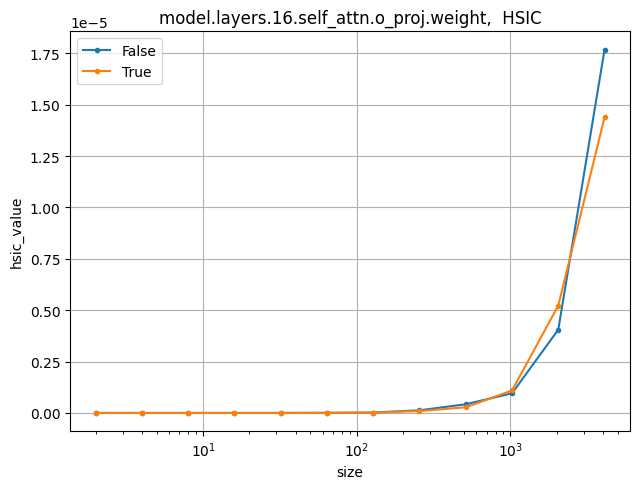

model.layers.16.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[9.232007897261119e-05, 2.3259869678034556e-05, 6.612010438634792e-06, 1.5024533687806798e-06, 3.8473908203047253e-07, 8.915985301218501e-08, 2.469671784901877e-08, 5.591557023575482e-09, 9.818062470141032e-10, 2.784976132855688e-10, 1.0573762675072229e-10, 4.0383630241323716e-11]
[5.1828879131442055e-05, 1.827617087316632e-05, 4.618731740874464e-06, 1.1900278345913446e-06, 3.090618768612731e-07, 7.407071310277417e-08, 1.9249502446190484e-08, 4.831929933408136e-09, 1.4566568260673927e-09, 2.725145313884114e-10, 8.244568105217896e-12, 5.3689965676064164e-12]


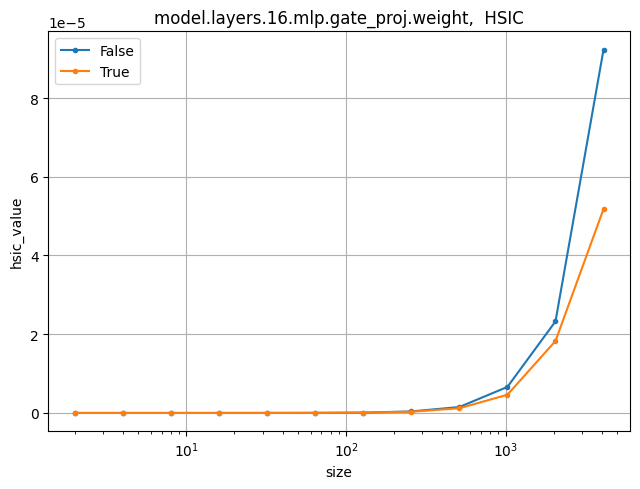

model.layers.16.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.2475839492713064e-05, 6.1648097366490775e-06, 1.6157922051144454e-06, 4.1436968118872104e-07, 1.0365588334101828e-07, 2.524233127300619e-08, 6.696336379498773e-09, 1.6105363840744666e-09, 3.137465857848083e-10, 5.5369923748143756e-11, 2.5158170163685373e-11, 1.7762995478252875e-13]
[2.0955493991684047e-05, 5.92456325430595e-06, 1.5652206198579675e-06, 3.983552468396168e-07, 1.0166889420929511e-07, 2.5974953172277443e-08, 6.1352557891572666e-09, 1.7224959526026905e-09, 3.5897927229725064e-10, 8.441632357451008e-11, 4.634500445552944e-11, 2.1942631998221856e-14]


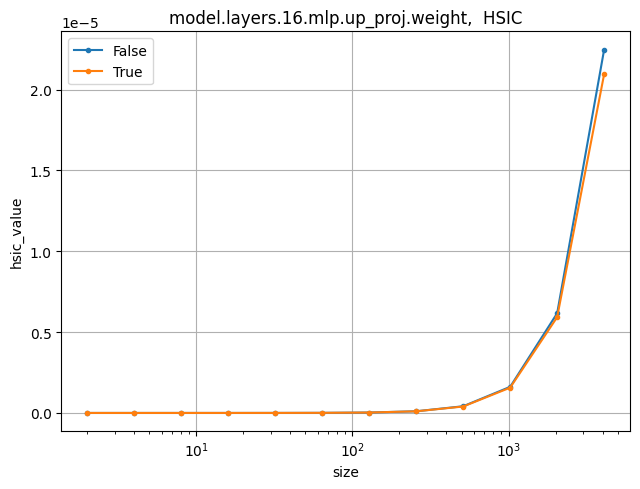

model.layers.16.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.099512000225655e-05, 5.7733965615965934e-06, 1.522297090230168e-06, 4.202099013861071e-07, 9.673825841590935e-08, 2.547758916788431e-08, 6.547273163513544e-09, 1.373970933257793e-09, 4.433312645703429e-10, 5.045371320031123e-11, 1.374367442448304e-11, 5.932578607598359e-12]
[2.0886989025939803e-05, 5.64842900121246e-06, 1.5033400364550649e-06, 3.861388915392845e-07, 9.729951735324482e-08, 2.4388660301741235e-08, 6.612878342090257e-09, 1.4640830301027915e-09, 3.3025951700131057e-10, 7.000108730796466e-11, 2.75932839780732e-11, 8.000019902738755e-12]


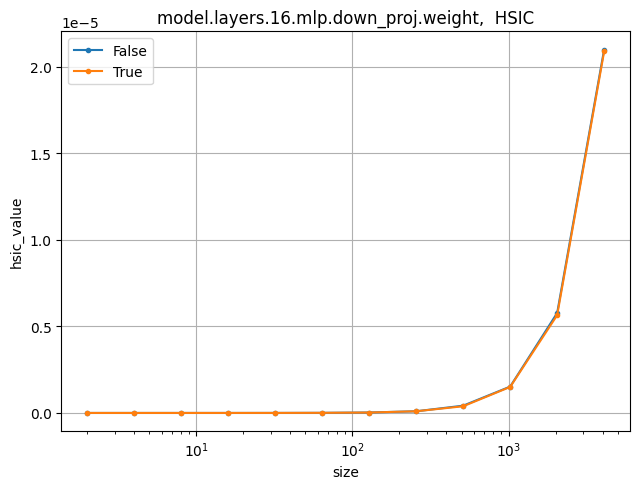

model.layers.17.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.000591751932354152, 0.00012156594076323663, 2.2518220438138246e-05, 4.735291918909529e-06, 1.1878051982119974e-06, 2.9937193999077714e-07, 7.334495313565536e-08, 1.613679511260085e-08, 3.6032533670049286e-09, 1.7061051471205968e-09, 3.2794133099107207e-10, 1.9532095651904786e-10]
[0.00036782323820282127, 5.75420497261178e-05, 2.3662623577311865e-05, 3.4224307941993904e-06, 8.362498361254804e-07, 2.9686802892886843e-07, 6.694998750675473e-08, 1.8367730694861333e-07, 3.948858511233281e-09, 1.6697402918898746e-09, 1.5191573634422146e-10, 7.752738892357318e-11]


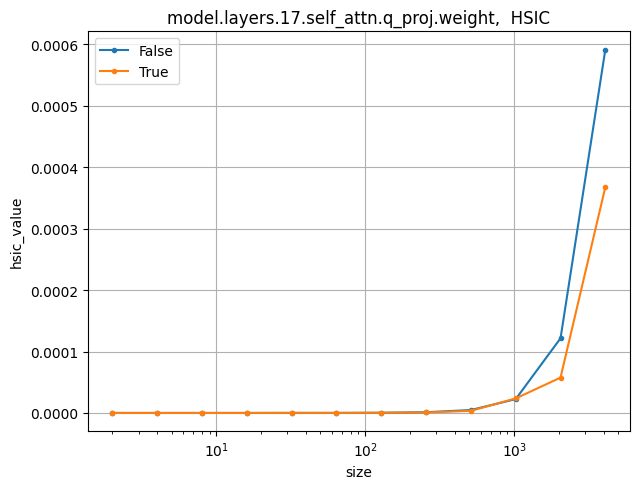

model.layers.17.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0017260263176377272, 0.0004639315112558453, 0.00010641982190493755, 2.2225791740610225e-05, 5.108731991602394e-06, 1.2742116479549083e-06, 3.2021140504433105e-07, 6.894794345073888e-08, 2.039859706772494e-08, 4.073060011852438e-09, 1.7018981802928358e-09, 9.358433945453237e-10]
[0.0010417233055986855, 0.00012925761898604382, 0.00010499733567709818, 2.5480483032409376e-05, 4.648256039077064e-06, 1.0948357336124885e-06, 2.6553468703121595e-07, 7.530336485059892e-08, 1.7484674440377666e-08, 5.765655611765636e-09, 1.23980381894561e-09, 2.215748232742231e-10]


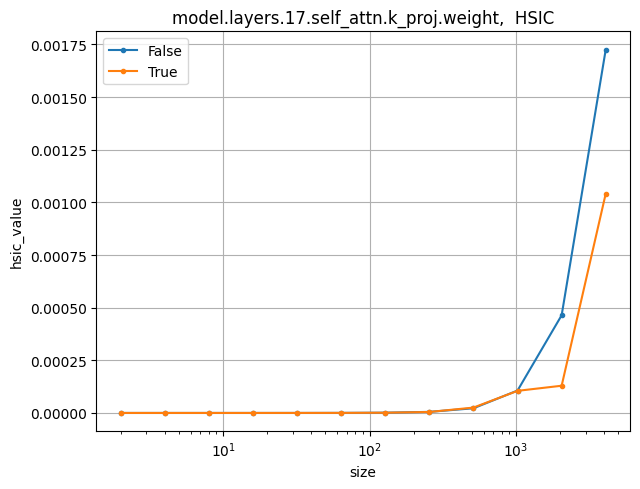

model.layers.17.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.819498706207907e-05, 3.957829557069449e-06, 1.0225705743515235e-06, 2.5962627285236775e-07, 6.457445018357505e-08, 1.6698433493450453e-08, 3.945339795060872e-09, 1.1380915827181936e-09, 2.847036354566372e-10, 3.275612348486705e-11, 1.1127022492659509e-11, 1.887922514144484e-13]
[2.7438491483178968e-05, 3.5822159897782095e-06, 1.0544249651554873e-06, 2.3400530129423147e-07, 6.322512032947269e-08, 1.6650248216693133e-08, 3.807108061551222e-09, 1.0410950674180287e-09, 1.9298364187438222e-10, 7.052237474939854e-11, 2.978554710985669e-11, 6.094699037556147e-12]


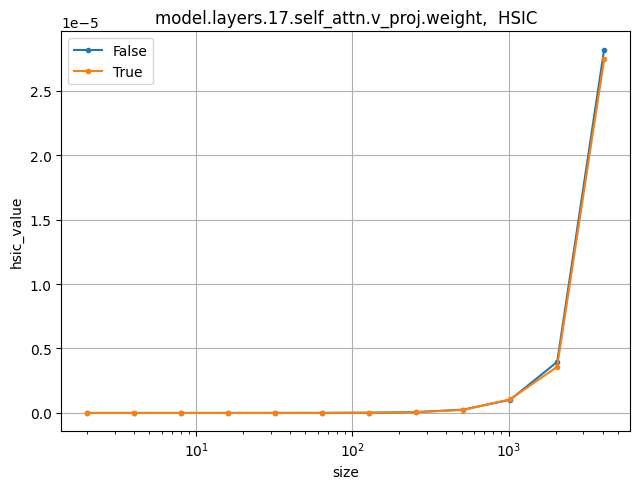

model.layers.17.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.6054047917508343e-05, 4.6828187473833415e-06, 1.173850313030917e-06, 5.525487995208907e-07, 8.403573189415147e-08, 2.8221363929063984e-08, 5.972850666489943e-09, 1.4101077335722682e-09, 4.3058821248841255e-10, 1.3133991073992445e-10, 6.3496258549985e-11, 2.723320378173589e-12]
[1.6476805405188386e-05, 6.167034516159385e-06, 1.2041156311157224e-06, 3.241236072381224e-07, 9.272762090699093e-08, 1.8771458312296608e-08, 4.818077570754814e-09, 1.4278127616470216e-09, 5.131849435039257e-10, 5.65811650261276e-11, 2.7387583162688667e-11, 1.793021448831416e-12]


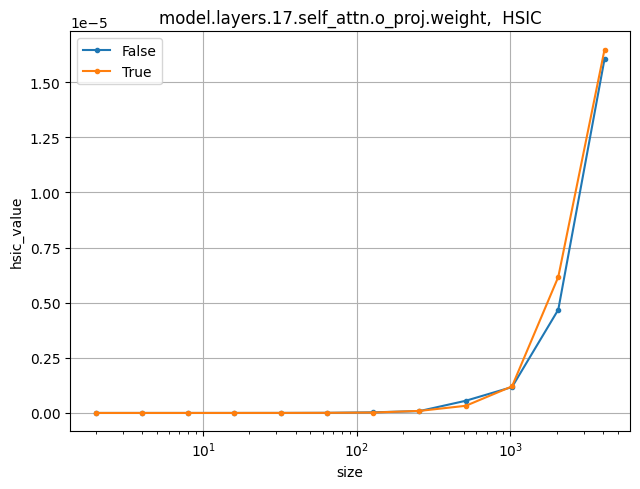

model.layers.17.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[9.913348477746944e-05, 2.501284013442787e-05, 6.102781919677509e-06, 1.5995023371763256e-06, 4.12409423945138e-07, 1.09061750985117e-07, 2.2577740472634967e-08, 5.484087545639543e-09, 1.3366367853044115e-09, 3.022117973204444e-10, 6.169177177146165e-11, 9.75588213756859e-13]
[5.49480303802069e-05, 1.8578008349633004e-05, 4.769404625288341e-06, 1.2184084634833258e-06, 3.133211415309542e-07, 7.872972937854322e-08, 1.9929422490378334e-08, 5.320378783600797e-09, 1.165410319035523e-09, 3.200875613661948e-10, 9.503789364401829e-11, 5.997564335675354e-12]


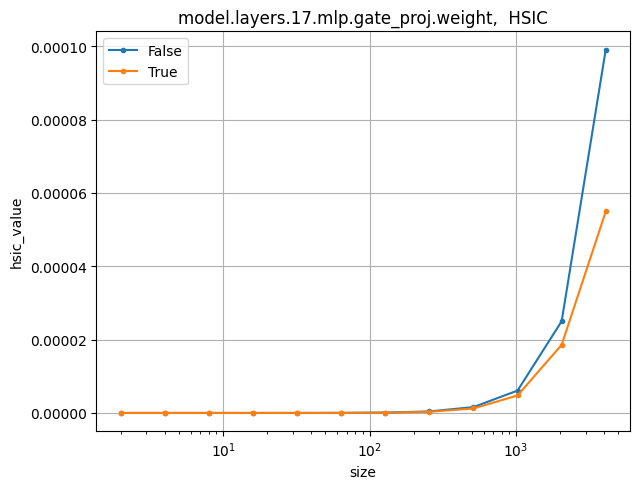

model.layers.17.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.2227582575802346e-05, 6.0061747245052725e-06, 1.5744335232052315e-06, 4.021570218825788e-07, 1.0159376381868151e-07, 2.5228288896776617e-08, 6.784050715950581e-09, 1.763604921681883e-09, 3.765165972307324e-10, 4.185360523985583e-11, 2.5899684938080114e-11, 1.3177089322444357e-11]
[2.0790280125615042e-05, 5.849399620807201e-06, 1.5492183523998025e-06, 3.9696290407874836e-07, 1.0130055379098512e-07, 2.489763401213493e-08, 6.5560506862926905e-09, 1.5292695556609527e-09, 2.4453585915297065e-10, 6.342499814533142e-11, 3.41300960116587e-11, 1.5246142238714432e-12]


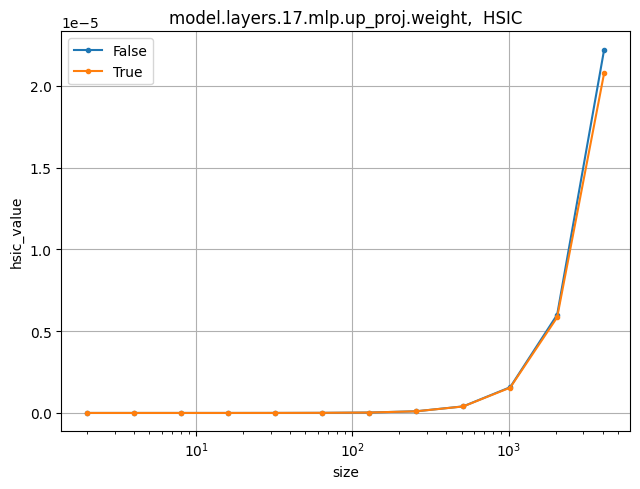

model.layers.17.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.04165325808098e-05, 5.725969512104039e-06, 1.50908543852206e-06, 3.9395231889069807e-07, 9.992355781250035e-08, 2.3945703148490295e-08, 6.980949555606424e-09, 1.4423170530240786e-09, 5.872710468583438e-10, 8.215529668911384e-11, 1.924296897343301e-11, 4.67414063374654e-12]
[2.0251245010776424e-05, 5.6342659723661395e-06, 1.4977039929603066e-06, 3.805682227994791e-07, 9.667470275611124e-08, 2.432602450855163e-08, 5.8539629529464194e-09, 1.493838577502717e-09, 4.419547752474066e-10, 1.0066319915291567e-10, 2.4114925843037698e-11, 2.4160742709485153e-12]


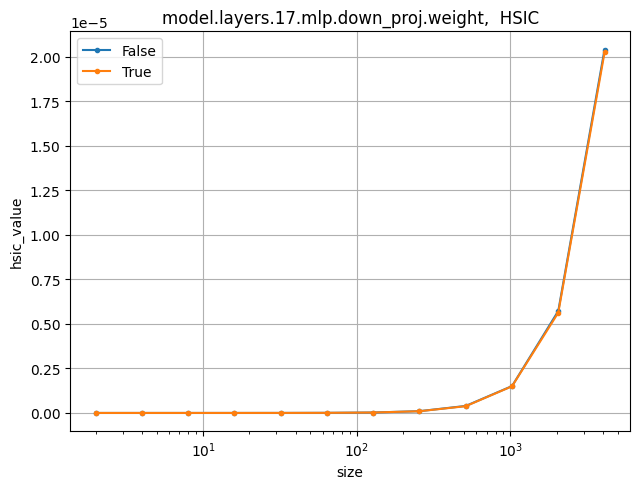

model.layers.18.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.00037852422251284456, 8.371166320807831e-05, 1.7978320902131263e-05, 4.075106448016841e-06, 9.603078060923258e-07, 2.589532625672025e-07, 5.82314621784048e-08, 1.501303969448274e-08, 3.6175830149343394e-09, 7.431268312197026e-10, 4.60134047841543e-10, 1.2921212948827907e-11]
[0.00022682601533789397, 5.1492354623189904e-05, 1.7358147278514185e-05, 3.1855636717916998e-06, 7.750953150042811e-07, 2.2895994470046484e-07, 5.7892524214770565e-08, 9.873239666186888e-08, 3.4371362858166616e-09, 1.1244879984507617e-09, 4.519320972289483e-11, 4.32503464575749e-11]


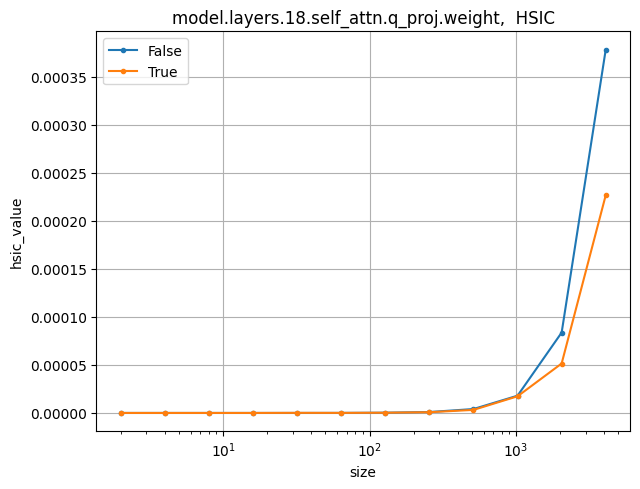

model.layers.18.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0016327977620050496, 0.0004231438495030109, 0.00010029523885237482, 2.2147037692514305e-05, 5.252765585030745e-06, 1.3074611972701048e-06, 3.1128341617454927e-07, 8.281403481192868e-08, 2.0770479042292458e-08, 3.812384666320003e-09, 1.1787951098698721e-09, 4.83537297175046e-12]
[0.0009784032141735746, 0.00013795763455410272, 9.907401940487713e-05, 2.761321349185735e-05, 4.857315481179165e-06, 1.2544682252220531e-06, 3.325962517861857e-07, 7.387828479930735e-08, 1.842993625335415e-08, 3.0107665656545115e-09, 3.0267540638327257e-10, 2.8204685048689955e-10]


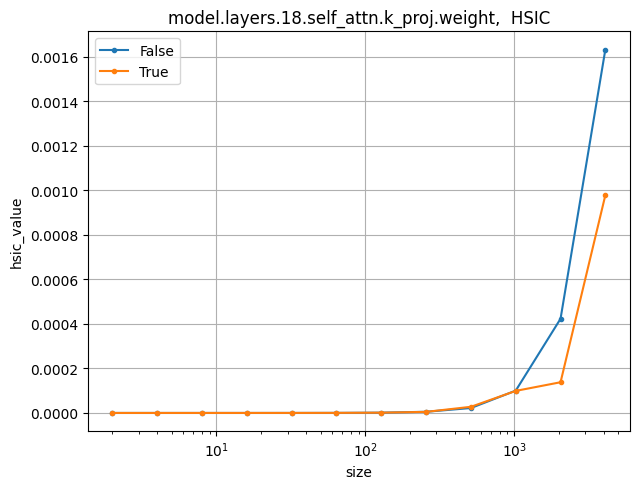

model.layers.18.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.1973710610726042e-05, 3.048628573433941e-06, 7.422943219978972e-07, 1.767435463126511e-07, 4.302685207814064e-08, 1.0915145995275888e-08, 2.6568880337722286e-09, 7.470538555864929e-10, 1.6054461193991225e-10, 4.24253318434624e-11, 3.6376184799626773e-12, 3.2024835797046836e-13]
[1.8450790331775923e-05, 2.401081004608839e-06, 7.558033752172836e-07, 2.1918577868272743e-07, 4.1527898782687236e-08, 1.0869546373546041e-08, 2.7201691539987986e-09, 5.114902176899114e-10, 1.4219706332470817e-10, 3.977459752811216e-11, 8.116204418165579e-12, 8.810589235850209e-12]


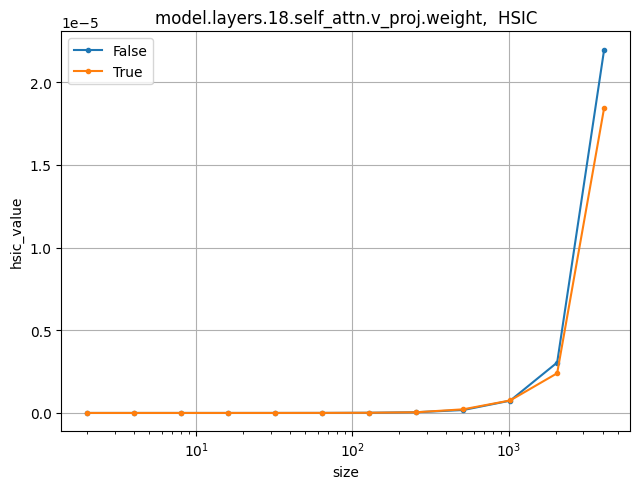

model.layers.18.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.628953070027051e-05, 4.809452806067521e-06, 1.1684380685096192e-06, 3.5917538407149345e-07, 1.2222293026323442e-07, 2.3344045914143786e-08, 5.66999208026656e-09, 1.416682982596637e-09, 6.256326347519292e-10, 8.830258225585039e-11, 2.1106956423632873e-11, 7.331898924662795e-14]
[1.4933310138168142e-05, 5.3984142672427715e-06, 1.2826279734873844e-06, 2.840321105092387e-07, 8.086287486357925e-08, 1.758464345574914e-08, 4.611491686866439e-09, 1.2100721851871828e-09, 2.6731141815246527e-10, 7.274637969410598e-11, 2.774154780828285e-11, 2.8772215745132307e-12]


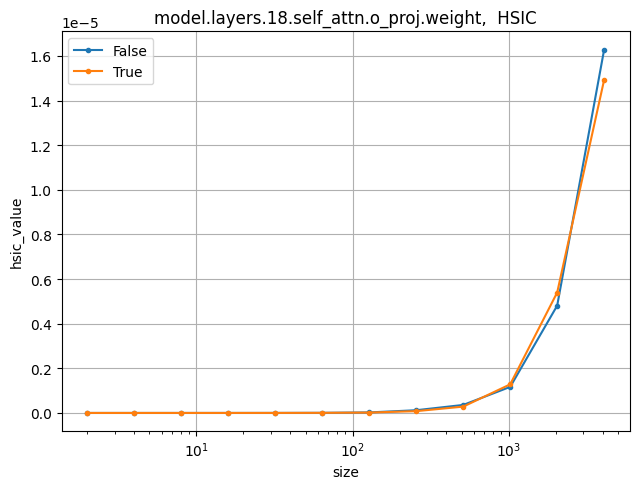

model.layers.18.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[7.921215520961344e-05, 2.3892925567352038e-05, 6.029482327133734e-06, 1.5609695620683478e-06, 3.8573699675202377e-07, 9.672751916924669e-08, 2.621717600566307e-08, 6.750883966578161e-09, 1.826746383814498e-09, 4.5315585716987937e-10, 4.5119678319794583e-10, 6.539595366285194e-12]
[5.557278556493584e-05, 1.8621082880275597e-05, 4.834644023351915e-06, 1.2371250500005495e-06, 3.086900194234603e-07, 7.94391963860185e-08, 2.161052499653396e-08, 5.080749585314151e-09, 1.6005968834048801e-09, 3.673878956096063e-10, 2.303760972121036e-10, 3.4921960413847485e-12]


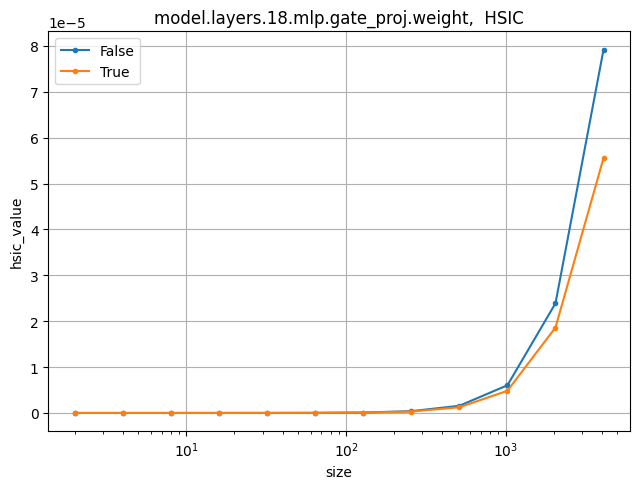

model.layers.18.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.150018297128882e-05, 5.87397288623393e-06, 1.5339581770532346e-06, 3.9228283350348636e-07, 1.0063649821332278e-07, 2.3824493097742987e-08, 6.4173326813810105e-09, 1.311892810426178e-09, 4.150864351819362e-10, 7.157747662046875e-11, 1.3725441910528387e-11, 1.7911546493312456e-13]
[2.033915689598019e-05, 5.728058178771046e-06, 1.493831529202573e-06, 3.8189110867402423e-07, 9.770718565786684e-08, 2.4361865748628276e-08, 6.787684753602512e-09, 1.4244408845322352e-09, 3.9801837040399694e-10, 7.893744289161418e-11, 7.994210183561726e-11, 2.7597238075036494e-12]


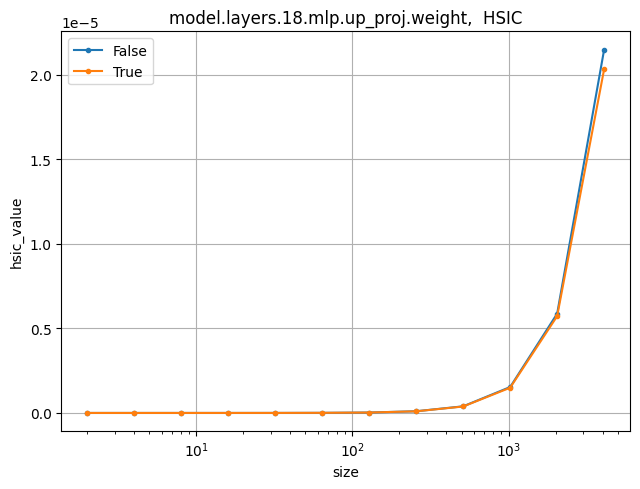

model.layers.18.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.0403942425437014e-05, 5.809930572199948e-06, 1.55856526978085e-06, 3.819753225009036e-07, 9.686628835717966e-08, 2.395670702918056e-08, 5.764731594929273e-09, 1.5148355303600207e-09, 4.018964917936771e-10, 9.334322350916149e-11, 5.4785476687813357e-11, 2.3131154200650347e-12]
[2.002422439609171e-05, 5.552974309149107e-06, 1.4624086001642287e-06, 3.759945525106343e-07, 9.375813458231652e-08, 2.4519364610894733e-08, 6.287846084018495e-09, 1.6027703456237684e-09, 3.815295745616386e-10, 1.0982309337868998e-10, 2.855495774430963e-12, 3.652198447138514e-12]


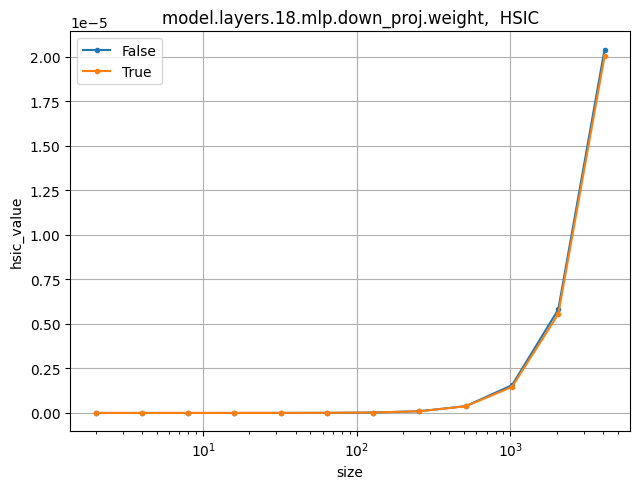

model.layers.19.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.00038355544725261634, 8.412512014099378e-05, 1.9207421549758097e-05, 4.212207005191719e-06, 9.566865358980426e-07, 2.5507890620497634e-07, 6.363565576960753e-08, 1.5730408673785715e-08, 3.610947564254685e-09, 7.745457839630526e-10, 5.79944307308803e-10, 6.822171463054482e-11]
[0.0002484970782624906, 4.711099135079543e-05, 1.868693843168286e-05, 3.1069773264641624e-06, 8.011692551216102e-07, 2.4679538280406624e-07, 5.9515302902845593e-08, 1.0224808687841603e-07, 3.737348622408186e-09, 7.188501404723989e-10, 1.0460742860158671e-10, 5.233993171402565e-12]


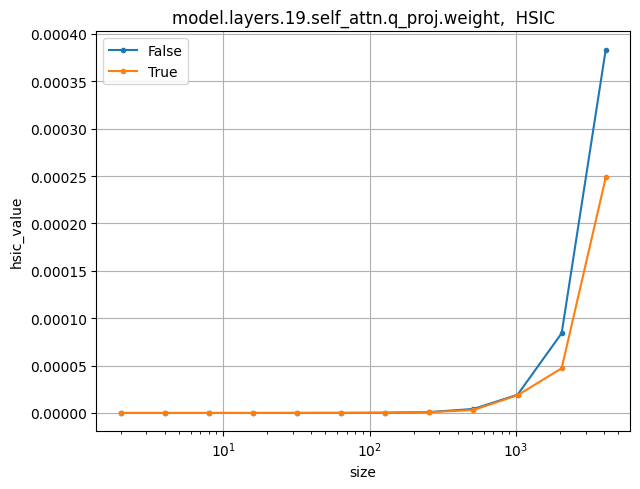

model.layers.19.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0012891693962463783, 0.0003344501959261368, 7.947234439574008e-05, 1.9278779089230884e-05, 4.672989567876537e-06, 1.1724260122297544e-06, 2.8294298045364414e-07, 8.242378159275694e-08, 2.3159640983454222e-08, 2.821717581384276e-09, 1.164282032631898e-09, 1.4637600183176764e-10]
[0.0007812666182369721, 0.0001240927352186085, 8.209937270640963e-05, 2.148423553788508e-05, 4.2152781807479565e-06, 1.0175753178001536e-06, 2.422360259822625e-07, 6.581265525094071e-08, 1.4950683658725993e-08, 5.43209466175827e-09, 2.9886422885539344e-10, 1.5654785964888654e-10]


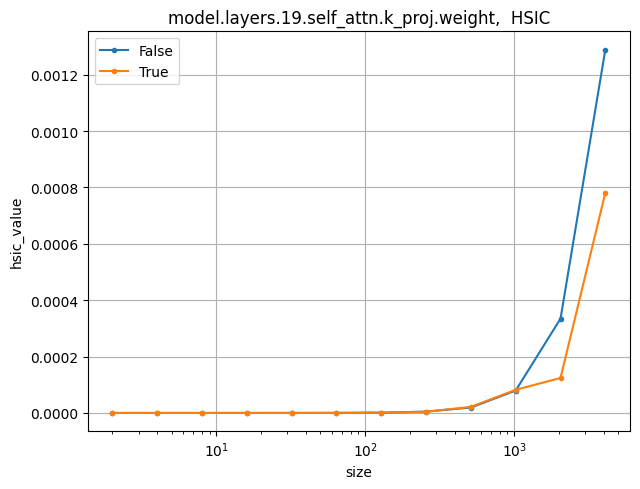

model.layers.19.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[2.645135132441218e-05, 3.6950336116525993e-06, 9.040111796552132e-07, 2.2735386997933262e-07, 5.651068666789538e-08, 1.4325576375820906e-08, 3.5447068257707095e-09, 8.725603909919336e-10, 2.686359530444491e-10, 4.591887130414136e-11, 7.057465905919076e-12, 3.43776605693259e-16]
[2.3731237888575047e-05, 2.9942059423213243e-06, 9.058913464932104e-07, 2.3629041202708204e-07, 4.9986850913566394e-08, 1.3392724512288166e-08, 3.154159349228705e-09, 9.747692882664241e-10, 2.1507270638553804e-10, 5.549811107113825e-11, 5.781132315712706e-12, 8.927069255313464e-12]


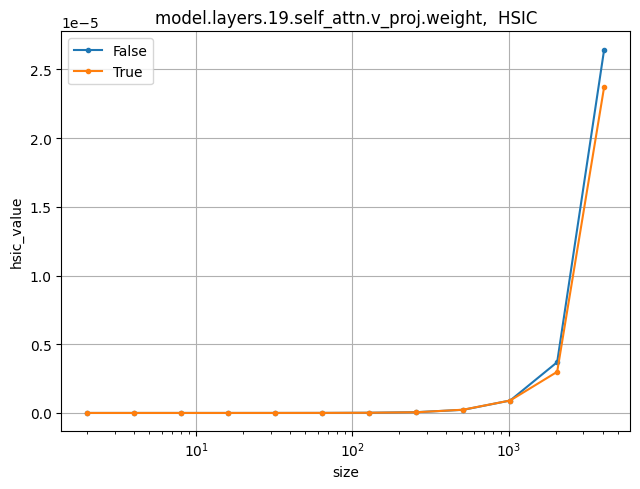

model.layers.19.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[1.8189125404364503e-05, 4.828290889193111e-06, 1.0805611202572563e-06, 4.5974127832324587e-07, 1.1297749514721627e-07, 2.6547879347311667e-08, 5.377480779854901e-09, 1.15749843149305e-09, 4.362386740963534e-10, 8.243510966598969e-11, 1.1792271682213462e-11, 6.805116672632375e-14]
[1.5613055781494283e-05, 5.325763955196687e-06, 1.0917719991444045e-06, 2.918557754440885e-07, 7.61980658984815e-08, 2.245475643272488e-08, 4.589489500808352e-09, 1.1028817250150735e-09, 4.1870536327448193e-10, 6.660692150093318e-11, 2.4921538887133457e-11, 7.83815184852347e-12]


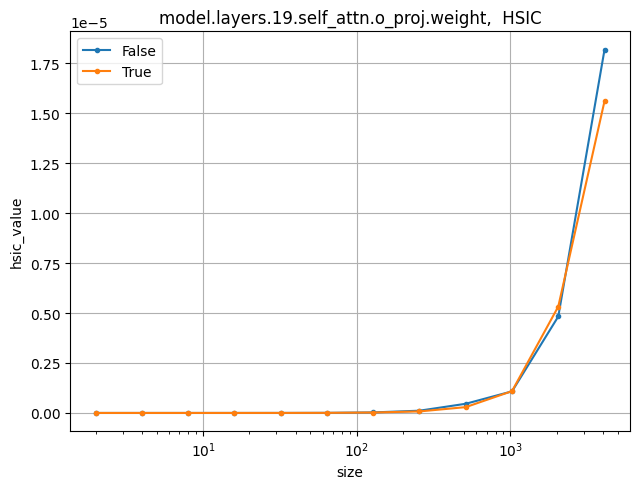

model.layers.19.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[8.76126599548769e-05, 2.433461957577713e-05, 6.0166006883131355e-06, 1.6041189754343874e-06, 3.6066827259209725e-07, 9.85165706447198e-08, 3.027211290984122e-08, 7.0294468142023286e-09, 1.6196494969854825e-09, 5.75220394402417e-10, 8.985352471741425e-11, 6.992117723557573e-11]
[5.542761397134512e-05, 1.9098089306920887e-05, 4.965858604921503e-06, 1.264153856411752e-06, 3.2934017500868723e-07, 7.92416499150626e-08, 2.070352930333059e-08, 5.069831610539189e-09, 1.35765470673992e-09, 2.225696574015504e-10, 8.000128470917706e-11, 3.268209738312466e-13]


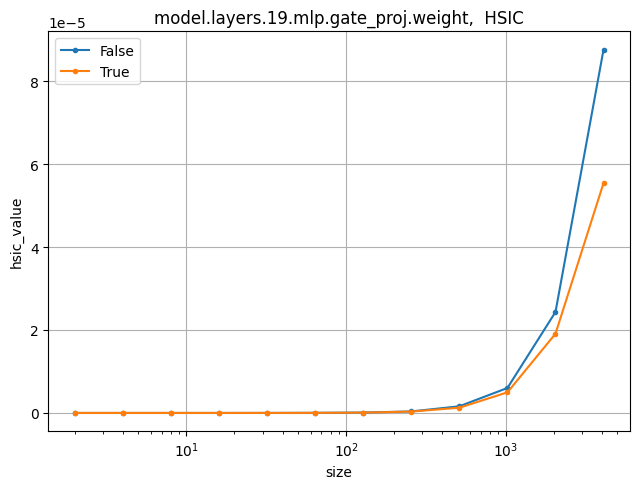

model.layers.19.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[2.101181407460776e-05, 5.792763224947927e-06, 1.5118602768176608e-06, 3.8424446082001417e-07, 9.7103809393091e-08, 2.5149024986181905e-08, 5.76440427913621e-09, 1.3374130658131214e-09, 4.559835619612668e-10, 1.0967989945277102e-10, 1.6191646704129588e-11, 1.0214123048890543e-12]
[2.0052129226083377e-05, 5.654194133971735e-06, 1.4821060712705708e-06, 3.7909698667638294e-07, 9.722814592674704e-08, 2.3594697199078597e-08, 5.702581627041158e-09, 1.4608169148402314e-09, 3.5591088346311877e-10, 1.2616608249633883e-10, 6.896484467574521e-12, 1.8257642518681738e-11]


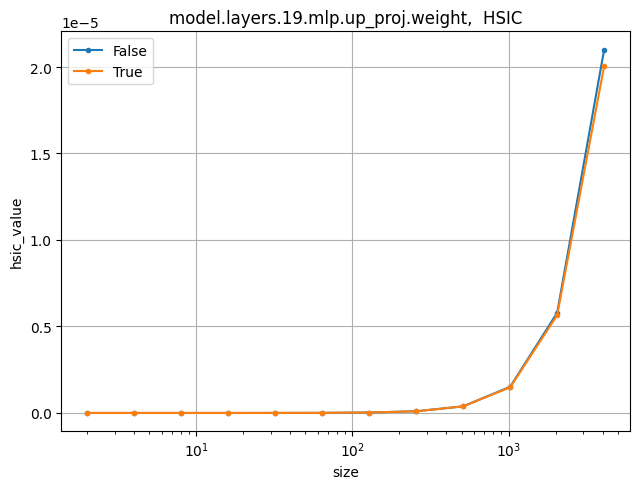

model.layers.19.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.007684165768084e-05, 5.631116737876274e-06, 1.560572026074885e-06, 3.8055641781836664e-07, 9.770963831064268e-08, 2.399733821756604e-08, 6.212509035291164e-09, 1.4311503553949326e-09, 4.502321581698326e-10, 1.3257062668061336e-10, 3.610520894395148e-11, 3.5389392965841006e-12]
[2.0026208389680567e-05, 5.526040226999131e-06, 1.4488400251507967e-06, 3.745036424663756e-07, 9.429426511499825e-08, 2.4166516856790818e-08, 5.416059953961788e-09, 1.497842882549445e-09, 3.6811915831252663e-10, 5.258797681057386e-11, 3.157643235191529e-11, 2.6855948700651156e-15]


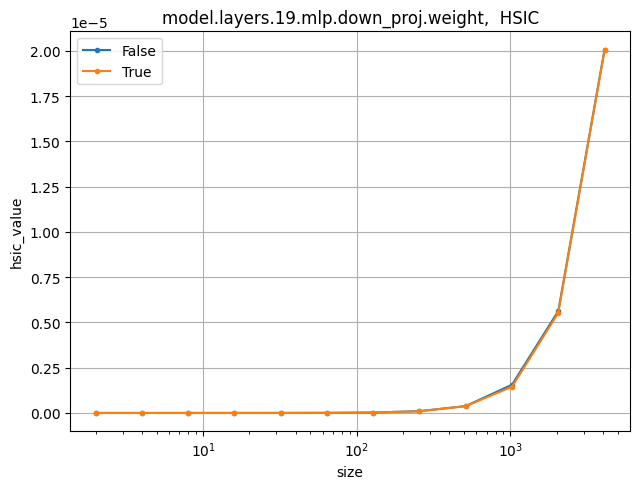

model.layers.30.self_attn.q_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[0.00027946076409561505, 6.094091158999819e-05, 1.2785744741840262e-05, 2.7056173053268585e-06, 6.292699512482087e-07, 1.4585430775814047e-07, 3.424196229362172e-08, 9.624667790740433e-09, 2.108821351210756e-09, 3.64177501085283e-10, 1.3021616213676536e-10, 4.85385722741025e-12]
[0.00013763732712939939, 4.965143830239175e-05, 1.2504250962002326e-05, 1.8602121395090887e-06, 4.415860850740224e-07, 1.4389727646074453e-07, 3.1531306016664385e-08, 7.223510377505483e-08, 1.572995841913144e-09, 3.859248361158342e-10, 6.983788562267371e-11, 9.254323898911865e-12]


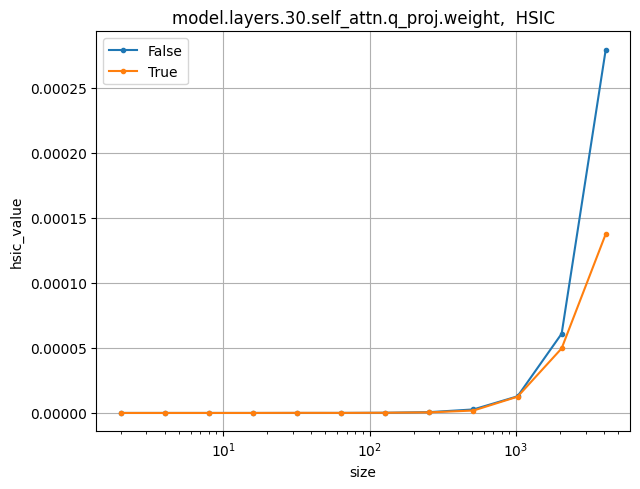

model.layers.30.self_attn.k_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.0008898843395006849, 0.00019582724812108976, 4.464425045690652e-05, 1.0157032746778475e-05, 2.2954971285867148e-06, 5.556038346571943e-07, 1.217363845790125e-07, 3.220105592581646e-08, 8.458434018263413e-09, 2.848411819764073e-09, 3.1541906198441103e-10, 8.889741809306041e-12]
[0.0004953079445228516, 6.621554492258038e-05, 4.328355332579143e-05, 1.4093222197813592e-05, 1.923279510739226e-06, 4.808001685741103e-07, 1.638722214430897e-07, 2.975155474734475e-08, 5.72277458723069e-09, 3.1981315678121484e-09, 5.671849699158009e-10, 1.0789712674912062e-09]


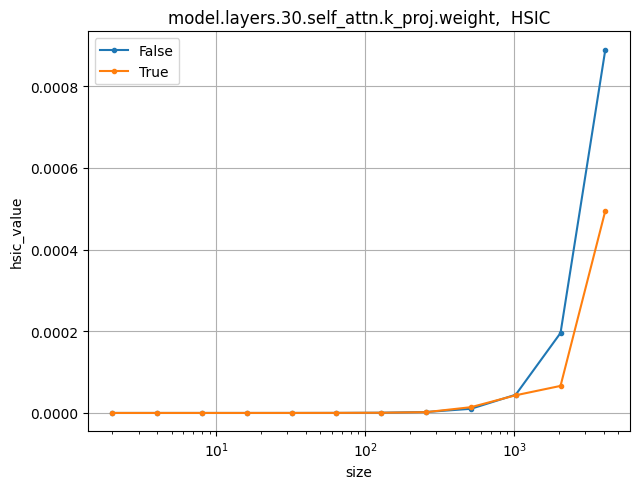

model.layers.30.self_attn.v_proj.weight torch.Size([1024, 4096])
Transpose : False
Transpose : True
[0.00024613199582255215, 4.357703384809412e-05, 1.1885723502087414e-05, 2.9686543007969067e-06, 7.792774106444154e-07, 2.018881439347296e-07, 4.809163931907511e-08, 1.2226453561693863e-08, 2.673255295268043e-09, 1.1755710739466877e-09, 1.052091401740118e-10, 1.5809597417532126e-10]
[0.00022190405285525485, 3.4640479843011754e-05, 1.1660159220698251e-05, 2.4872362736143224e-06, 7.244402137761999e-07, 1.8845167176655041e-07, 4.157473656070416e-08, 1.41453229147364e-08, 2.3690835230955864e-09, 4.109714659649064e-10, 1.7130147598103894e-10, 6.603114047289067e-11]


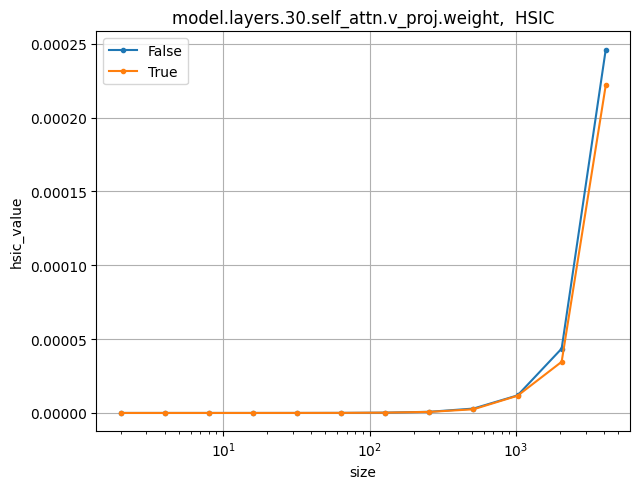

model.layers.30.self_attn.o_proj.weight torch.Size([4096, 4096])
Transpose : False
Transpose : True
[4.6293352511528274e-05, 1.1909579106191073e-05, 3.441749463906339e-06, 1.31870466636383e-06, 2.9433543997811617e-07, 1.0848580888406248e-07, 1.575564655048807e-08, 3.400500970718546e-09, 8.180006028374487e-10, 5.443800085620831e-10, 1.5296999588160995e-11, 1.506271409950995e-12]
[4.064257281419469e-05, 1.485813664143602e-05, 3.7937825664948338e-06, 8.756891800906797e-07, 2.3086265253430804e-07, 5.631133691458001e-08, 1.3060301951513048e-08, 3.1786066229883813e-09, 1.3111517804665278e-09, 4.362846498767042e-10, 3.2783820740576874e-11, 8.589196329256896e-12]


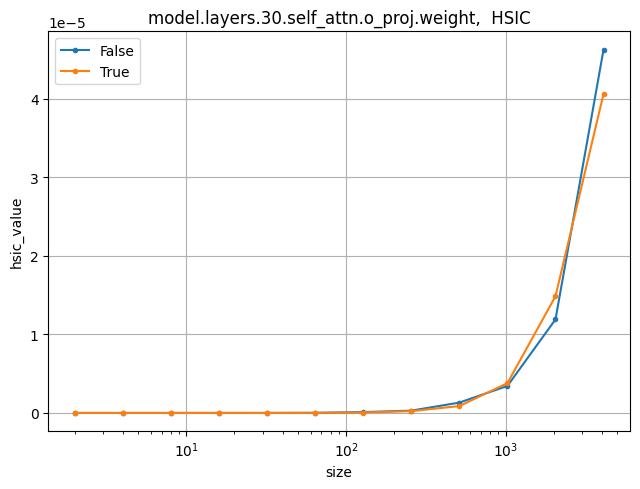

model.layers.30.mlp.gate_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[0.00020139076027348178, 5.3559558387821766e-05, 9.83296259580819e-06, 2.4411099779892437e-06, 5.625418579491105e-07, 1.5159774358606887e-07, 3.516596261848785e-08, 8.376245138901115e-09, 1.7904031908493903e-09, 9.731602588091214e-10, 3.890607960018596e-11, 1.897687080926439e-11]
[6.464160221472116e-05, 2.29328292956846e-05, 6.254221297589908e-06, 1.621962660927219e-06, 4.101148463019442e-07, 1.0675966133915547e-07, 2.6050118017370068e-08, 5.535064318458678e-09, 1.8707864247232634e-09, 6.56442634799628e-10, 3.962861811946622e-11, 1.6779273443070344e-11]


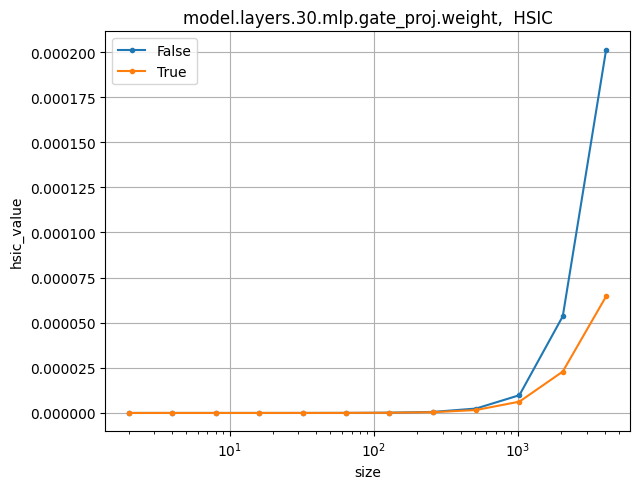

model.layers.30.mlp.up_proj.weight torch.Size([14336, 4096])
Transpose : False
Transpose : True
[4.076971331679757e-05, 1.0604310496811183e-05, 2.6454079449640346e-06, 6.552215141903009e-07, 1.6425455098418197e-07, 3.95569647642779e-08, 1.0184131920640098e-08, 2.7958669921159774e-09, 6.789227436702697e-10, 2.1434872447452633e-10, 2.5215182372538446e-11, 1.2822326499302165e-12]
[3.0404049573792346e-05, 8.96820850488834e-06, 2.3781322212479452e-06, 6.134295939440488e-07, 1.5528012214087443e-07, 3.9607092985671635e-08, 9.856434898888776e-09, 3.0001468988044383e-09, 5.139325851237148e-10, 1.5394395453889972e-10, 1.8103626391513373e-11, 1.1654922847454715e-11]


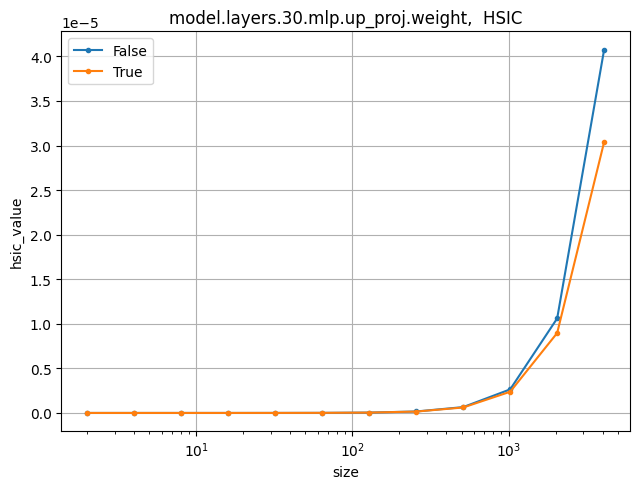

model.layers.30.mlp.down_proj.weight torch.Size([4096, 14336])
Transpose : False
Transpose : True
[2.7467389804456813e-05, 7.797692489530548e-06, 2.097804225203374e-06, 5.349652508971559e-07, 1.3709999232238188e-07, 3.497372427743592e-08, 8.480668633434725e-09, 2.014728345436915e-09, 5.802778230235719e-10, 1.6041917032909068e-10, 1.79599081393204e-11, 2.954597102617359e-11]
[2.722773935642261e-05, 7.705082709560641e-06, 2.063848508778405e-06, 5.34754809868391e-07, 1.352745228385554e-07, 3.488596014891466e-08, 8.776080965412617e-09, 2.2482410548962156e-09, 6.782364541763147e-10, 1.4873054442633674e-10, 1.9902800858795324e-11, 2.9688195636262345e-13]


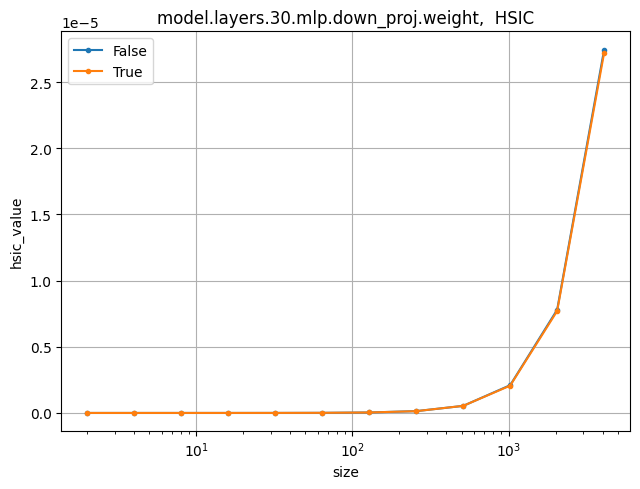

In [13]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
# HSIC 계산 함수
def hsic(X, Y, sigma=1.0):
    K = rbf_kernel(X, X, gamma=1 / (2 * sigma**2))  # X의 RBF 커널
    L = rbf_kernel(Y, Y, gamma=1 / (2 * sigma**2))  # Y의 RBF 커널
    n = K.shape[0]
    H = np.eye(n) - (1/n) * np.ones((n, n))
    
    # HSIC 계산
    HSIC_value = np.trace(K @ H @ L @ H) / (n - 1)**2
    return HSIC_value

# 샘플 데이터 생성
# np.random.seed(0)
# X = np.random.rand(1000, 50)  # 50차원 데이터
# Y = np.random.rand(1000, 50)  # 독립적인 50차원 데이터

# # HSIC 계산
# X = X[:10000]
# Y = Y[:10000]
# hsic_value = hsic(X, Y, sigma=1.0)
# print(f"HSIC Value: {hsic_value:.4f}")

# # 독립 여부 판단
# if hsic_value < 1e-3:  # Threshold 설정
#     print("Variables are likely independent.")
# else:
#     print("Variables are dependent.")
import dcor
import numpy as np

# 샘플 데이터 생성
plot_data = {}
dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]

for k, v in state_dict.items():
    if 'layers.0' in k or 'layers.1' in k or 'layers.10' in k or 'layers.30' in k:
        if 'layernorm' in k: continue
        print(k, v.shape)
        for transpose in [False, True]:
            np.random.seed(1)
            print(f'Transpose : {transpose}')
            plot_data[f'{transpose}'] = []
            for dim in dims:
                # print(f'#### chunk size : {dim} ####')
                if transpose:
                    v = v.T
                v = v.reshape(-1, dim)
                num_samples = 2000
                indices = torch.randperm(v.shape[0])[:num_samples]  # 무작위로 인덱스 선택
                W = v[indices]

                d = W.shape[-1] // 2
                tensor_split = torch.split(W, d, dim=1)  # dim=1에서 64씩 나눔
                
                X = tensor_split[0]  # 첫 번째 (-1, 64)
                Y = tensor_split[1]  # 두 번째 (-1, 64)
                
                indices = torch.randperm(X.shape[0])
                X = X[indices]
                Y = Y[indices]
                # print(X.shape, Y.shape)

                hsic_value = hsic(X, Y, sigma=1.0)
                # print(f"HSIC Value: {hsic_value:.4f}")
                plot_data[f'{transpose}'].append(hsic_value)

                    
        import matplotlib.pyplot as plt
        dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]
        plt.figure(figsize=(6.5, 5))
        for l, v in plot_data.items():
            print(v)
            plt.plot(dims, v, marker='o', markersize = 3, linestyle='-', label=l)
            
            
        plt.title(f'{k},  HSIC')
        plt.xlabel('size')
        plt.ylabel('hsic_value')
        plt.legend()
        plt.grid(True)
        plt.xscale('log')

        plt.tight_layout()
        plt.show()

3. Permutation Test + Distance Correlation

model.layers.0.self_attn.q_proj.weight torch.Size([4096, 4096])


/home/jgryu/miniconda3/envs/Wcomp/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


model.layers.0.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


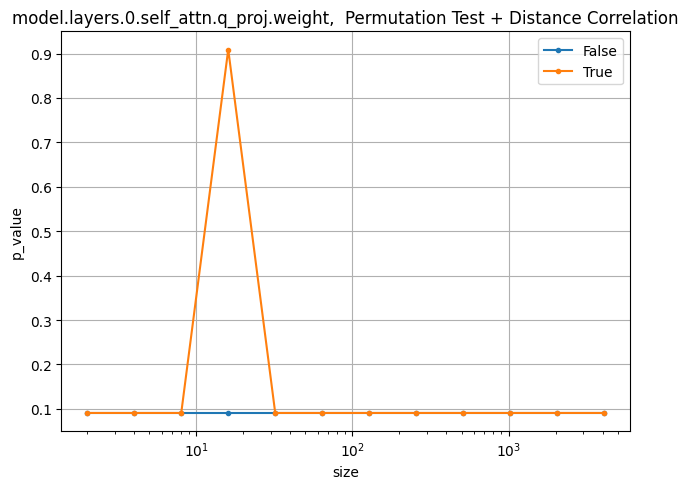

model.layers.0.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


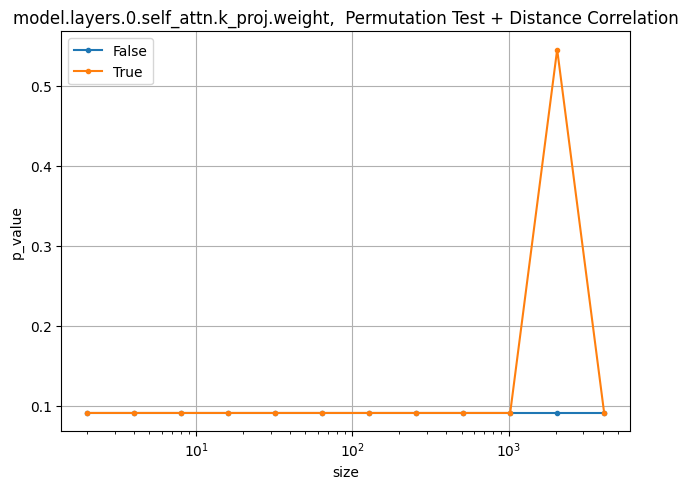

model.layers.0.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.18181818181818182, 0.2727272727272727, 0.6363636363636364, 0.09090909090909091]


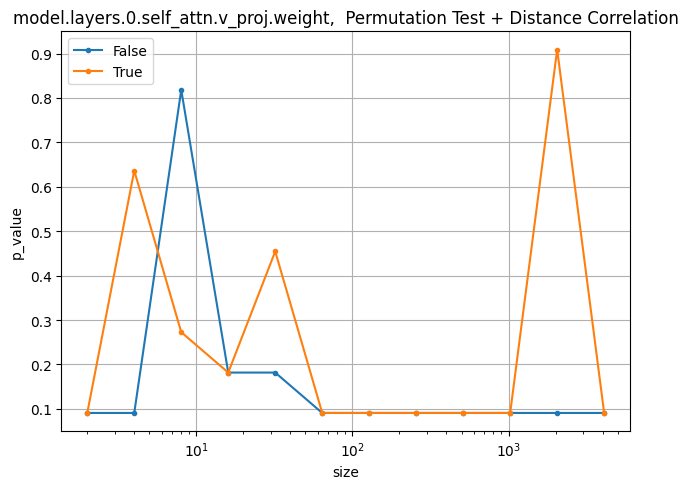

model.layers.0.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.0.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


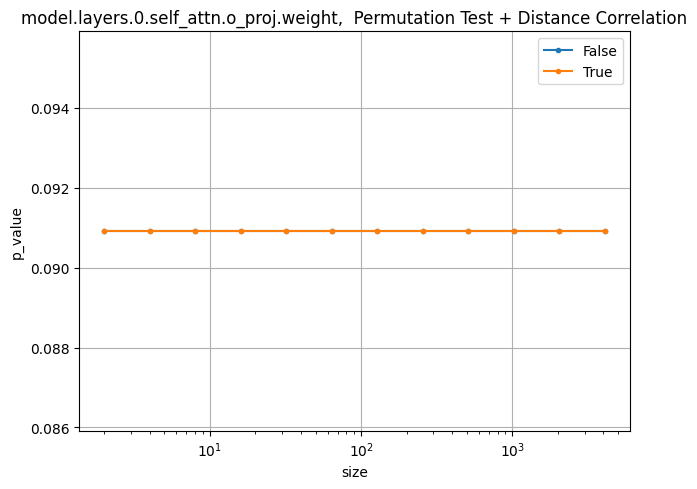

model.layers.0.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.45454545454545453, 0.9090909090909091, 0.36363636363636365, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.18181818181818182, 0.45454545454545453, 0.36363636363636365, 0.5454545454545454, 0.45454545454545453, 0.45454545454545453, 0.7272727272727273, 0.9090909090909091]


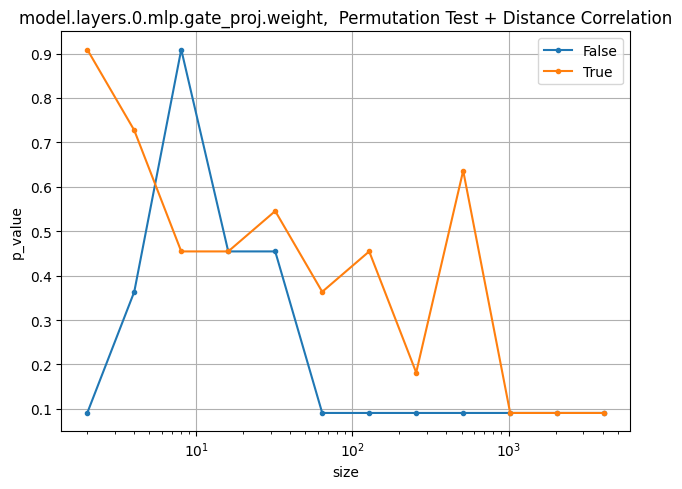

model.layers.0.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 1.0, 0.09090909090909091, 0.8181818181818182, 0.7272727272727273, 0.7272727272727273, 0.6363636363636364, 0.18181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.8181818181818182, 0.7272727272727273, 0.7272727272727273, 0.8181818181818182, 0.09090909090909091, 0.5454545454545454, 0.18181818181818182]


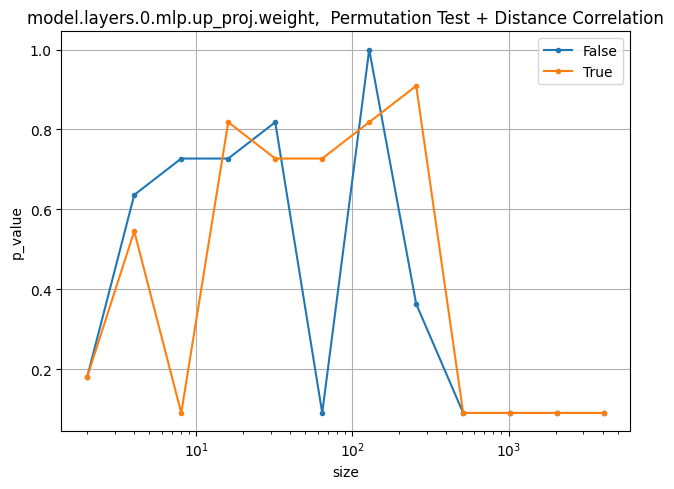

model.layers.0.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.0.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.8181818181818182, 0.7272727272727273, 0.18181818181818182, 0.6363636363636364, 0.2727272727272727]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.45454545454545453, 0.7272727272727273, 0.6363636363636364, 0.6363636363636364, 0.5454545454545454, 1.0, 0.6363636363636364, 0.9090909090909091]


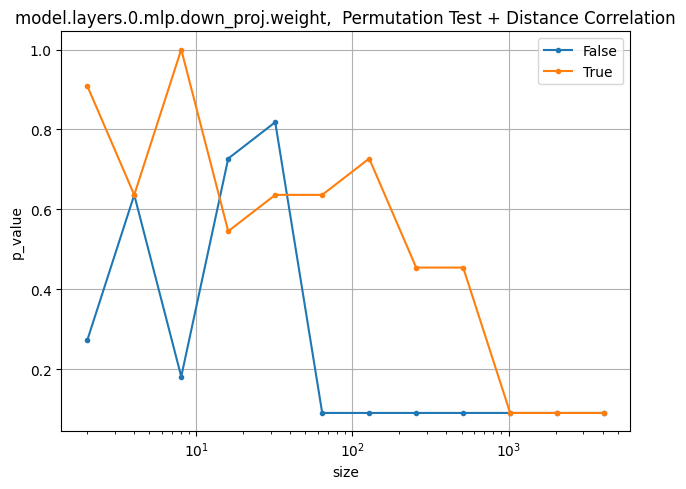

model.layers.1.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.1.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


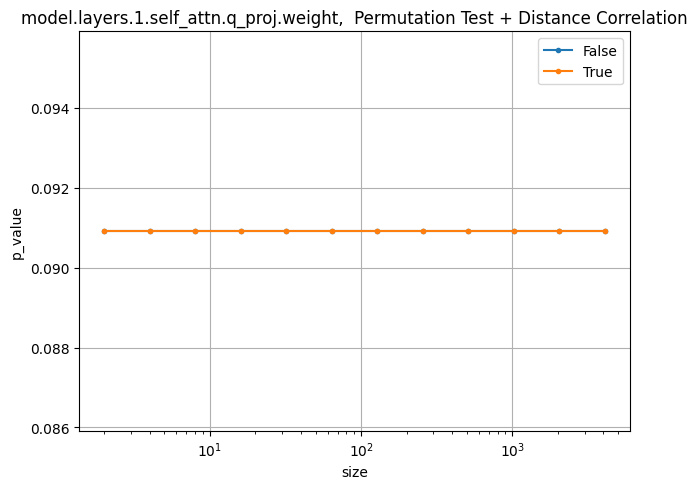

model.layers.1.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


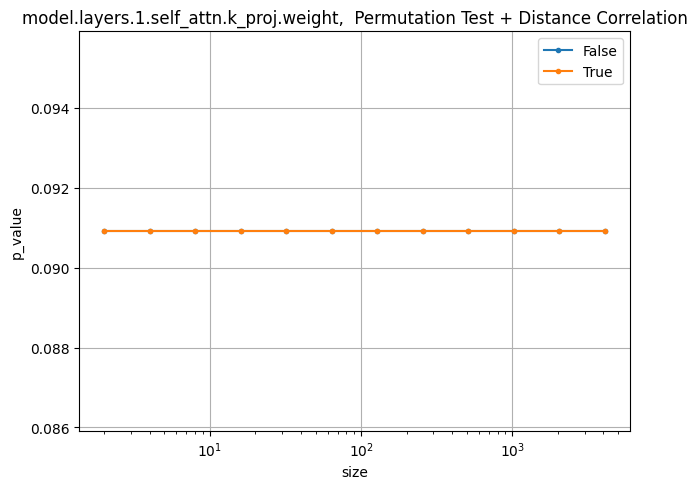

model.layers.1.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.7272727272727273, 0.6363636363636364, 0.6363636363636364]
[0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182]


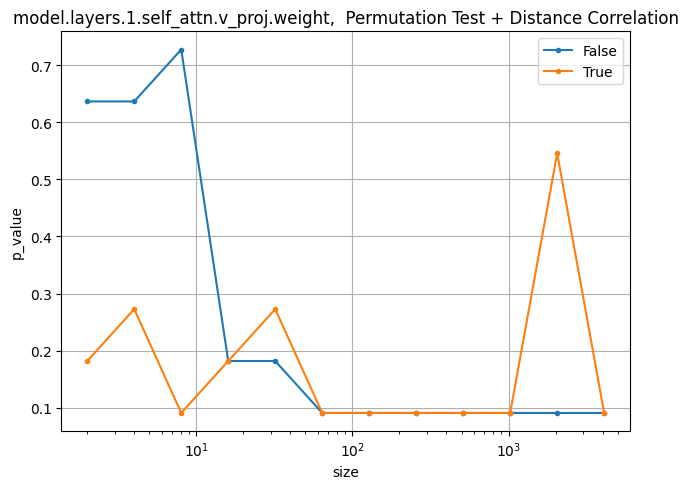

model.layers.1.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.1.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.7272727272727273]
[0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182]


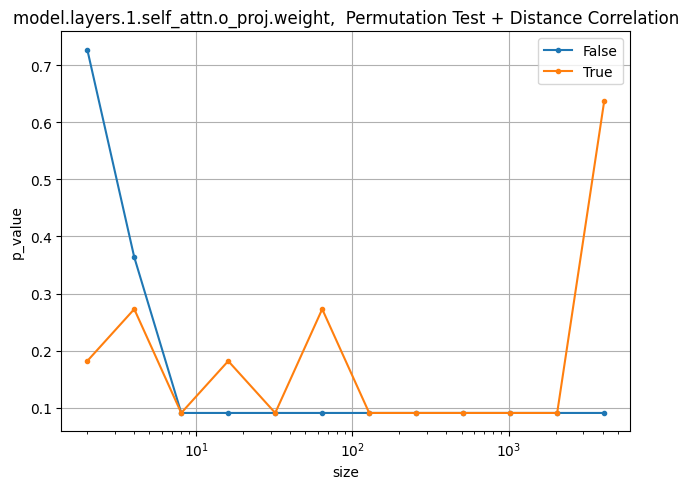

model.layers.1.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.1.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.2727272727272727, 0.36363636363636365, 0.2727272727272727, 0.36363636363636365, 0.18181818181818182, 0.7272727272727273]
[0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.45454545454545453, 0.18181818181818182, 0.7272727272727273, 0.9090909090909091, 0.45454545454545453, 0.5454545454545454, 0.9090909090909091, 1.0]


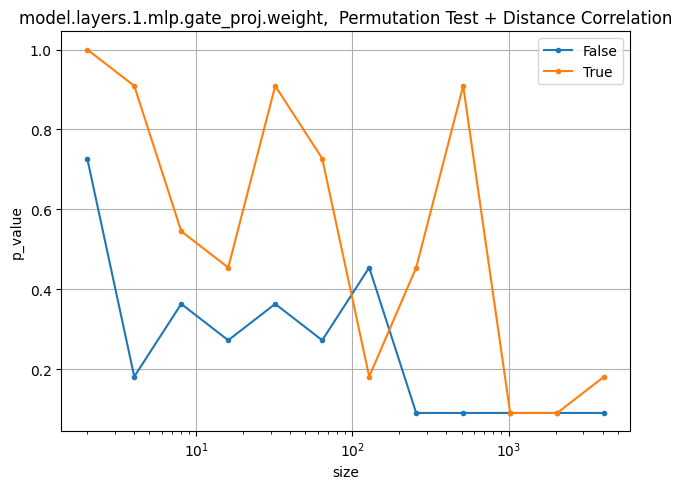

model.layers.1.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.1.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 1.0, 0.7272727272727273, 0.7272727272727273, 0.18181818181818182]
[1.0, 0.09090909090909091, 0.6363636363636364, 0.36363636363636365, 0.6363636363636364, 0.45454545454545453, 0.09090909090909091, 0.9090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


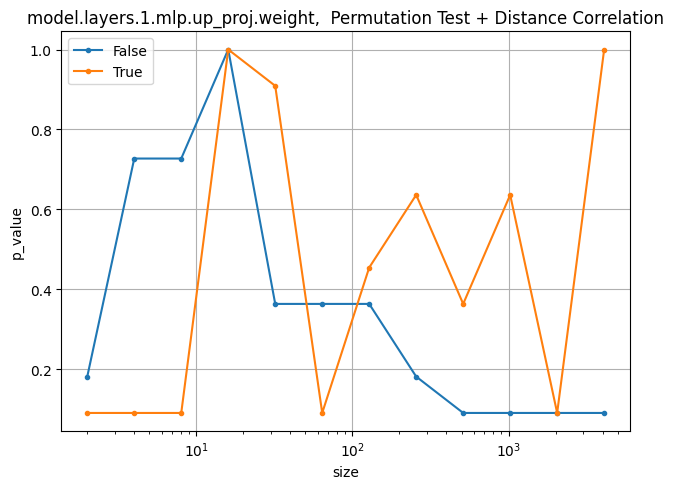

model.layers.1.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.1.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.9090909090909091, 0.2727272727272727, 0.6363636363636364, 0.9090909090909091, 0.18181818181818182, 0.09090909090909091, 0.45454545454545453]
[0.09090909090909091, 0.36363636363636365, 0.8181818181818182, 0.45454545454545453, 0.9090909090909091, 0.6363636363636364, 0.5454545454545454, 0.09090909090909091, 1.0, 1.0, 0.9090909090909091, 0.7272727272727273]


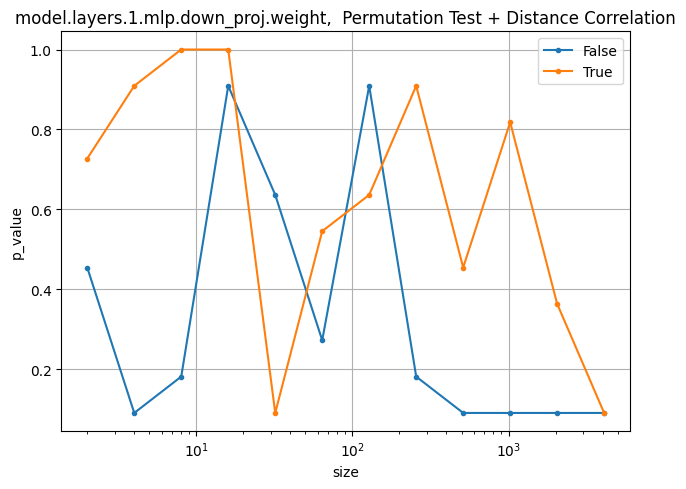

model.layers.10.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.10.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


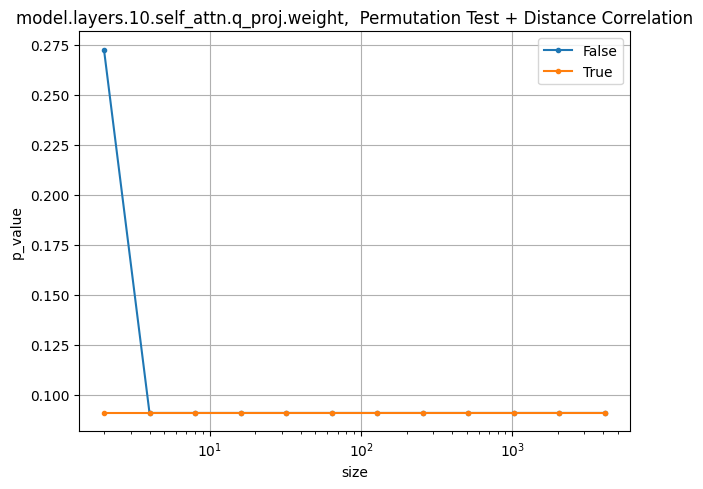

model.layers.10.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.10.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.7272727272727273, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


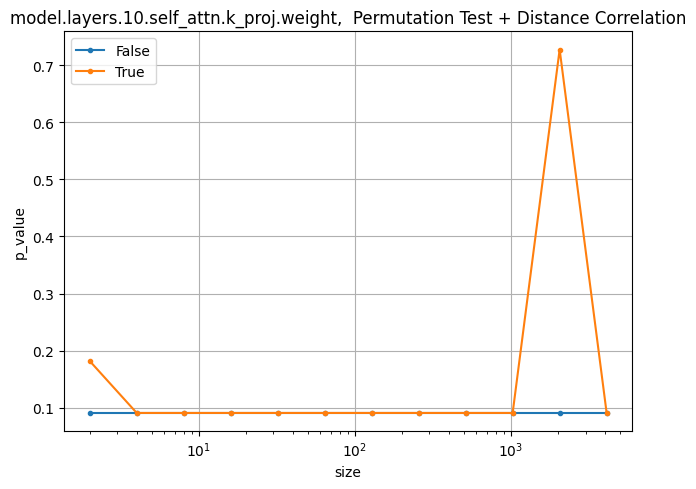

model.layers.10.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.10.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365]
[0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182]


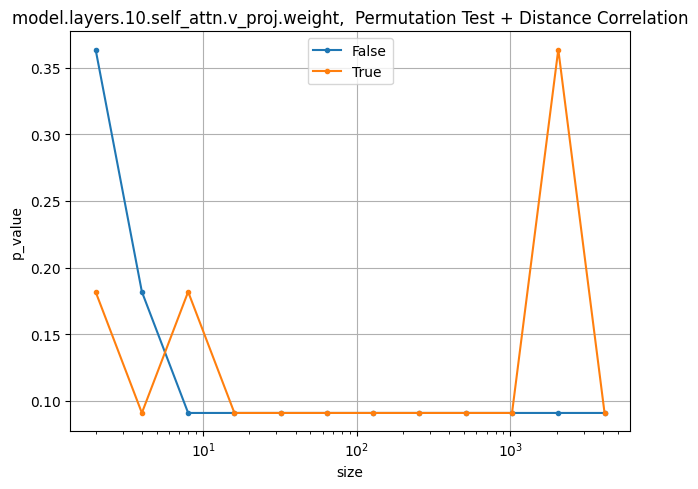

model.layers.10.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.10.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727]
[0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453]


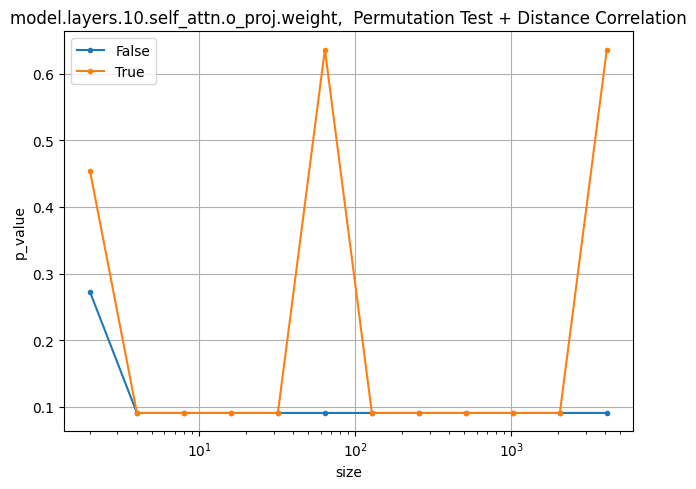

model.layers.10.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.10.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.5454545454545454, 0.6363636363636364, 0.8181818181818182, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.36363636363636365, 0.7272727272727273]


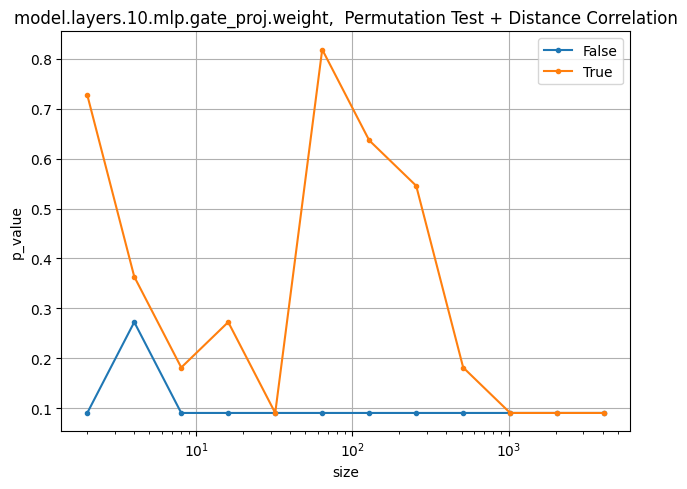

model.layers.10.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.10.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 0.2727272727272727, 0.5454545454545454, 0.7272727272727273, 0.45454545454545453]
[0.9090909090909091, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.36363636363636365, 0.8181818181818182, 0.18181818181818182, 0.2727272727272727, 0.9090909090909091, 0.8181818181818182, 0.9090909090909091, 0.45454545454545453]


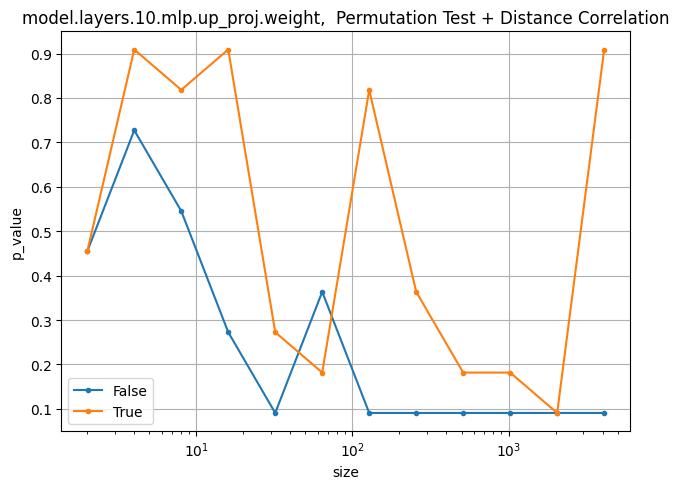

model.layers.10.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.10.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.36363636363636365]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.7272727272727273, 1.0, 0.5454545454545454, 0.9090909090909091, 0.18181818181818182, 1.0, 1.0, 0.2727272727272727]


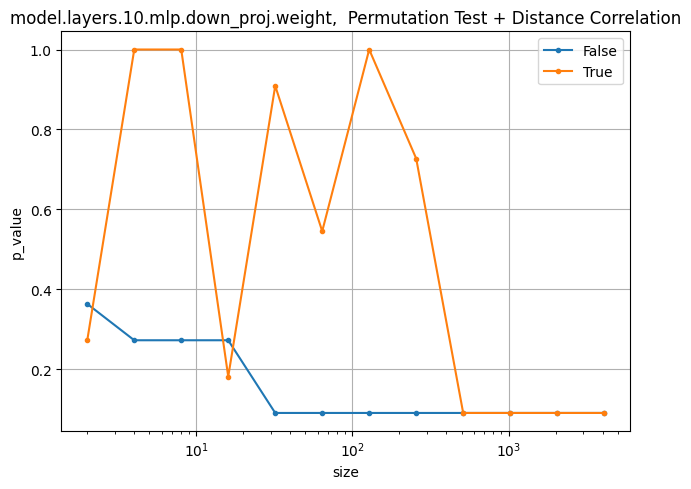

model.layers.11.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.11.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


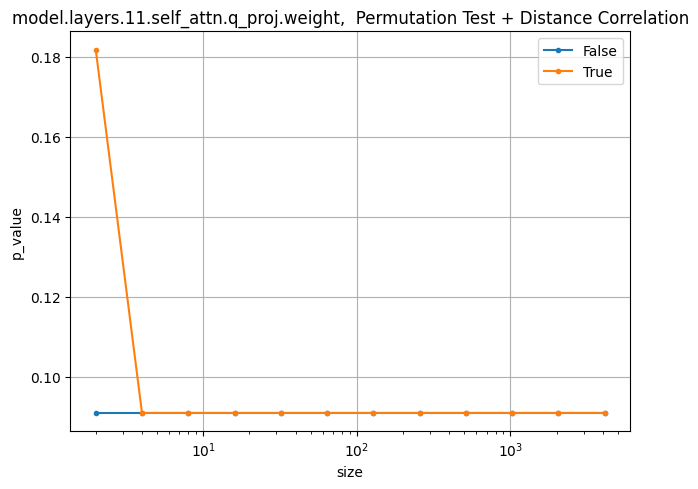

model.layers.11.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.11.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453]
[0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


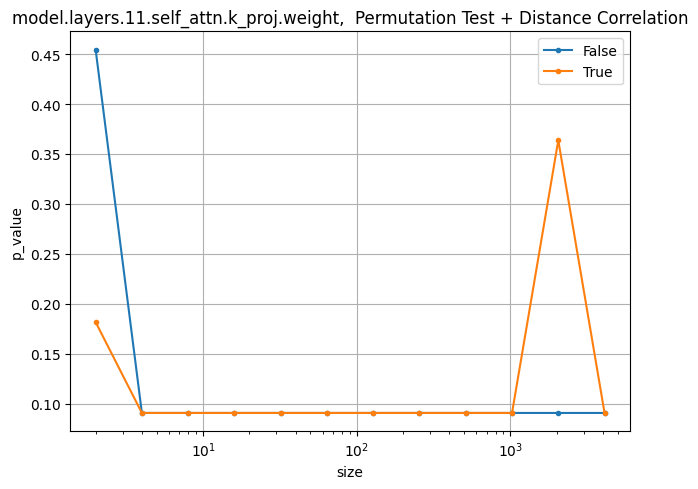

model.layers.11.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.11.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.5454545454545454, 0.7272727272727273, 0.18181818181818182, 0.6363636363636364, 1.0]
[0.09090909090909091, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.6363636363636364, 0.36363636363636365, 0.6363636363636364, 0.36363636363636365]


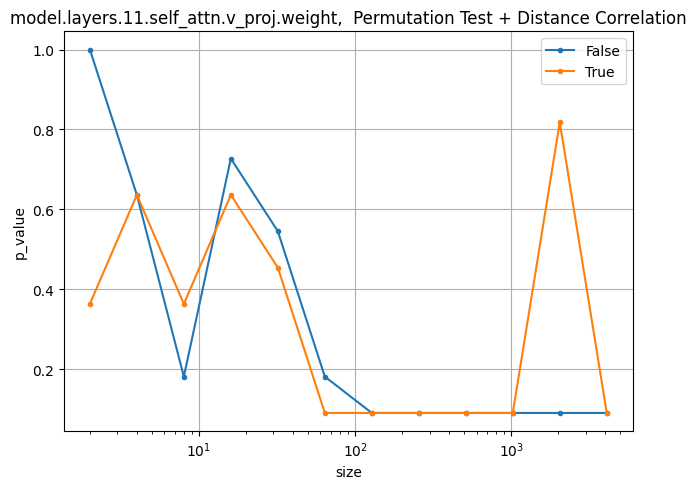

model.layers.11.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.11.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091]
[0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453]


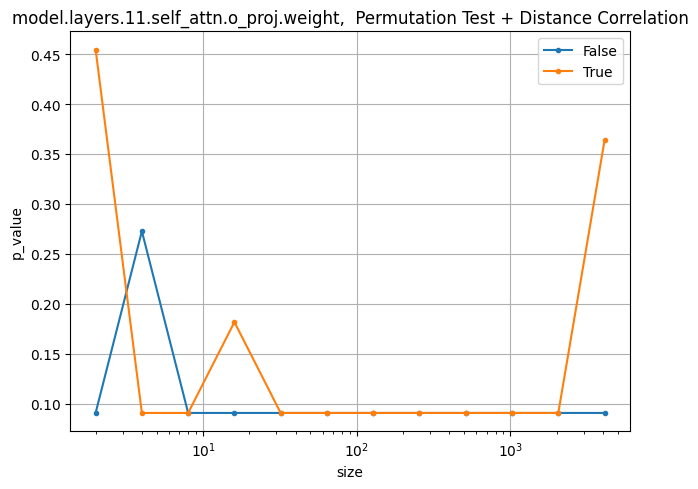

model.layers.11.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.11.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 1.0, 0.7272727272727273, 0.09090909090909091, 1.0]


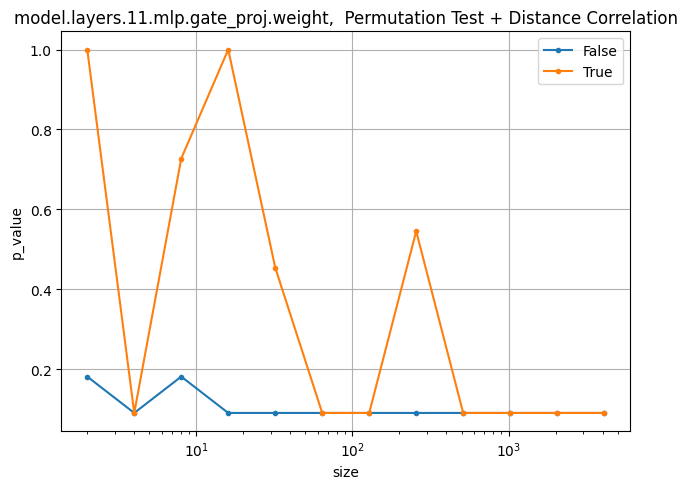

model.layers.11.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.11.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 1.0, 0.09090909090909091, 0.7272727272727273, 0.45454545454545453, 0.09090909090909091, 0.8181818181818182]
[0.9090909090909091, 0.09090909090909091, 0.18181818181818182, 0.7272727272727273, 0.6363636363636364, 0.2727272727272727, 0.7272727272727273, 0.45454545454545453, 1.0, 0.9090909090909091, 0.45454545454545453, 0.2727272727272727]


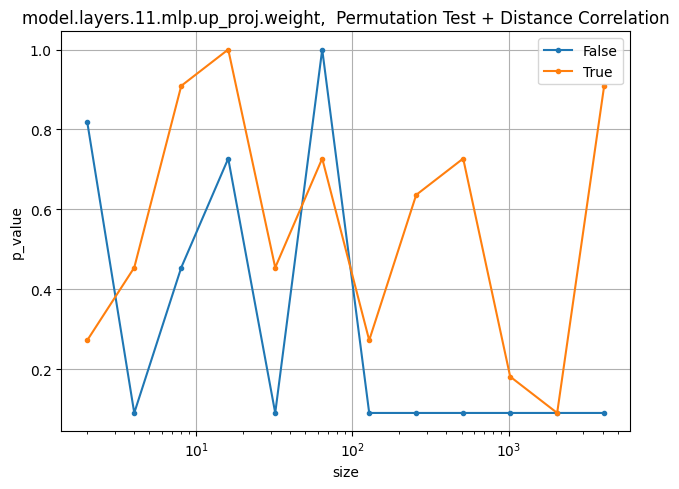

model.layers.11.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.11.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 0.2727272727272727]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 1.0, 0.45454545454545453, 0.6363636363636364, 0.6363636363636364, 0.36363636363636365, 0.9090909090909091, 0.2727272727272727, 0.7272727272727273, 0.45454545454545453]


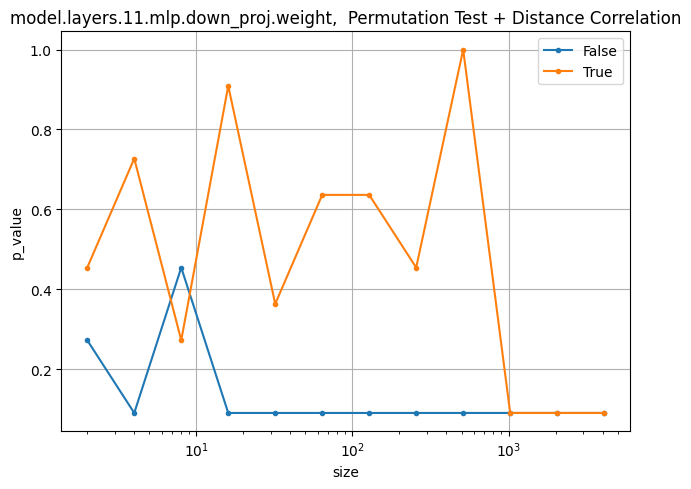

model.layers.12.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.12.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.8181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.2727272727272727, 0.5454545454545454]


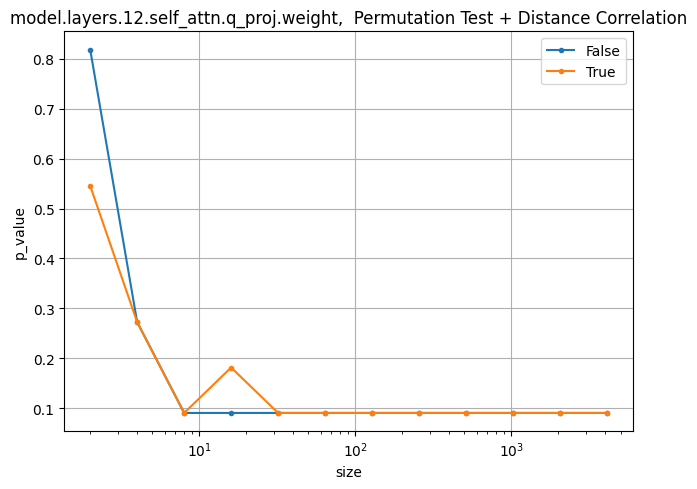

model.layers.12.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.12.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091]
[0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.7272727272727273]


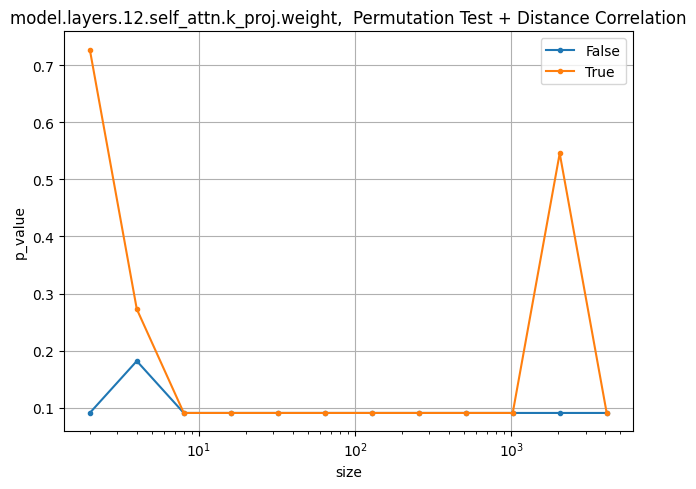

model.layers.12.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.12.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.6363636363636364, 1.0, 0.18181818181818182]
[0.09090909090909091, 0.7272727272727273, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.7272727272727273, 0.18181818181818182, 0.9090909090909091, 0.45454545454545453]


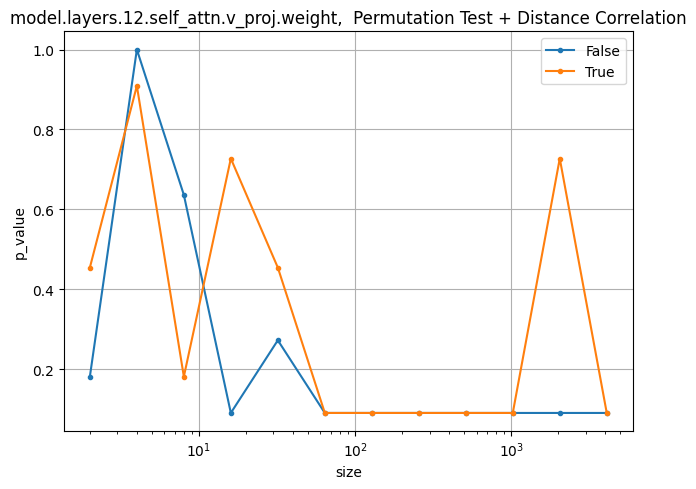

model.layers.12.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.12.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.45454545454545453, 0.09090909090909091]
[0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.36363636363636365, 0.18181818181818182, 0.18181818181818182, 0.09090909090909091, 0.9090909090909091]


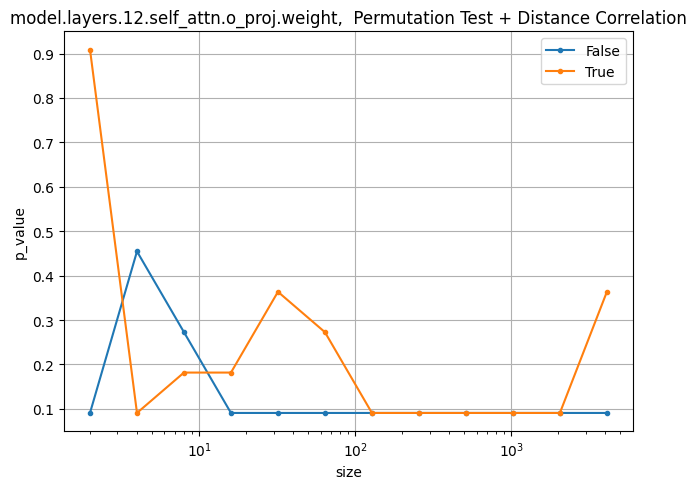

model.layers.12.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.12.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.6363636363636364, 0.18181818181818182, 0.7272727272727273, 1.0, 0.18181818181818182, 0.18181818181818182, 0.5454545454545454]


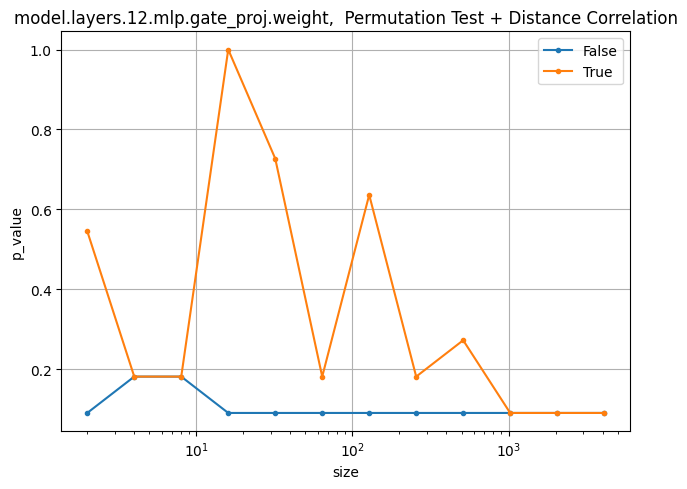

model.layers.12.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.12.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 0.8181818181818182]
[0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.9090909090909091, 0.18181818181818182, 0.7272727272727273, 0.45454545454545453, 0.6363636363636364, 0.09090909090909091, 0.9090909090909091, 0.8181818181818182]


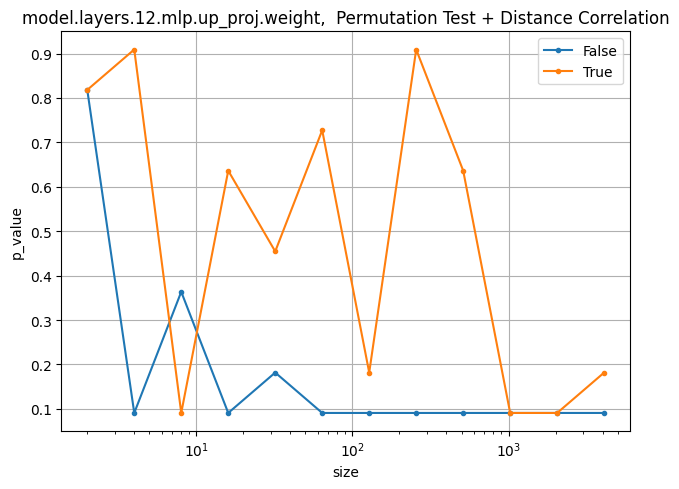

model.layers.12.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.12.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.6363636363636364, 0.18181818181818182, 0.6363636363636364, 0.36363636363636365]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.8181818181818182, 0.6363636363636364, 0.18181818181818182, 0.2727272727272727, 0.18181818181818182, 0.9090909090909091, 0.7272727272727273, 0.36363636363636365]


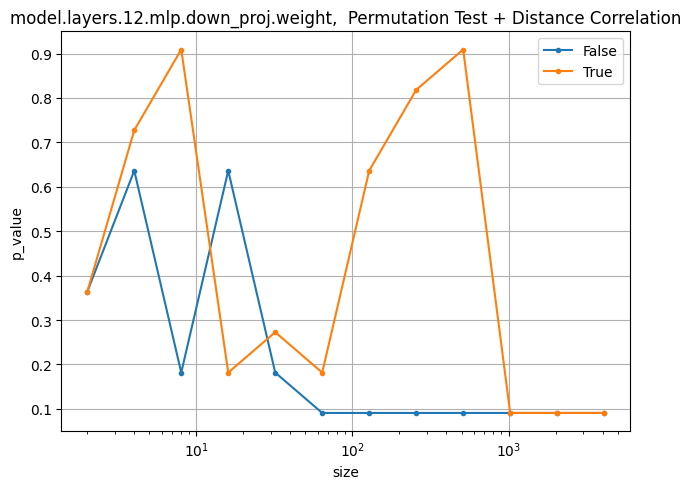

model.layers.13.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.13.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


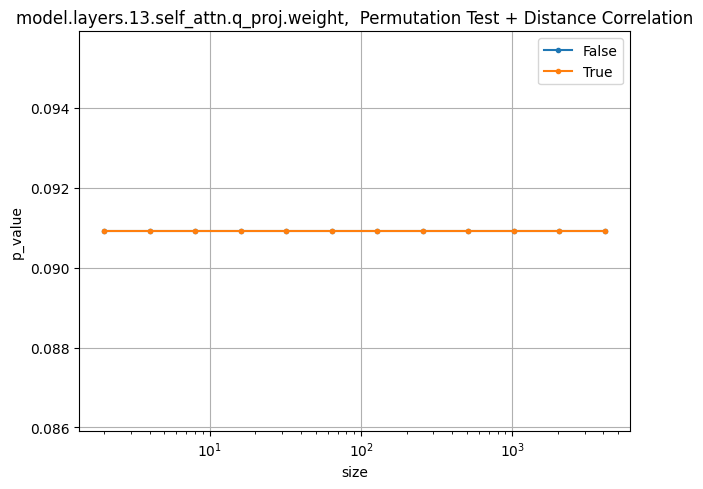

model.layers.13.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.13.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


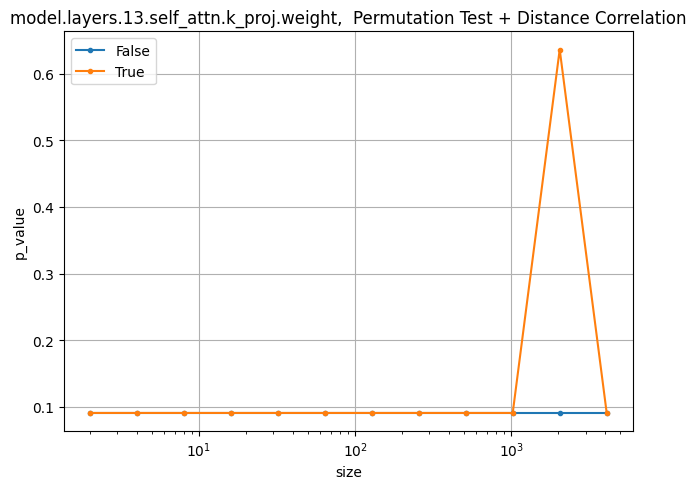

model.layers.13.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.13.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.5454545454545454, 0.9090909090909091]
[0.09090909090909091, 0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.36363636363636365, 0.8181818181818182, 0.45454545454545453]


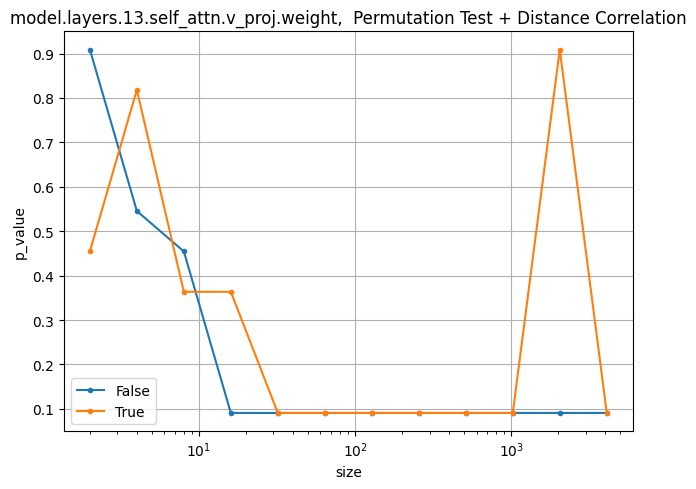

model.layers.13.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.13.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.5454545454545454]
[0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.2727272727272727, 0.5454545454545454, 0.6363636363636364]


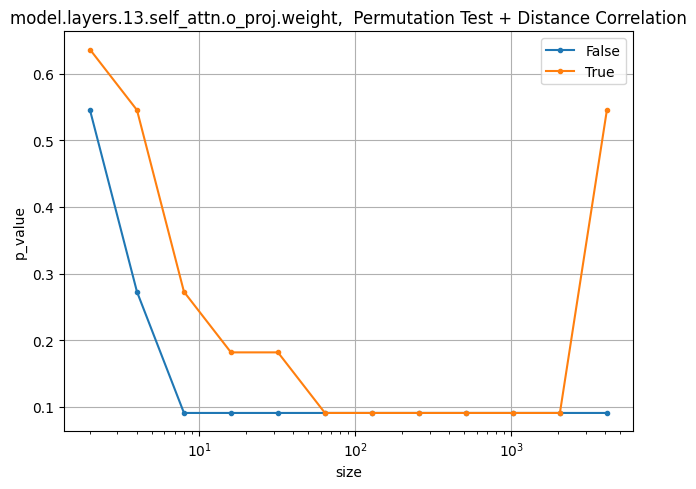

model.layers.13.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.13.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.8181818181818182, 0.9090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.6363636363636364, 0.18181818181818182, 0.2727272727272727, 0.8181818181818182, 0.18181818181818182, 0.18181818181818182, 0.09090909090909091]


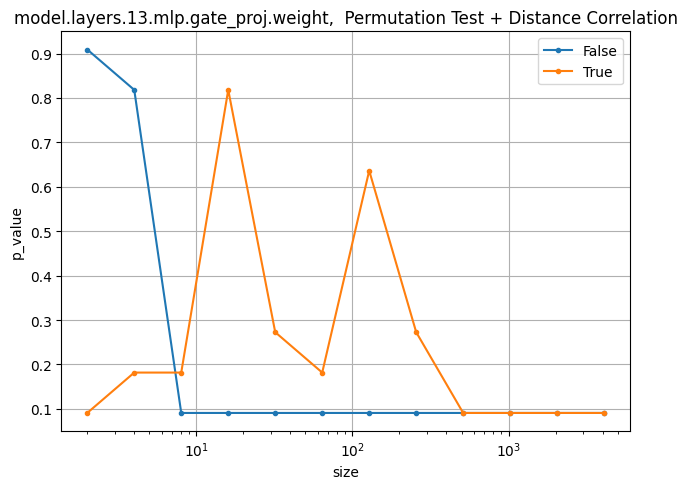

model.layers.13.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.13.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.5454545454545454, 0.45454545454545453]
[0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727, 0.6363636363636364, 0.18181818181818182, 0.7272727272727273]


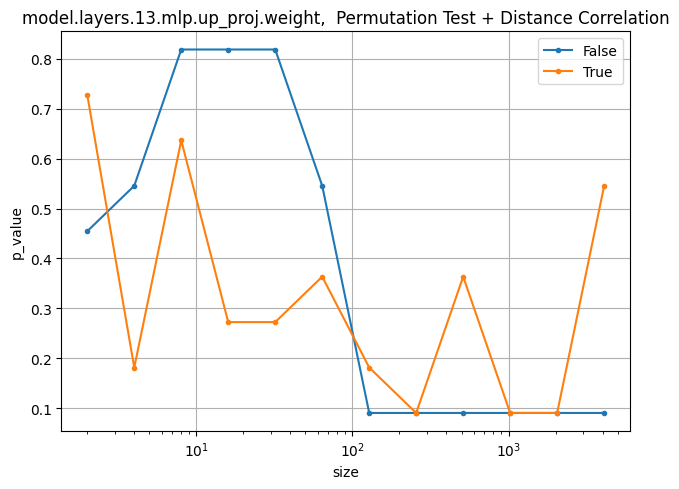

model.layers.13.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.13.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.45454545454545453, 0.7272727272727273, 1.0, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.18181818181818182, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.8181818181818182, 0.2727272727272727]


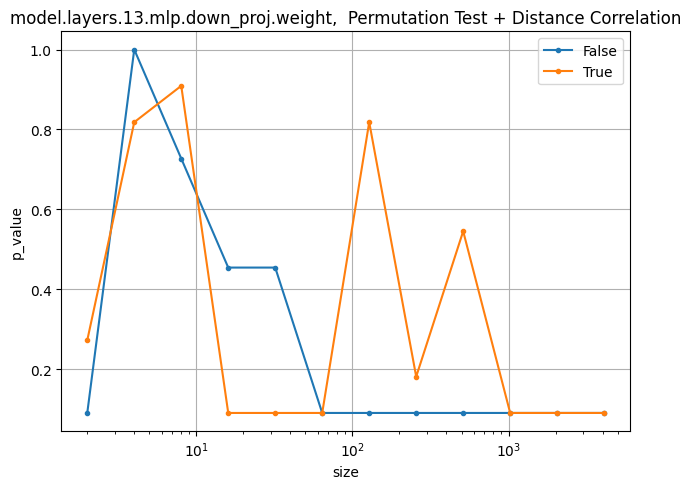

model.layers.14.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.14.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


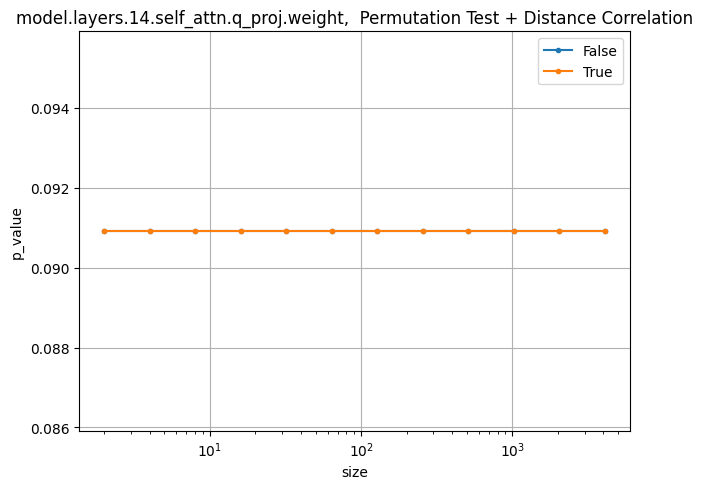

model.layers.14.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.14.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


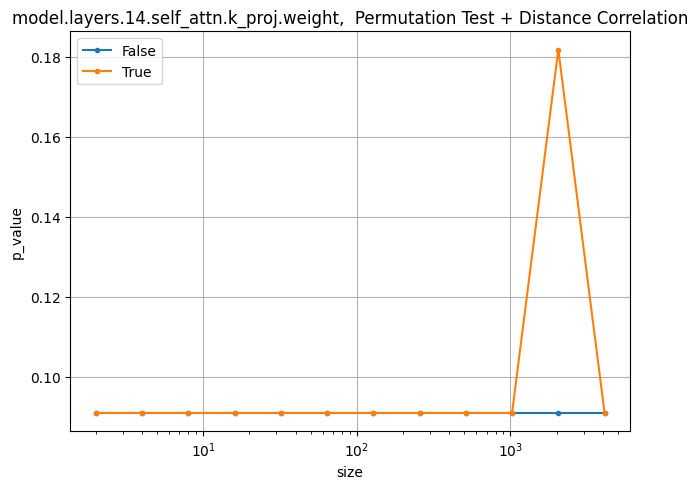

model.layers.14.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.14.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182]
[0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.45454545454545453, 0.36363636363636365, 0.8181818181818182]


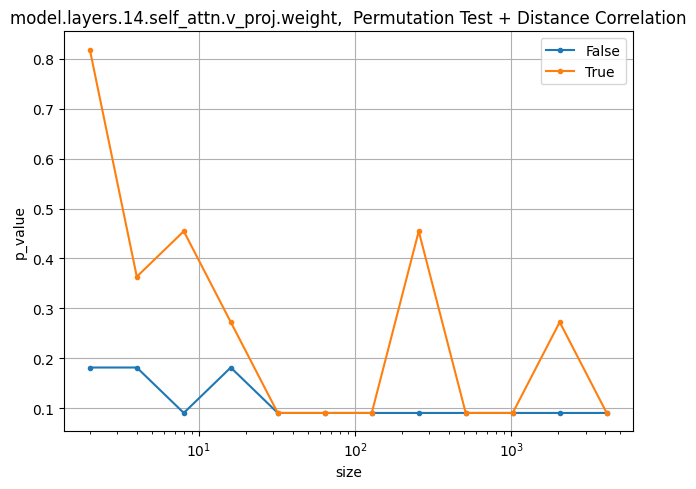

model.layers.14.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.14.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.5454545454545454]
[0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.45454545454545453]


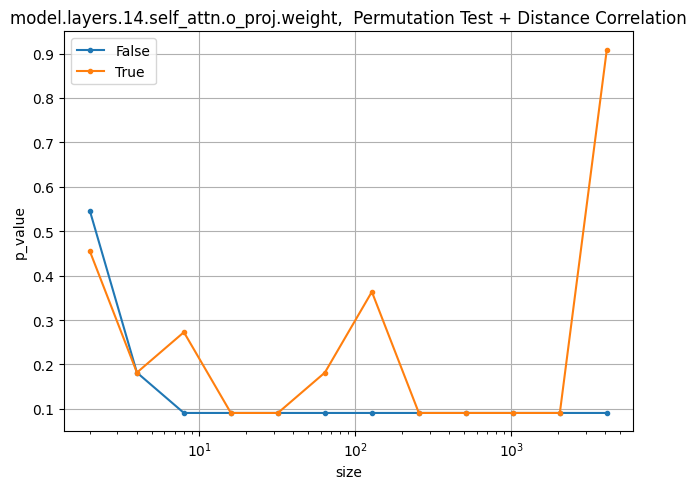

model.layers.14.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.14.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.7272727272727273, 0.2727272727272727, 1.0, 0.6363636363636364, 0.8181818181818182, 0.36363636363636365, 0.09090909090909091, 0.09090909090909091]


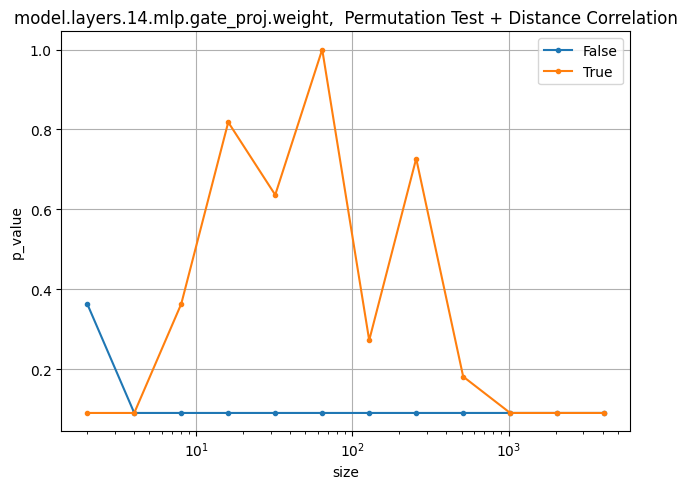

model.layers.14.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.14.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.18181818181818182, 0.8181818181818182, 0.2727272727272727, 0.9090909090909091, 0.45454545454545453, 0.5454545454545454]
[0.36363636363636365, 0.09090909090909091, 0.2727272727272727, 0.9090909090909091, 1.0, 0.36363636363636365, 0.2727272727272727, 0.09090909090909091, 0.9090909090909091, 0.36363636363636365, 0.09090909090909091, 1.0]


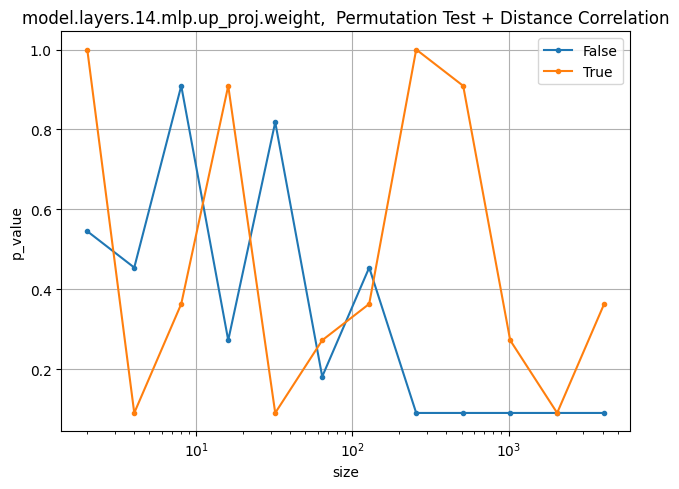

model.layers.14.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.14.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.36363636363636365, 0.36363636363636365, 0.5454545454545454, 0.9090909090909091, 1.0]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.8181818181818182, 0.45454545454545453, 0.18181818181818182, 0.9090909090909091, 0.45454545454545453, 0.9090909090909091, 0.6363636363636364, 0.9090909090909091, 0.6363636363636364]


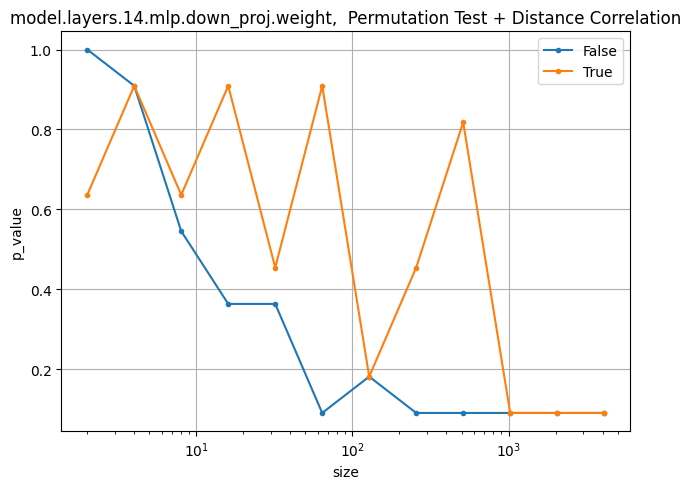

model.layers.15.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.15.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


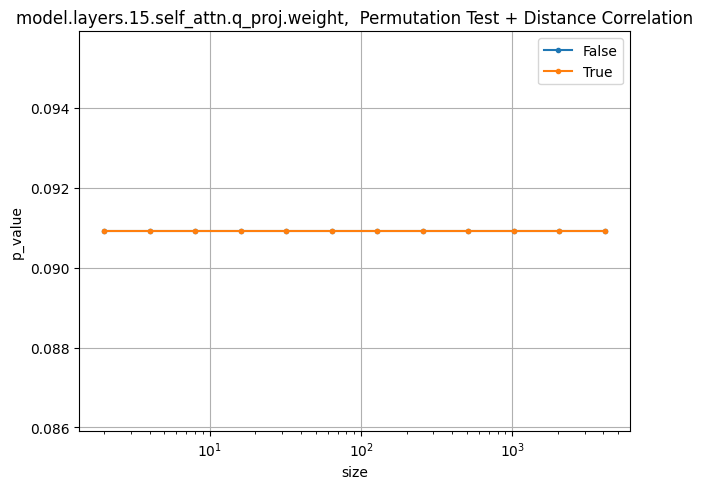

model.layers.15.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.15.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


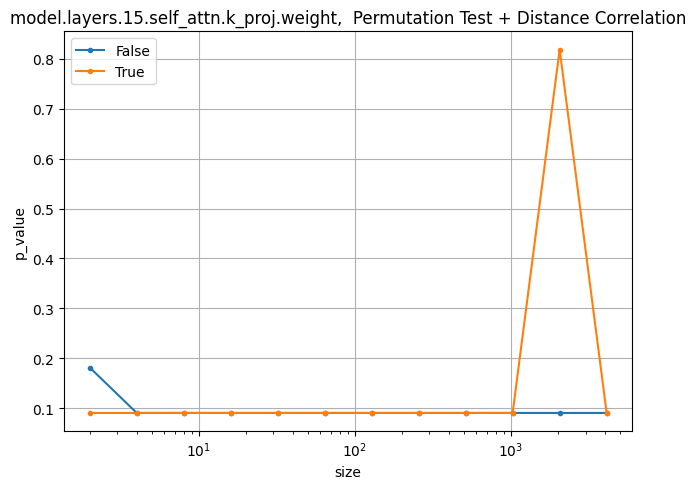

model.layers.15.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.15.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.5454545454545454]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182]


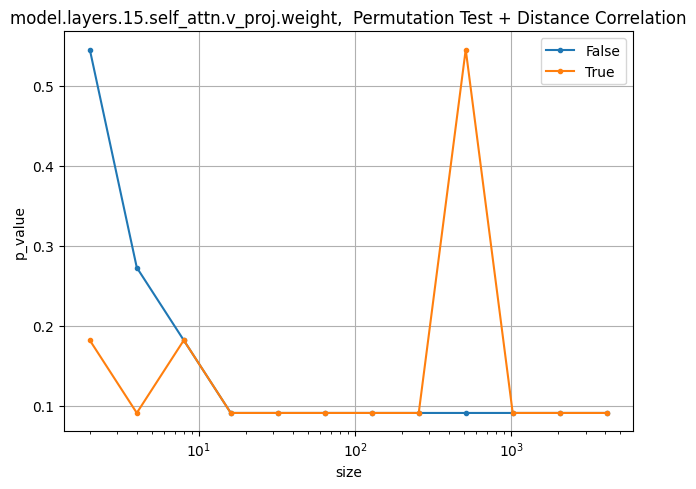

model.layers.15.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.15.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.8181818181818182]
[0.9090909090909091, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


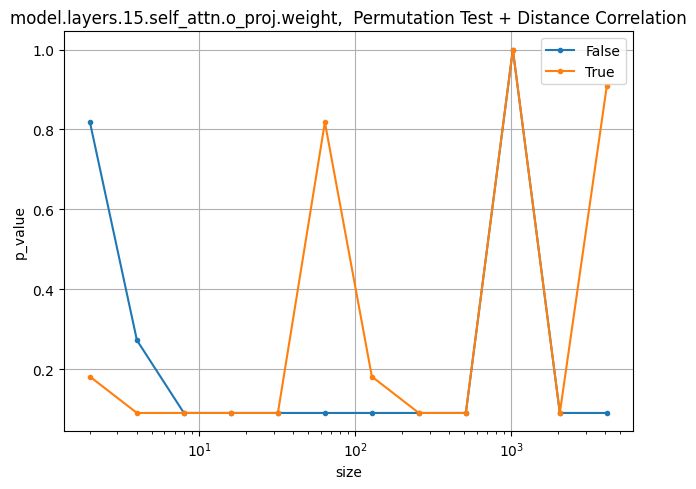

model.layers.15.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.15.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.36363636363636365]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.18181818181818182, 1.0, 0.45454545454545453, 1.0, 0.09090909090909091, 0.36363636363636365, 0.09090909090909091]


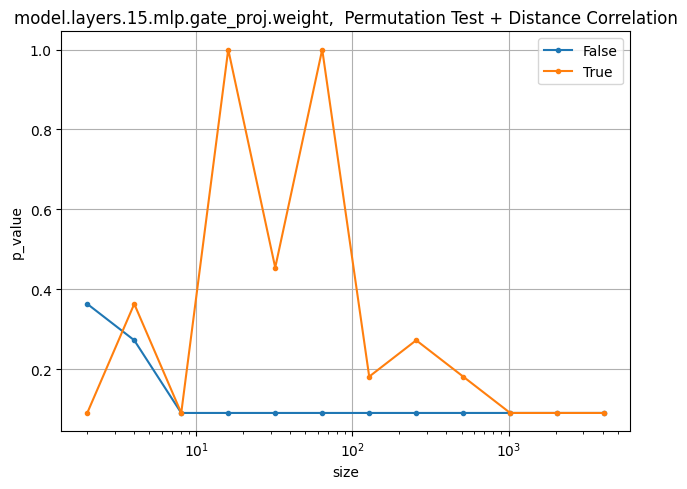

model.layers.15.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.15.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.2727272727272727, 0.18181818181818182]
[0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.6363636363636364, 0.18181818181818182, 0.18181818181818182, 0.5454545454545454, 0.8181818181818182, 0.2727272727272727, 0.36363636363636365, 0.2727272727272727]


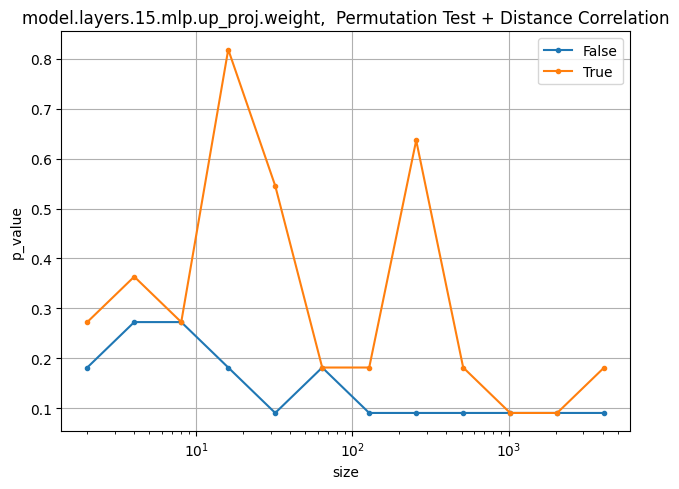

model.layers.15.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.15.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.8181818181818182, 0.5454545454545454, 0.9090909090909091, 0.6363636363636364]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.18181818181818182, 0.45454545454545453, 0.18181818181818182, 0.5454545454545454, 0.5454545454545454, 0.45454545454545453, 0.45454545454545453, 0.2727272727272727]


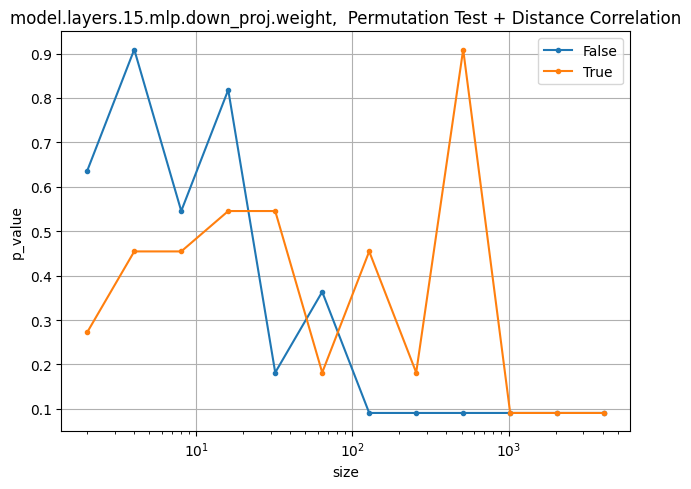

model.layers.16.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.16.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


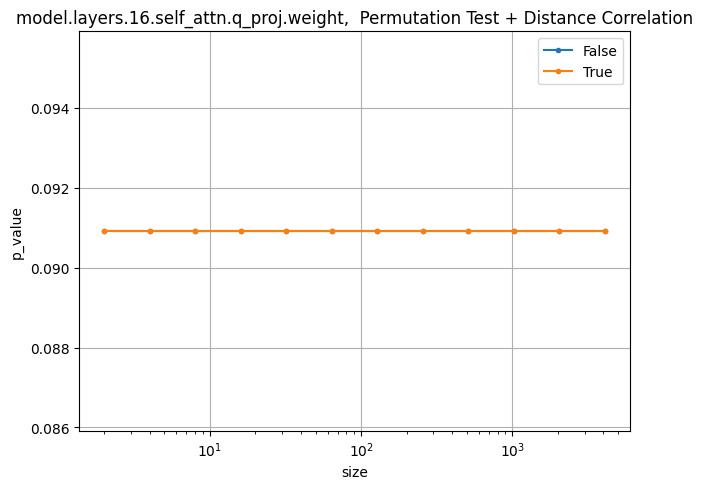

model.layers.16.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.16.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365]


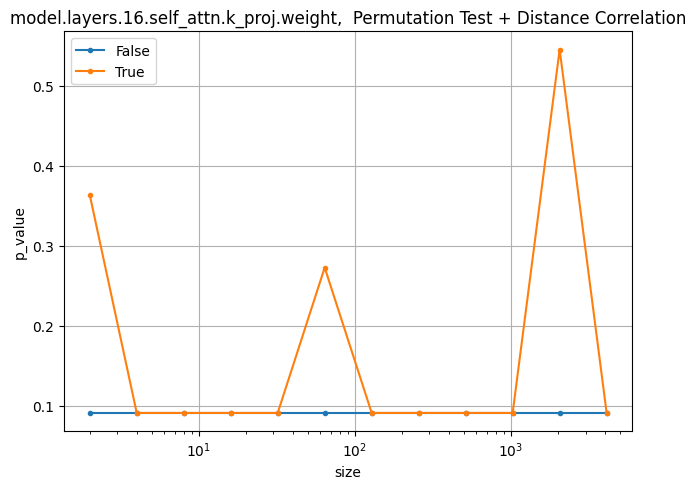

model.layers.16.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.16.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.7272727272727273]
[0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.9090909090909091, 0.2727272727272727, 0.36363636363636365]


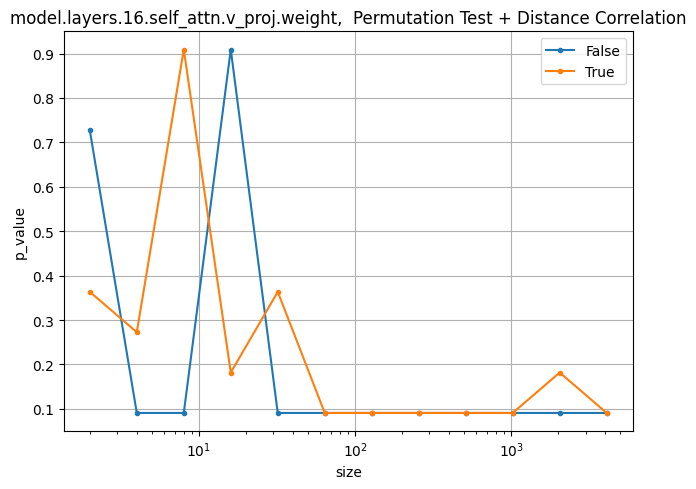

model.layers.16.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.16.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727]
[0.09090909090909091, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.8181818181818182, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.45454545454545453]


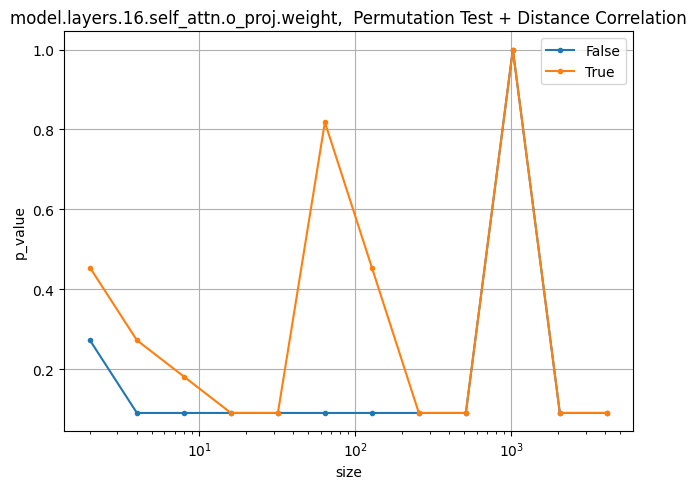

model.layers.16.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.16.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.7272727272727273, 0.2727272727272727, 0.7272727272727273, 0.7272727272727273, 1.0, 0.18181818181818182, 1.0, 0.45454545454545453]


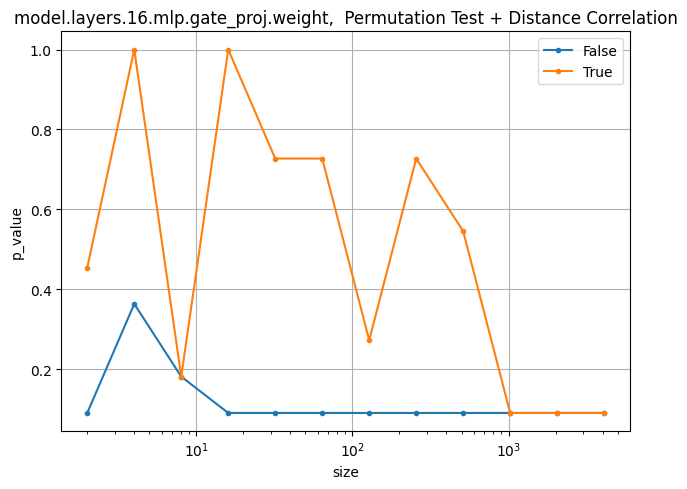

model.layers.16.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.16.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.18181818181818182, 0.2727272727272727, 0.7272727272727273, 0.09090909090909091, 0.36363636363636365, 0.8181818181818182]
[0.45454545454545453, 0.09090909090909091, 0.45454545454545453, 0.18181818181818182, 0.18181818181818182, 0.6363636363636364, 0.5454545454545454, 1.0, 0.5454545454545454, 0.5454545454545454, 0.9090909090909091, 1.0]


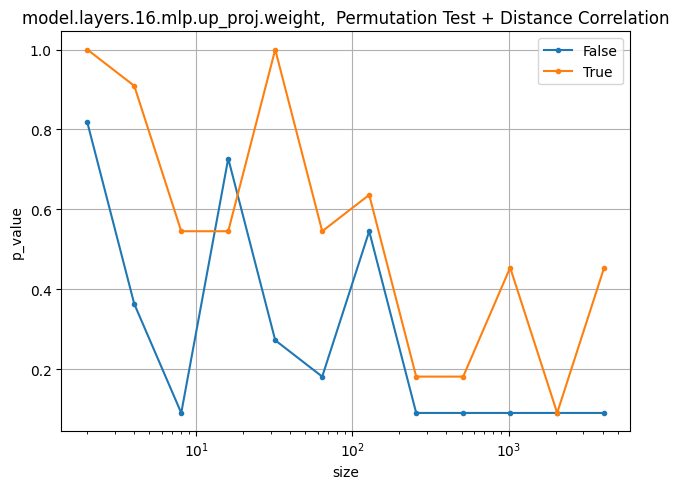

model.layers.16.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.16.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.2727272727272727, 0.8181818181818182, 0.45454545454545453, 0.18181818181818182, 0.9090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.18181818181818182, 0.45454545454545453, 0.5454545454545454, 0.18181818181818182, 0.8181818181818182, 0.6363636363636364, 1.0, 0.5454545454545454]


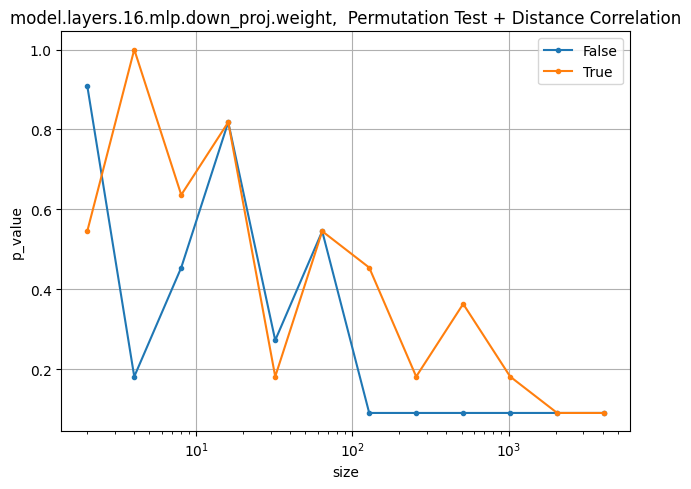

model.layers.17.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.17.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


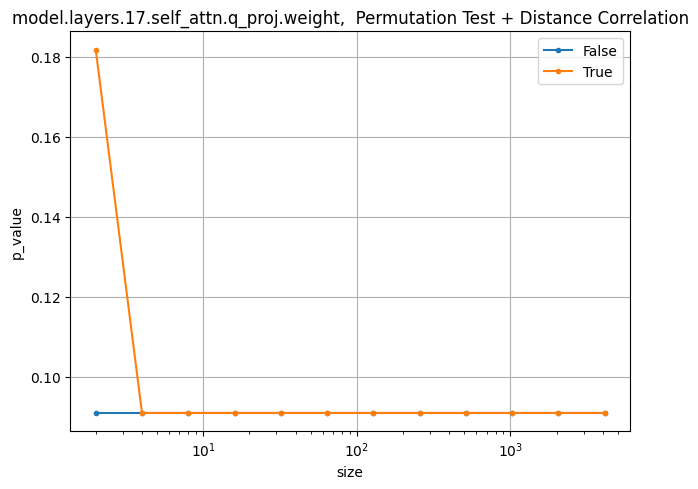

model.layers.17.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.17.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453]


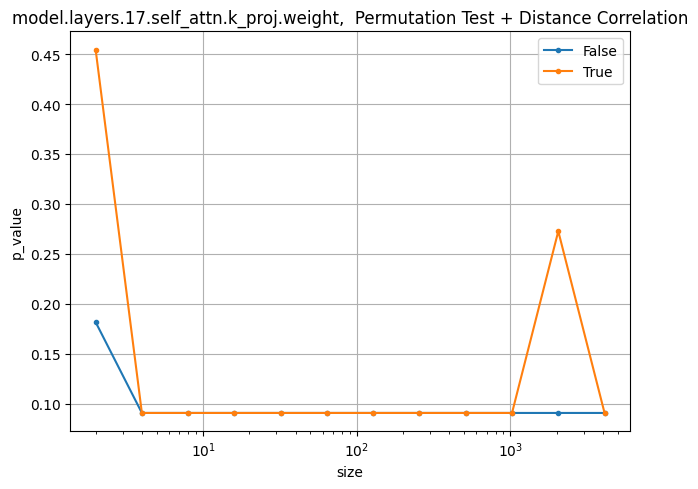

model.layers.17.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.17.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.6363636363636364, 0.18181818181818182]
[0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.7272727272727273, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.6363636363636364]


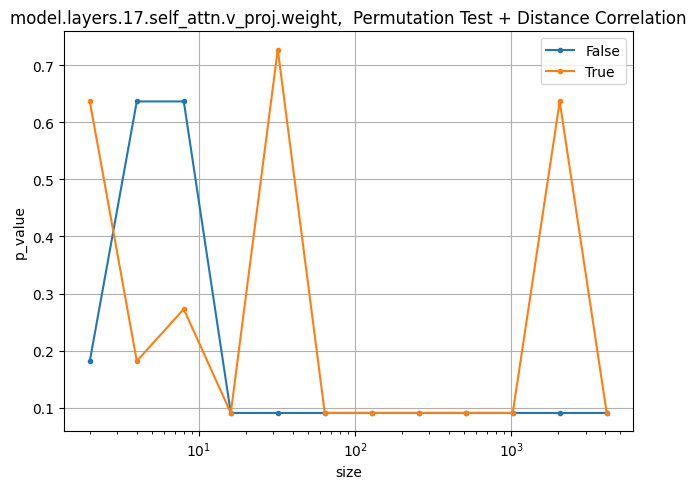

model.layers.17.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.17.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.9090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.45454545454545453, 0.7272727272727273]
[0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.9090909090909091]


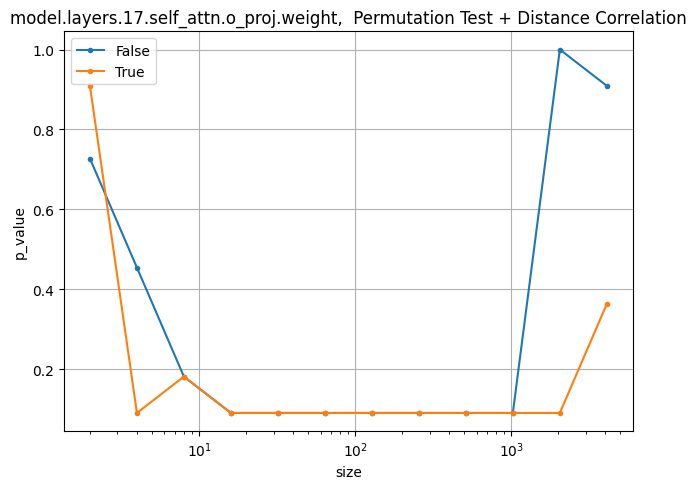

model.layers.17.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.17.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.45454545454545453]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.2727272727272727, 0.18181818181818182, 0.18181818181818182, 0.6363636363636364, 0.18181818181818182, 0.9090909090909091, 0.5454545454545454]


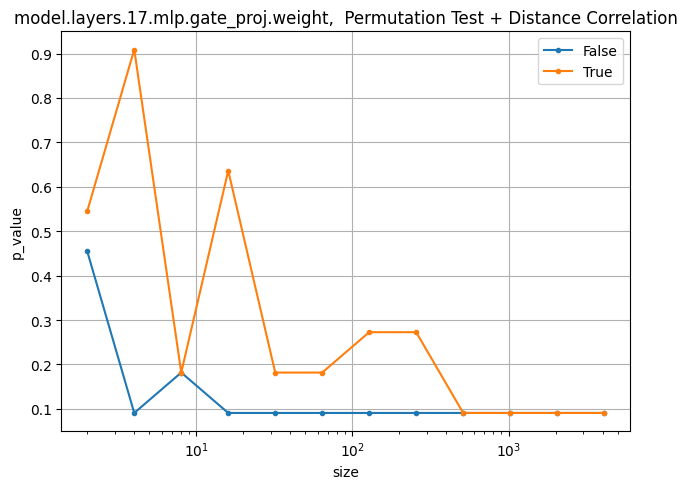

model.layers.17.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.17.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.5454545454545454, 0.5454545454545454, 0.7272727272727273, 0.2727272727272727]
[0.7272727272727273, 0.09090909090909091, 0.18181818181818182, 0.45454545454545453, 0.5454545454545454, 0.6363636363636364, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 1.0, 0.45454545454545453, 0.5454545454545454]


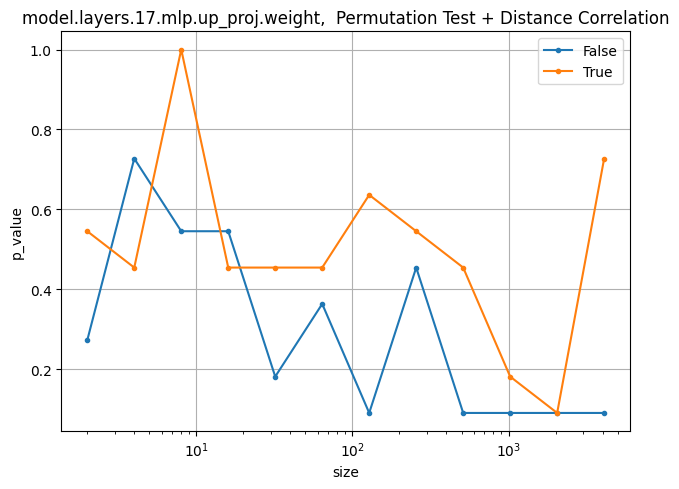

model.layers.17.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.17.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.36363636363636365, 0.2727272727272727, 0.18181818181818182, 0.09090909090909091, 0.2727272727272727]
[0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.2727272727272727, 0.18181818181818182, 0.6363636363636364, 1.0, 0.7272727272727273, 0.18181818181818182, 0.36363636363636365, 0.9090909090909091, 0.5454545454545454]


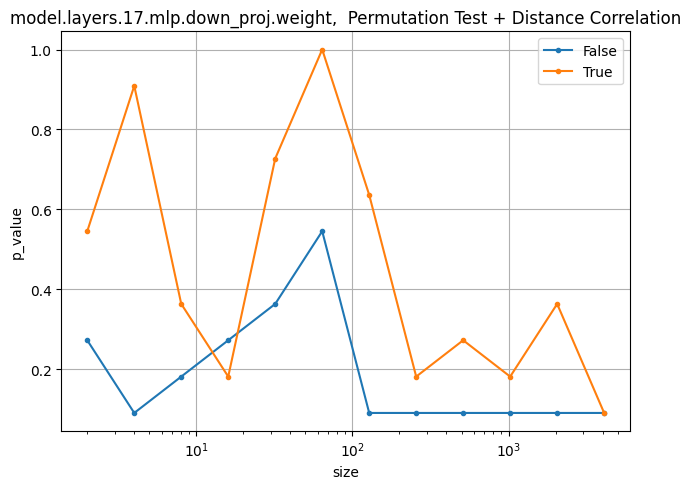

model.layers.18.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.18.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


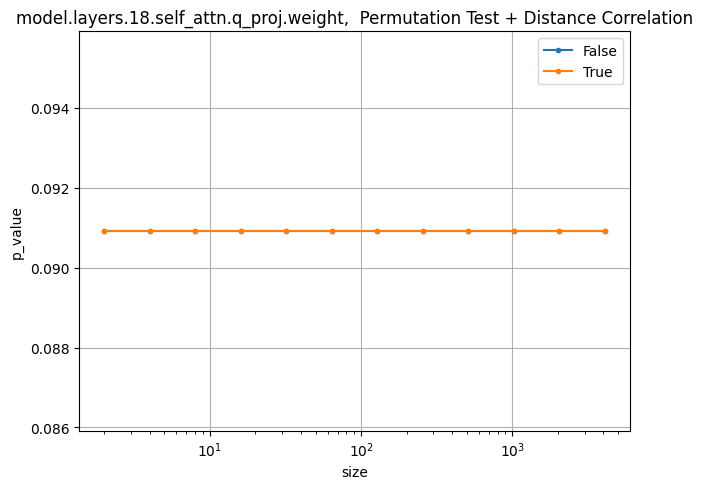

model.layers.18.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.18.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727]
[0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727]


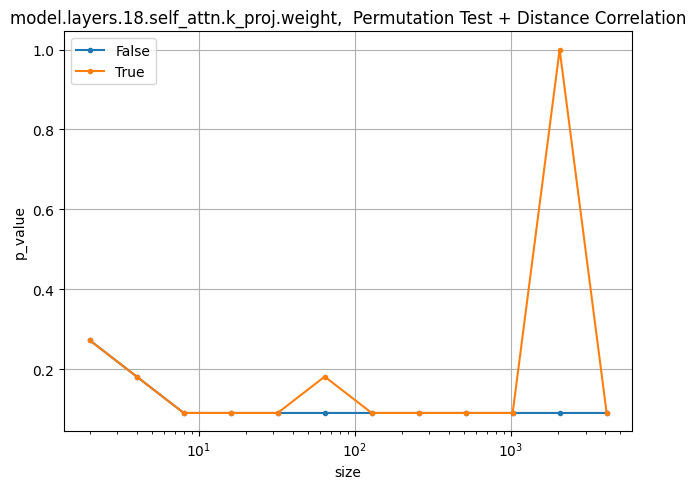

model.layers.18.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.18.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.8181818181818182]
[0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.7272727272727273, 0.36363636363636365, 0.9090909090909091, 0.18181818181818182, 0.18181818181818182]


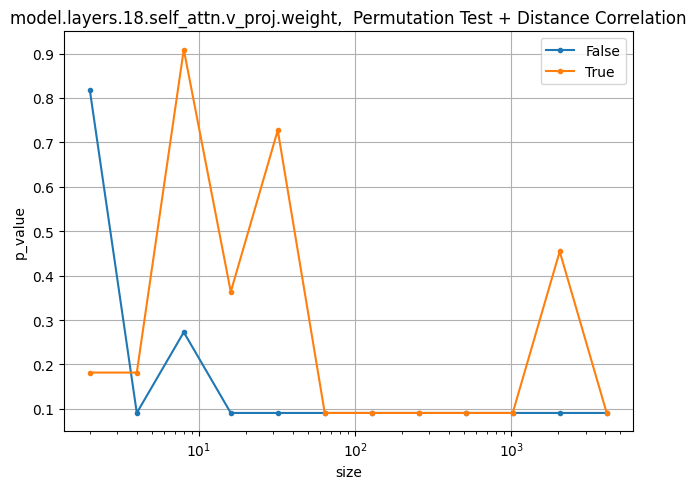

model.layers.18.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.18.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 1.0, 0.6363636363636364]
[0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.6363636363636364, 1.0]


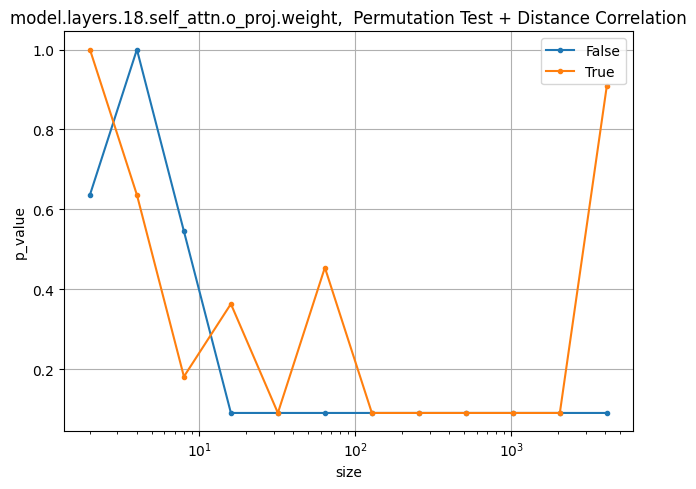

model.layers.18.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.18.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.36363636363636365]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.9090909090909091, 0.2727272727272727, 0.2727272727272727, 0.09090909090909091, 0.36363636363636365, 0.2727272727272727, 0.36363636363636365, 0.45454545454545453]


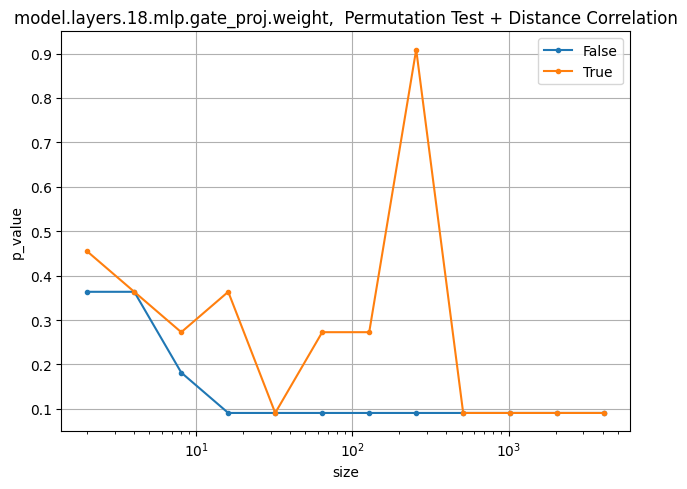

model.layers.18.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.18.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.8181818181818182, 0.7272727272727273, 0.36363636363636365, 0.18181818181818182, 0.5454545454545454, 0.18181818181818182]
[0.9090909090909091, 0.09090909090909091, 0.36363636363636365, 0.09090909090909091, 1.0, 0.6363636363636364, 0.45454545454545453, 0.45454545454545453, 0.09090909090909091, 0.45454545454545453, 0.2727272727272727, 0.5454545454545454]


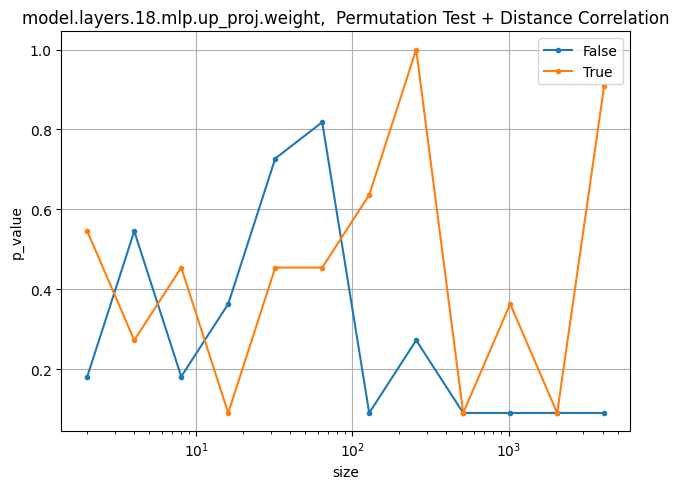

model.layers.18.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.18.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 1.0, 0.45454545454545453, 0.9090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.6363636363636364, 0.09090909090909091, 0.45454545454545453, 1.0]


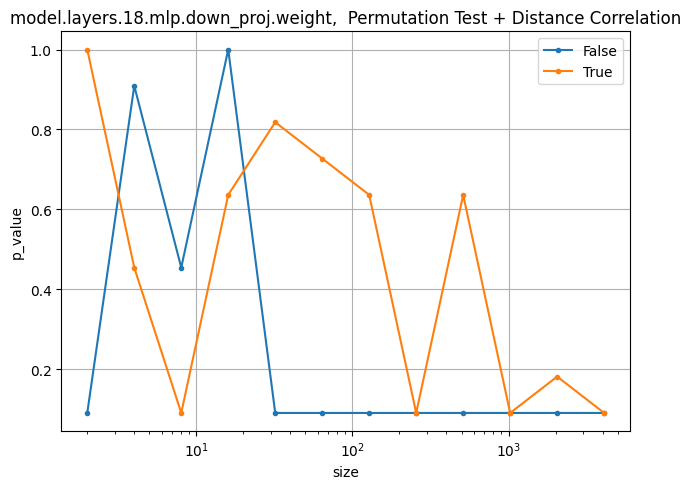

model.layers.19.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.19.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


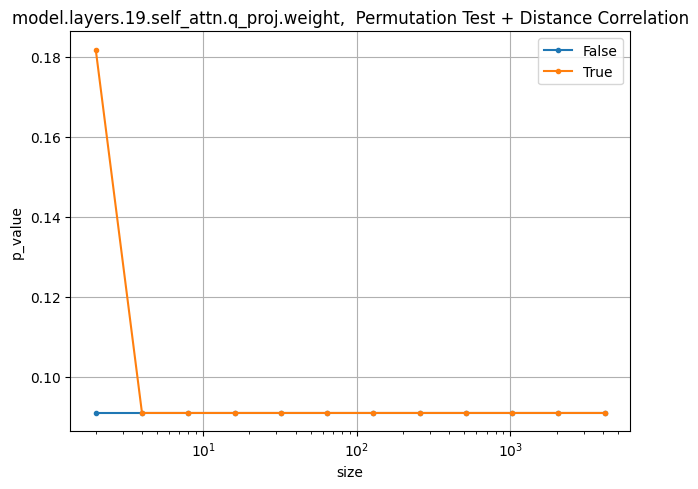

model.layers.19.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.19.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.45454545454545453]


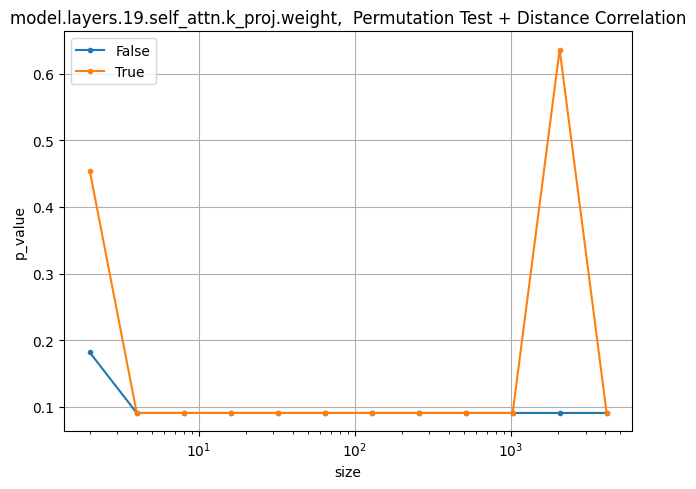

model.layers.19.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.19.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 1.0]
[0.09090909090909091, 0.6363636363636364, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.8181818181818182, 0.09090909090909091, 0.2727272727272727, 0.36363636363636365, 0.2727272727272727]


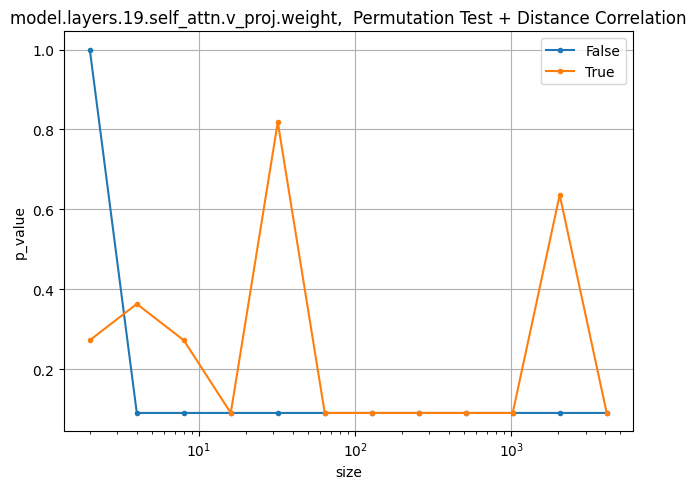

model.layers.19.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.19.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.45454545454545453, 0.6363636363636364]
[0.2727272727272727, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.45454545454545453, 0.36363636363636365, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.8181818181818182]


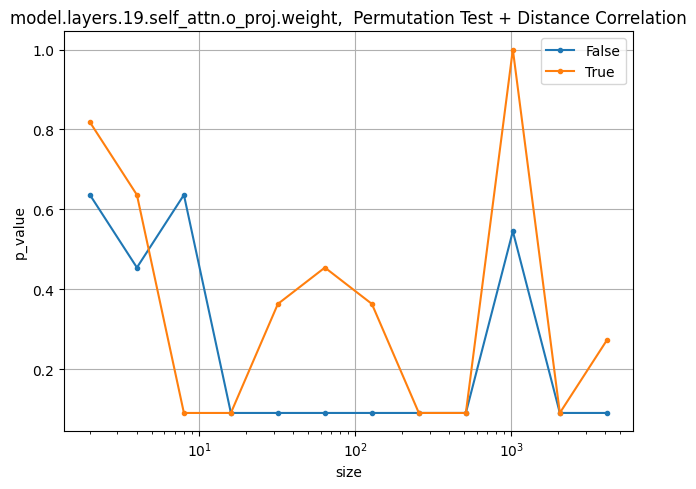

model.layers.19.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.19.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.8181818181818182, 0.6363636363636364]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.6363636363636364, 0.6363636363636364, 1.0, 0.7272727272727273, 1.0, 0.7272727272727273, 0.36363636363636365]


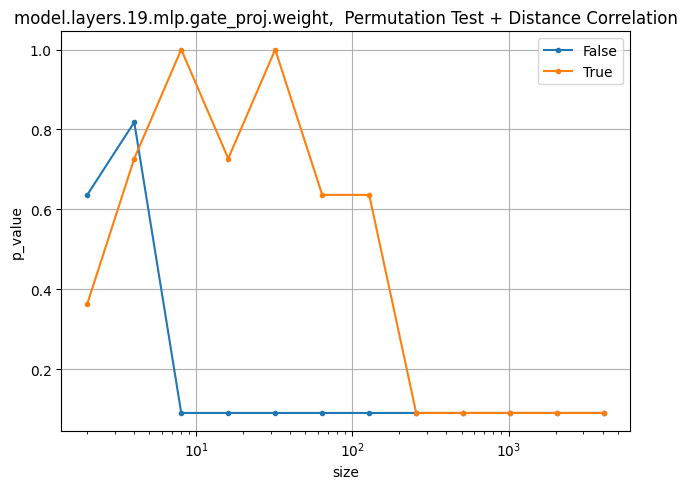

model.layers.19.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.19.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.36363636363636365, 0.6363636363636364, 0.8181818181818182, 0.36363636363636365, 0.8181818181818182, 0.36363636363636365]
[0.45454545454545453, 0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 1.0, 0.5454545454545454, 0.18181818181818182, 0.2727272727272727, 0.8181818181818182, 0.2727272727272727, 0.8181818181818182, 0.18181818181818182]


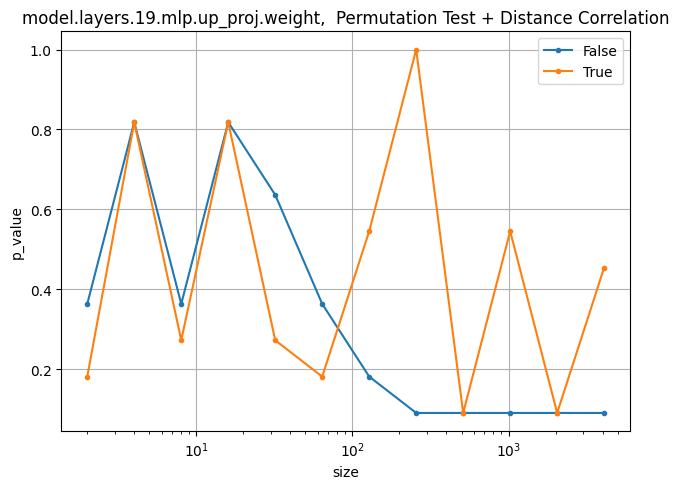

model.layers.19.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.19.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.7272727272727273, 0.6363636363636364, 0.09090909090909091, 0.45454545454545453, 0.18181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.7272727272727273, 1.0, 0.18181818181818182, 0.7272727272727273, 0.45454545454545453, 0.9090909090909091, 0.18181818181818182]


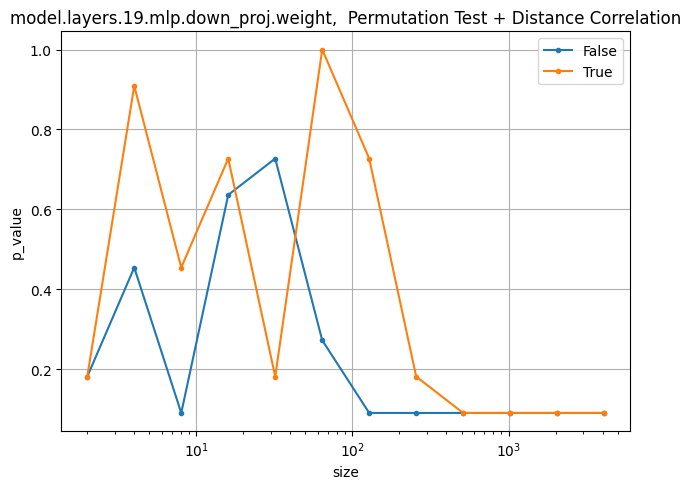

model.layers.30.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.30.self_attn.q_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


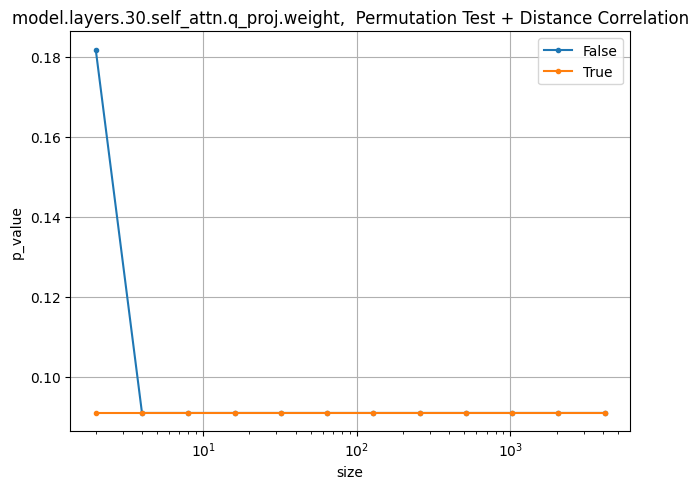

model.layers.30.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.30.self_attn.k_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.6363636363636364]
[0.09090909090909091, 0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]


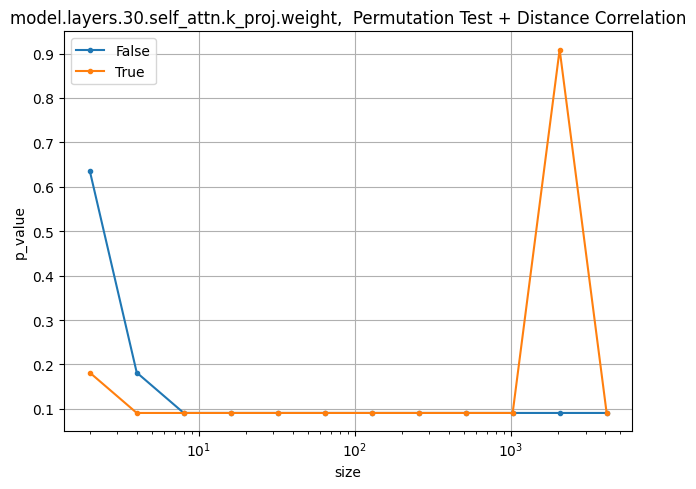

model.layers.30.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.30.self_attn.v_proj.weight torch.Size([2097152, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.09090909090909091, 0.2727272727272727]
[0.09090909090909091, 0.45454545454545453, 0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.18181818181818182, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727]


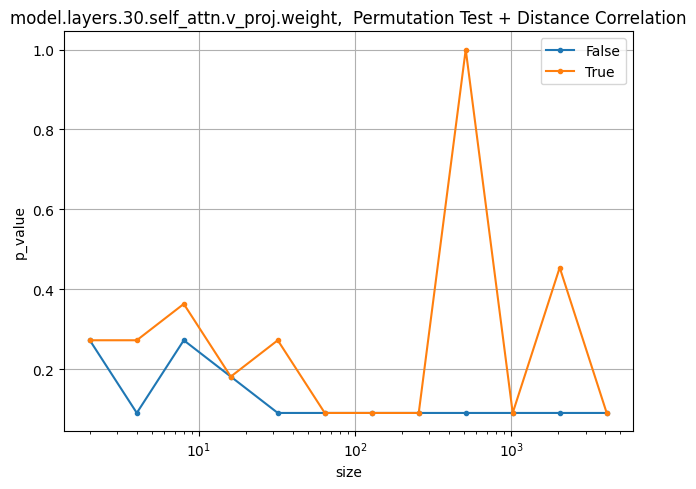

model.layers.30.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.30.self_attn.o_proj.weight torch.Size([8388608, 2])
[0.09090909090909091, 1.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.36363636363636365, 0.36363636363636365, 0.5454545454545454]
[0.9090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.18181818181818182, 0.5454545454545454]


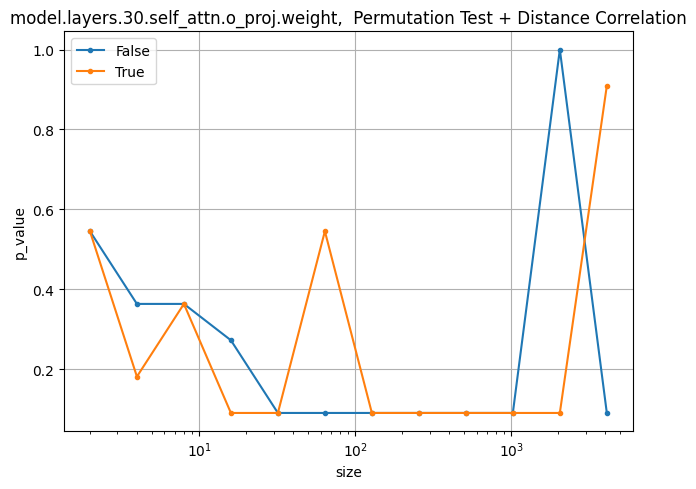

model.layers.30.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.30.mlp.gate_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.18181818181818182]
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.5454545454545454, 0.18181818181818182, 0.2727272727272727, 1.0, 0.18181818181818182, 1.0, 0.45454545454545453, 0.6363636363636364, 0.18181818181818182]


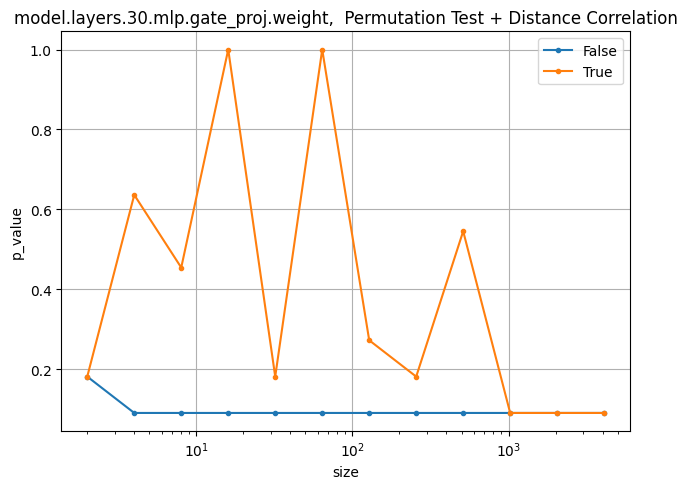

model.layers.30.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.30.mlp.up_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.6363636363636364]
[1.0, 0.09090909090909091, 0.09090909090909091, 0.2727272727272727, 0.45454545454545453, 0.9090909090909091, 0.45454545454545453, 0.7272727272727273, 0.6363636363636364, 0.45454545454545453, 0.2727272727272727, 1.0]


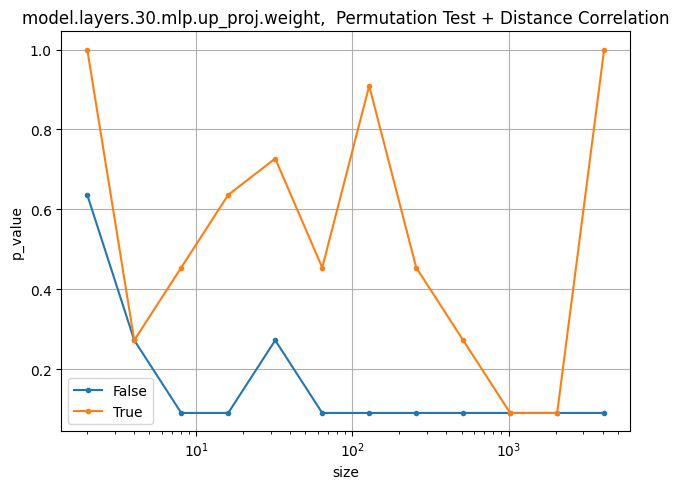

model.layers.30.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.30.mlp.down_proj.weight torch.Size([29360128, 2])
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.7272727272727273, 0.45454545454545453, 1.0, 0.18181818181818182, 1.0, 0.2727272727272727, 0.09090909090909091, 0.9090909090909091]
[0.09090909090909091, 0.09090909090909091, 0.36363636363636365, 0.45454545454545453, 0.36363636363636365, 0.8181818181818182, 0.09090909090909091, 0.9090909090909091, 0.45454545454545453, 0.9090909090909091, 0.2727272727272727, 0.5454545454545454]


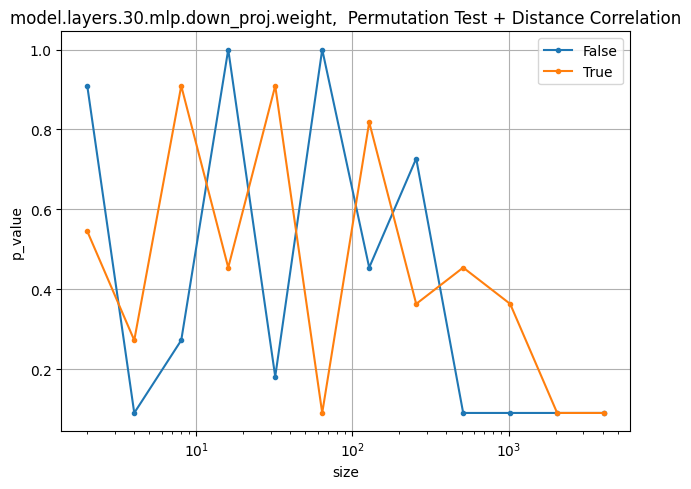

In [14]:
import dcor
import numpy as np

# 샘플 데이터 생성
# np.random.seed(0)
# X = np.random.rand(1000, 50)  # 50차원 데이터
# Y = np.random.rand(1000, 50)  # 독립적인 50차원 데이터

# # 실제 Distance Correlation 계산
# dc_real = dcor.distance_correlation(X, Y)

# # Permutation Test
# perm_dc = []
# num_permutations = 100
# for _ in range(num_permutations):
#     Y_perm = np.random.permutation(Y)  # Y를 무작위로 섞음
#     dc_perm = dcor.distance_correlation(X, Y_perm)
#     perm_dc.append(dc_perm)

# # p-value 계산
# p_value = (np.sum(np.array(perm_dc) >= dc_real) + 1) / (num_permutations + 1)

# print(f"Real Distance Correlation: {dc_real:.4f}")
# print(f"p-value: {p_value:.4f}")

# # 독립 여부 판단
# if p_value > 0.05:
#     print("Variables are likely independent.")
# else:
#     print("Variables are dependent.")

plot_data = {}
dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]

for k, v in state_dict.items():
    if 'layers.0' in k or 'layers.1' in k or 'layers.10' in k or 'layers.30' in k:
        if 'layernorm' in k: continue
        for transpose in [False, True]:
            print(k, v.shape)
            np.random.seed(1)
            # print(f'Transpose : {transpose}')
            plot_data[f'{transpose}'] = []
            for dim in dims:
                # print(f'#### chunk size : {dim} ####')
                if transpose:
                    v = v.T
                v = v.reshape(-1, dim)
                num_samples = 2000
                indices = torch.randperm(v.shape[0])[:num_samples]  # 무작위로 인덱스 선택
                W = v[indices]

                d = W.shape[-1] // 2
                tensor_split = torch.split(W, d, dim=1)  # dim=1에서 64씩 나눔
                
                X = tensor_split[0]  # 첫 번째 (-1, 64)
                Y = tensor_split[1]  # 두 번째 (-1, 64)
                
                indices = torch.randperm(X.shape[0])
                X = X[indices]
                Y = Y[indices]
                # print(X.shape, Y.shape)

                dc_real = dcor.distance_correlation(X, Y)
                perm_dc = []
                num_permutations = 10
                for _ in range(num_permutations):
                    Y_perm = np.random.permutation(Y)  # Y를 무작위로 섞음
                    dc_perm = dcor.distance_correlation(X, Y_perm)
                    perm_dc.append(dc_perm)

                # p-value 계산
                p_value = (np.sum(np.array(perm_dc) >= dc_real) + 1) / (num_permutations + 1)
                plot_data[f'{transpose}'].append(p_value)

                # print(f"Real Distance Correlation: {dc_real}")
                # print(f"p-value: {p_value}")
                
                # if p_value > 0.05:
                #     print("Variables are likely independent.")
                # else:
                #     print("Variables are dependent.")

                    
        import matplotlib.pyplot as plt
        dims = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]
        plt.figure(figsize=(6.5, 5))
        for l, v in plot_data.items():
            print(v)
            plt.plot(dims, v, marker='o', markersize = 3, linestyle='-', label=l)
            
            
        plt.title(f'{k},  Permutation Test + Distance Correlation')
        plt.xlabel('size')
        plt.ylabel('p_value')
        plt.legend()
        plt.grid(True)
        plt.xscale('log')

        plt.tight_layout()
        plt.show()



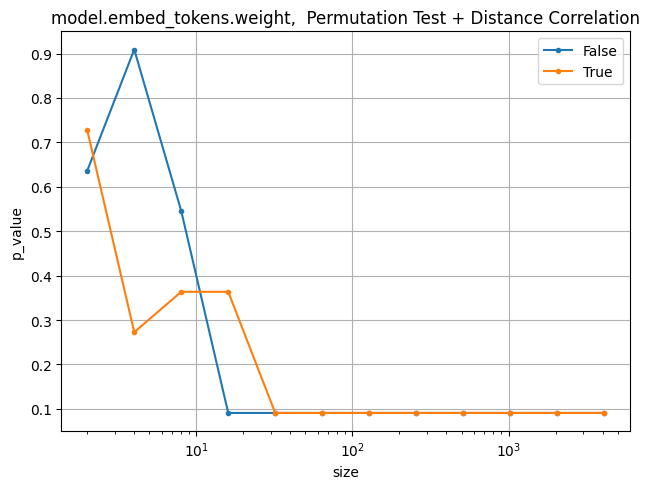